# <font color=blue size=10> 8th FLAI Machine Learning</font>

# <font color=BLUE size=12> Competition

***
**Author**: [Camila Maestrelli](https://www.linkedin.com/in/camila-maestrelli-leobons/)
***

This is a notebook related to the FLAI MAchine Learning Competition

## Project Steps:


### 1. Problem definition
### 2. Importing the data
### 3. Understanding the data
### 4. Cleaning the data
### 5. EDA 

### 6. Preprocessing
### 7. Algorithm and model criation

### 8. Result Interpretation and model evaluation


## <font color=red>This notebook covers up to the EDA step - EDA Part I

## <font color=green> 1. Problem definition

### Competition Goal:
    
    
    Get to a Classifier model with the highest F1-SCORE as possible


### Understanding the metric

![Normal](https://miro.medium.com/max/1314/1*FJNxbk7Ccr1hINGQmgKMcw.jpeg)

- True Positives (TP): when the actual value is Positive and predicted is also Positive.
- True negatives (TN): when the actual value is Negative and prediction is also Negative.
- False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error
- False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

![Normal](https://miro.medium.com/max/1400/1*ICP55HLZ6xxXaUysUU8s2w.jpeg)
![Normal](https://miro.medium.com/max/1170/1*vzCv0_sP9S0OE07wA9wIEQ.jpeg)
![Normal](https://miro.medium.com/max/1360/1*QU9h_Ye6YGrs6wtE94V3WQ.jpeg)
![Normal](https://miro.medium.com/max/1222/1*WLCBBeQHeFoKdOwZP7Wm-w.jpeg)
So, F1 score is a harmonic mean of Precision and Recall
***
#### When to use Accuracy / Precision / Recall / F1-Score?
1. <font color=red>Accuracy</font> is used when the True Positives and True Negatives are more important. Accuracy is a better metric for Balanced Data.
2. Whenever False Positive is much more important use <font color=red>Precision</font>.
3. Whenever False Negative is much more important use <font color=red>Recall</font>.
4. <font color=red>F1-Score</font> is used when the False Negatives and False Positives are important. F1-Score is a better metric for Imbalanced Data.

## Data

- Training Data: (15000, 11) - target “turnover_apos_1_ano” - turnover after 1 year - it´s a employee churn . It informs if the person leaves the company after one year or not
- Test Data: (15000, 10) - does not contain a target column

## <font color=green> 2. Importing the data

In [2]:
# importing the libraries

#!pip install numpy
import numpy as np # linear algebra library
#!pip install pandas
import pandas as pd
pd.set_option('display.max_colwidth', None)

# visualization libraries
#!pip install matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 12,
    "font.weight": "bold", # bold fonts
    "xtick.major.size": 5,
    "xtick.major.pad": 7,
    "xtick.labelsize": 15,  # large tick labels
    "grid.color": "0.5",    # gray gridlines
    "grid.linestyle": "-",  # solid gridlines
    "grid.linewidth": 0.5,  # thin gridlines
    "lines.linewidth": 1, # 
    "lines.color": "g",   # green lines
    "savefig.dpi": 300,     # higher resolution output.
})    
from matplotlib.gridspec import GridSpec
#!pip install seaborn
import seaborn as sns
#!pip install sweetviz
import sweetviz as sv


# Machine Learning library - Classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
#!pip install xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

#!pip install pycaret
#from pycaret.classification import *

# tree plot
from sklearn.tree import plot_tree
#!pip install graphviz==0.19.1
#!apt-get install graphviz
#from sklearn.tree import export_graphviz
#import graphviz

# validation
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, RepeatedKFold, KFold, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#!pip install optuna
import optuna

# transformations
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # used when there are many outliers
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer # the “n_quantiles” argument must be set to a value less than the number of observations in the training dataset
from sklearn.preprocessing import PowerTransformer

# Encoding
!pip install category_encoders
import category_encoders as ce  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder # transform a categorical variable into a numerical integer sorted by alphabetical order
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder # tranform a categorical target variable into a numerical integer sorted by alphabetical order

# classification taking the probability classification into account
from sklearn.preprocessing import Binarizer

# Make your own function to tranform or encode your data
from sklearn.preprocessing import FunctionTransformer
 
# Imputers
from sklearn.impute import SimpleImputer, KNNImputer 

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
# roc curves
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve


# anova testing
#!pip install scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\packaging-20.9.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [120]:
#!pip install pycaret --user
#from pycaret.classification import *

In [2]:
!pip list

Package                            Version
---------------------------------- -------------------
-                                  rkupsafe
-.ckaging                          20.9
-ackaging                          20.9
-arkupsafe                         1.1.1
-ckaging                           20.9
alabaster                          0.7.12
alembic                            1.7.7
altair                             4.2.0
anaconda-client                    1.7.2
anaconda-navigator                 2.1.1
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0

tabula-py                          2.3.0
tabulate                           0.8.9
tangled-up-in-unicode              0.1.0
tblib                              1.7.0
tenacity                           8.0.1
terminado                          0.9.4
testpath                           0.4.4
textblob                           0.17.1
textdistance                       4.2.1
thinc                              7.4.5
threadpoolctl                      2.1.0
three-merge                        0.1.1
tifffile                           2021.4.8
toml                               0.10.2
toolz                              0.11.1
tornado                            6.1
tqdm                               4.59.0
traitlets                          5.0.5
typed-ast                          1.4.2
typing-extensions                  3.7.4.3
tzdata                             2021.5
tzlocal                            4.1
ujson                              4.0.2
umap-learn                         0.5.2
unicodecsv

In [3]:
train_url = 'https://raw.githubusercontent.com/camilamaestrelli/Employee-Churn-Classification-Competition/main/treino.csv'
test_url = 'https://raw.githubusercontent.com/camilamaestrelli/Employee-Churn-Classification-Competition/main/teste.csv'

# importing the datasets
original_train = pd.read_csv(train_url, sep = ';', decimal = ',')
original_test = pd.read_csv(test_url, sep = ';', decimal = ',')

# copying the datsets
df_train = original_train.copy()
df_test = original_test.copy()

## <font color=green> 3. Understanding the data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   func_sexo               15000 non-null  object 
 1   func_idade              15000 non-null  int64  
 2   func_racacor            15000 non-null  object 
 3   func_escolaridade       15000 non-null  object 
 4   func_uf                 15000 non-null  object 
 5   func_deficiencia        15000 non-null  object 
 6   empresa_porte           15000 non-null  object 
 7   empresa_setor           15000 non-null  object 
 8   contrato_horastrabalho  15000 non-null  int64  
 9   contrato_salario        15000 non-null  float64
 10  turnover_apos_1_ano     15000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   func_sexo               15000 non-null  object 
 1   func_idade              15000 non-null  int64  
 2   func_racacor            15000 non-null  object 
 3   func_escolaridade       15000 non-null  object 
 4   func_uf                 15000 non-null  object 
 5   func_deficiencia        15000 non-null  object 
 6   empresa_porte           15000 non-null  object 
 7   empresa_setor           15000 non-null  object 
 8   contrato_horastrabalho  15000 non-null  int64  
 9   contrato_salario        15000 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.1+ MB


In [6]:
df_train.describe()

func_idade  contrato_horastrabalho  contrato_salario
count  15000.000000            15000.000000      15000.000000
mean      32.530133               40.403733       1953.761159
std        9.719180                9.156334       2528.049863
min       16.000000                0.000000        299.400000
25%       25.000000               44.000000       1079.227500
50%       31.000000               44.000000       1433.055000
75%       38.000000               44.000000       1932.750000
max       82.000000               44.000000      98641.650000

In [7]:
df_train.select_dtypes(include='object').describe()

func_sexo func_racacor func_escolaridade func_uf func_deficiencia  \
count       15000        15000             15000   15000            15000   
unique          2            4                 5       9                2   
top     MASCULINO  PRETA-PARDA    MEDIO COMPLETO      BA              NAO   
freq         8925         9682              9116    4223            14736   

       empresa_porte empresa_setor turnover_apos_1_ano  
count          15000         15000               15000  
unique             9             6                   2  
top       DE 20 A 49      Serviços                 NAO  
freq            2466          7903                9599

In [8]:
# categorical features
cat_features = df_train.select_dtypes(include='object').columns.values
cat_features

array(['func_sexo', 'func_racacor', 'func_escolaridade', 'func_uf',
       'func_deficiencia', 'empresa_porte', 'empresa_setor',
       'turnover_apos_1_ano'], dtype=object)

In [9]:
ordinal_features = ['func_escolaridade', 'empresa_porte']
target = ['turnover_apos_1_ano']

In [10]:
nominal_features = list(set(cat_features) - set(ordinal_features) - set(target))
nominal_features

['func_sexo', 'func_uf', 'func_deficiencia', 'func_racacor', 'empresa_setor']

In [11]:
numerical_features = list(df_train.select_dtypes(exclude='object').columns.values)
numerical_features

['func_idade', 'contrato_horastrabalho', 'contrato_salario']

In [12]:
for coluna in df_train.columns:
    print(coluna, ':', df_train[coluna].nunique())
    print(df_train[coluna].unique())
    print('------------------------------------')

func_sexo : 2
['MASCULINO' 'FEMININO']
------------------------------------
func_idade : 62
[24 25 54 40 28 34 23 37 39 53 51 26 27 20 41 47 30 33 36 22 18 29 59 31
 49 38 61 35 66 19 48 21 57 32 63 52 42 46 43 60 50 45 64 44 62 56 55 67
 58 65 71 17 79 69 75 70 68 74 72 76 82 16]
------------------------------------
func_racacor : 4
['AMARELA-BRANCA' 'SEM INFO' 'PRETA-PARDA' 'INDIGENA']
------------------------------------
func_escolaridade : 5
['MEDIO COMPLETO' 'ANALFABETO-FUND_INCOMPLETO' 'SUPERIOR_COMPLETO'
 'FUND_COMPLETO-MEDIO_INCOMPLETO' 'SUPERIOR_INCOMPLETO']
------------------------------------
func_uf : 9
['RN' 'BA' 'SE' 'PE' 'CE' 'MA' 'PI' 'PB' 'AL']
------------------------------------
func_deficiencia : 2
['NAO' 'SIM']
------------------------------------
empresa_porte : 9
['DE 10 A 19' 'ATE 4' 'DE 20 A 49' 'DE 5 A 9' '1000 OU MAIS'
 'DE 500 A 999' 'DE 50 A 99' 'DE 100 A 249' 'DE 250 A 499']
------------------------------------
empresa_setor : 6
['Serviços' 'Comércio' 'Con

In [13]:
for coluna in df_test.columns:
    print(coluna, ':', df_test[coluna].nunique())
    print(df_test[coluna].unique())
    print('------------------------------------')

func_sexo : 2
['FEMININO' 'MASCULINO']
------------------------------------
func_idade : 63
[30 21 26 49 31 23 35 41 43 45 19 42 33 29 34 24 25 36 20 38 44 39 40 68
 32 57 37 28 27 56 63 50 22 72 47 48 52 51 46 59 53 18 54 60 61 55 58 67
 66 64 65 69 62 71 70 76 75 85 73 74 79 17 16]
------------------------------------
func_racacor : 4
['PRETA-PARDA' 'SEM INFO' 'AMARELA-BRANCA' 'INDIGENA']
------------------------------------
func_escolaridade : 5
['MEDIO COMPLETO' 'ANALFABETO-FUND_INCOMPLETO' 'SUPERIOR_COMPLETO'
 'FUND_COMPLETO-MEDIO_INCOMPLETO' 'SUPERIOR_INCOMPLETO']
------------------------------------
func_uf : 9
['MA' 'BA' 'RN' 'PE' 'CE' 'SE' 'PB' 'AL' 'PI']
------------------------------------
func_deficiencia : 2
['NAO' 'SIM']
------------------------------------
empresa_porte : 9
['ATE 4' 'DE 5 A 9' 'DE 50 A 99' '1000 OU MAIS' 'DE 100 A 249'
 'DE 250 A 499' 'DE 10 A 19' 'DE 500 A 999' 'DE 20 A 49']
------------------------------------
empresa_setor : 6
['Comércio' 'Indústria' 

#### OBS:
Analysing the information above, it can be observed that:
1. There is no null data
2. There are 10 variables and 1 target:



## Variables

> ### func_sexo
dummy/binary/dichotomous variable
> ***

|Description|Translation|
|---|---|
|FEMININO|Female|
|MASCULINO|Male|

> ### func_idade
numerical variable - Discrete - Age in years
> ***



> ### func_racacor
categorical/ qualitative nominal variable - race
> ***

|Description|Translation|
|---|---|
|PRETA-PARDA|Black-Brown|
|SEM INFO|No Information|
|AMARELA-BRANCA|Asian-White|
|INDIGENA|Indian-Native|

> ### func_escolaridade 
categorical ordinal variable - education level - can be transformed into a numerical variable
> ***

|Description|Translation|Code|
|---|---|---|
|ANALFABETO-FUND_INCOMPLETO|Unlettered-incomplete Elementary School|1
|FUND_COMPLETO-MEDIO_INCOMPLETO|Elementary School-incomplete High School|2|
|MEDIO COMPLETO|High School|3
|SUPERIOR_INCOMPLETO|Undergraduate|4
|SUPERIOR_COMPLETO|College degree|5|


> ### func_uf - state 
categorical nominal variable - Northeast brazilian states
> ***


|Description|Translation|IBGE Code|
|---|---|---|
|MA|Maranhão|21|
|BA|Bahia|29|
|RN|Rio Grande do Norte|24|
|PE|Pernambuco|26|
|CE|Ceará|23|
|SE|Sergipe|SE|
|PB|Paraíba|PB|
|AL|Alagoas|AL|
|PI|Piauí|PI|



> ### func_deficiencia
dummy/binary/dichotomous variable - if the person has a deficiency
> ***

|Description|Translation|Code|
|---|---|---|
|NAO|NO|0|
|SIM|YES|1|


> ### empresa_porte
categorical/qualitative ordinal - company size - can be transformed to a numerical variable as well
> ***

 
|Description|Translation|Code|
|---|---|---|
|ATE 4|1 - 4 employees|1|
|DE 5 A 9|5 - 9 employees|2|
|DE 10 A 19|10 - 19 employees|3|
|DE 20 A 49|20 - 49 employees|4|
|DE 50 A 99|50 - 99 employees|5|
|DE 100 A 249|100 - 249 employees|5|
|DE 250 A 499|250 - 499 employees|7|
|DE 500 A 999|500 - 999 employees|8|
|1000 OU MAIS|1,000+ employees|9|


> ### contrato_horastrabalho
numerical variable - Discrete - Weekly working hours

> ***




> ### contrato_salario
numerical variable - continuous - Wage
> ***



> ### turnover_apos_1_ano
dummy/binary/dichotomous variable - target - turnover after 1 year
> ***

|Description|Translation|Code|
|---|---|---|
|NAO|NO|0|
|SIM|YES|1|

## <font color=green> 4. Cleaning the data

At first, it is assumed that there is no data to clean as there is no null data or 'strange' values (incomplete, irrelevant, duplicated, or improperly formatted) that needs to be adressed

## <font color=green> 5. EDA: Exploratory Data Analysis

The data visualization using sweetviz 

                                             |                                             | [  0%]   00:00 ->…


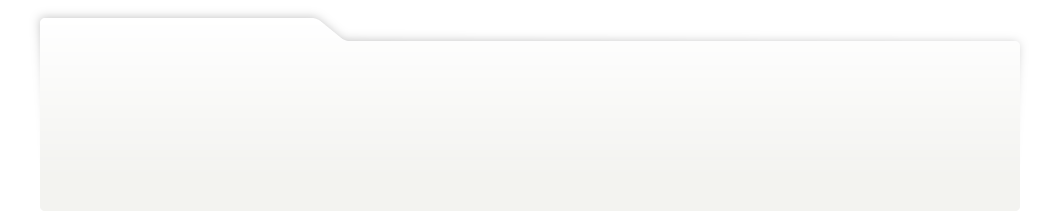
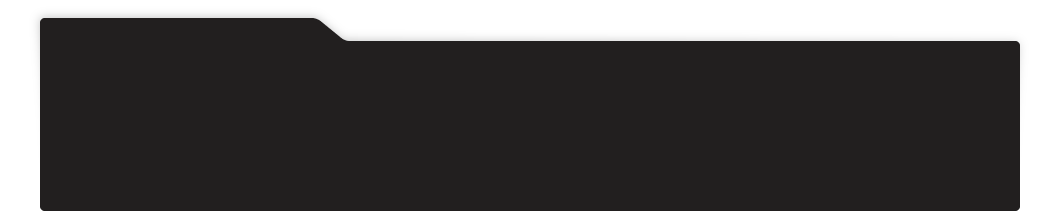
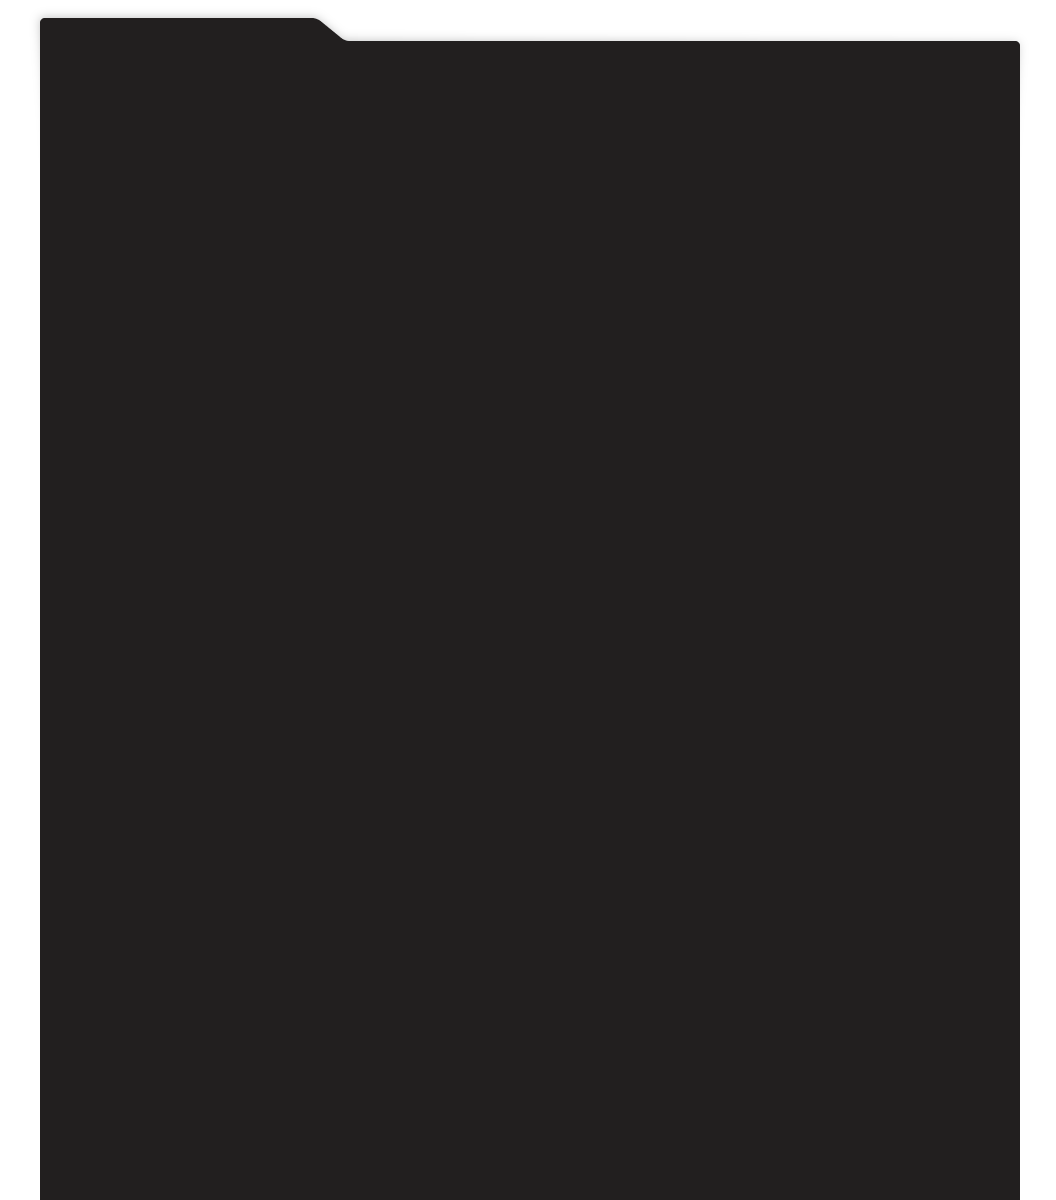
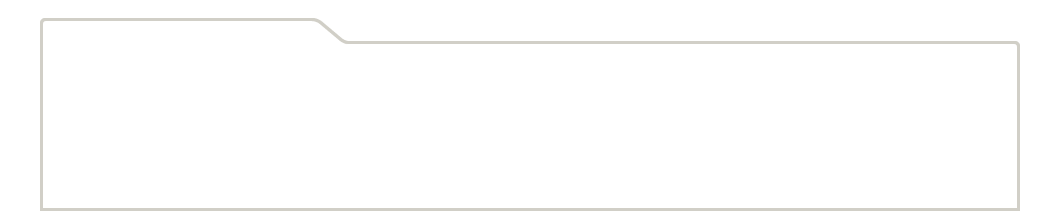
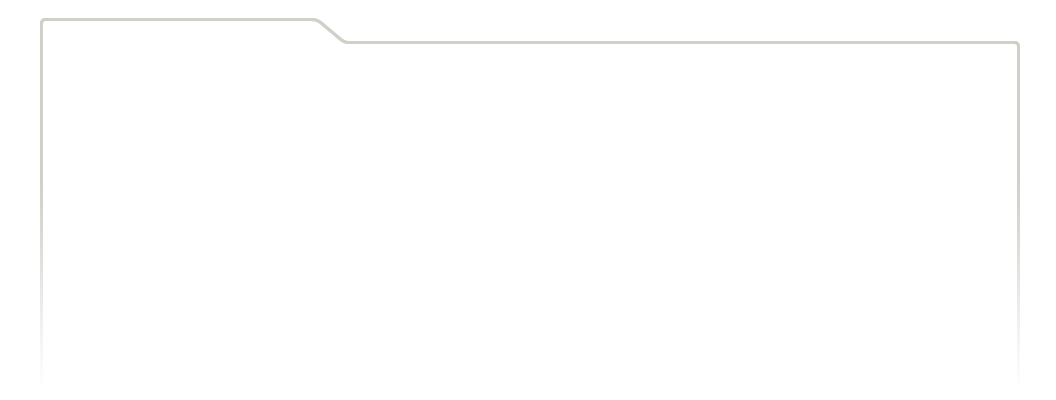
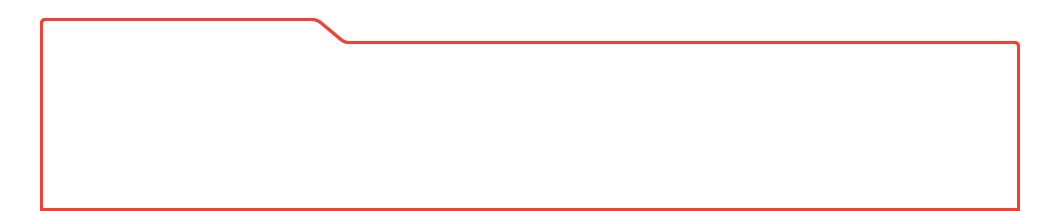
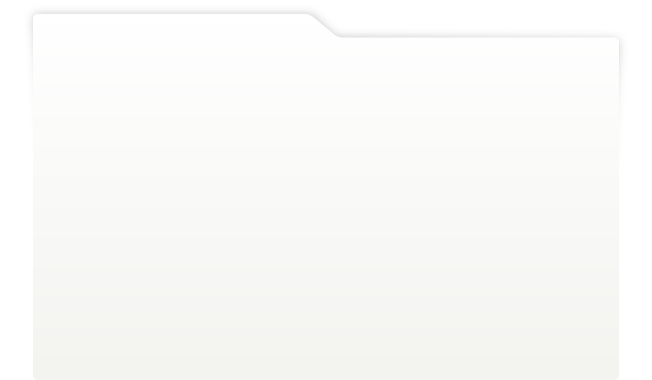
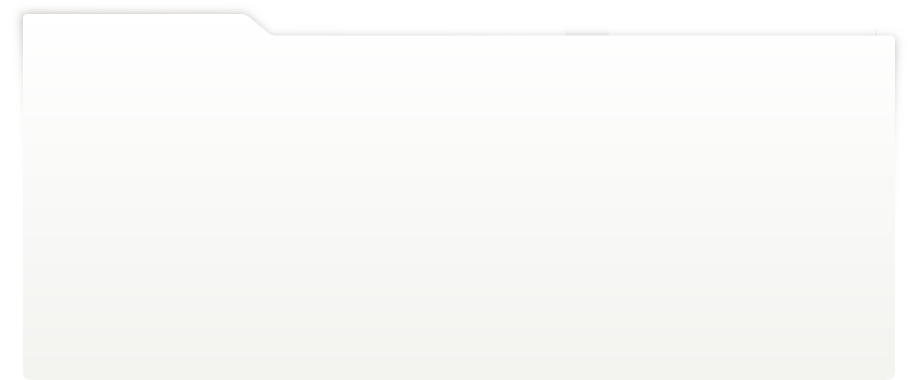
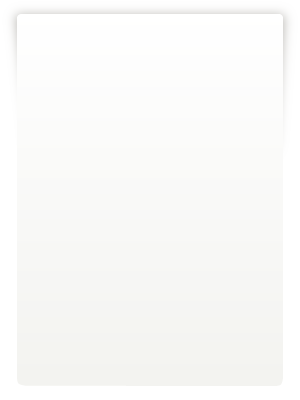
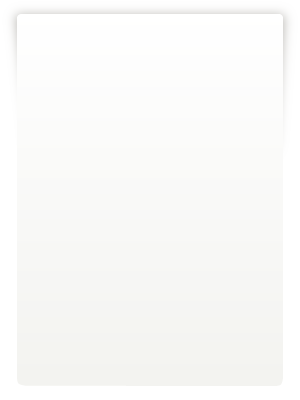
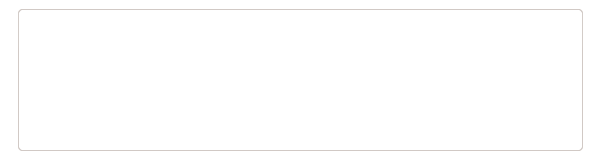
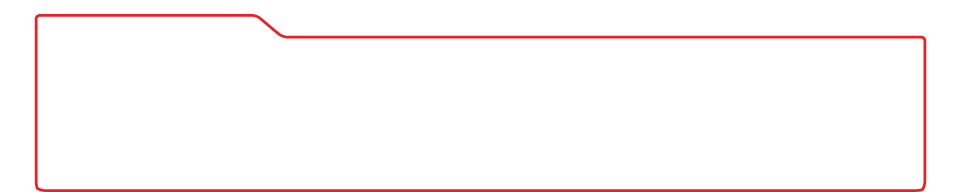
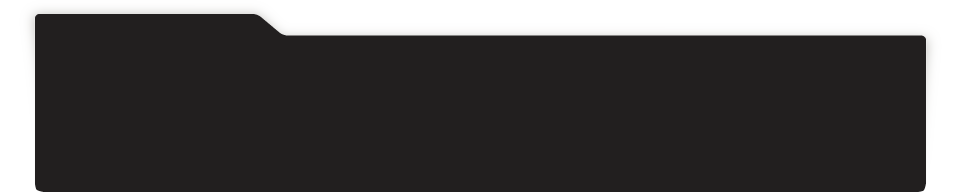
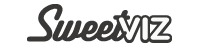
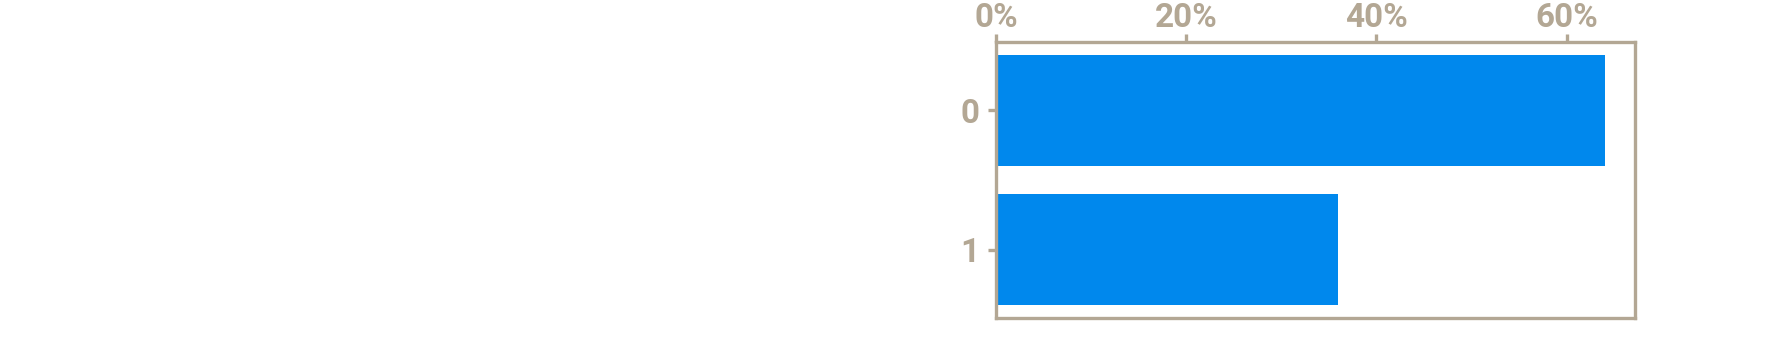
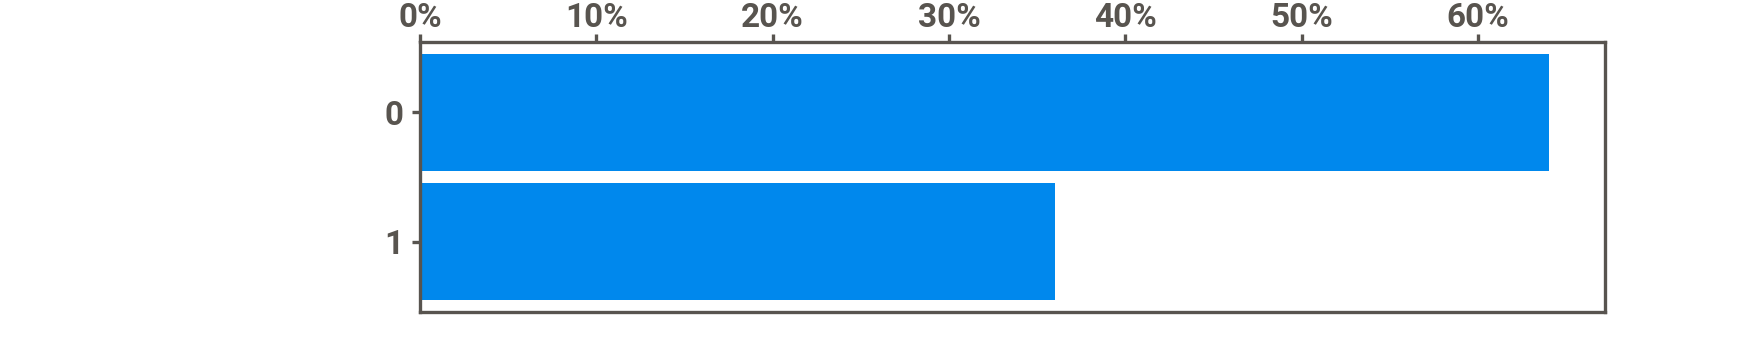
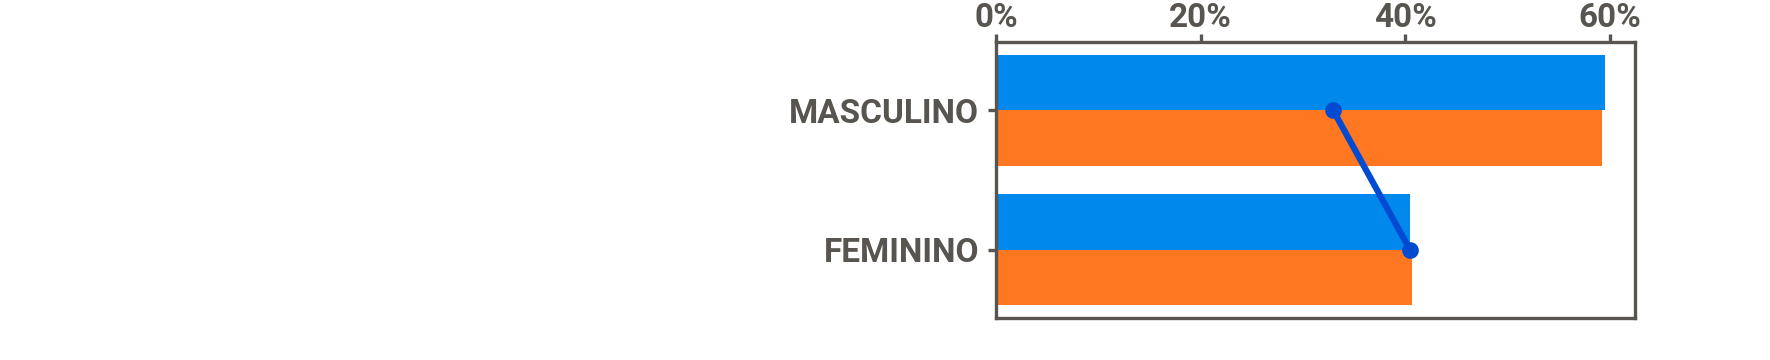
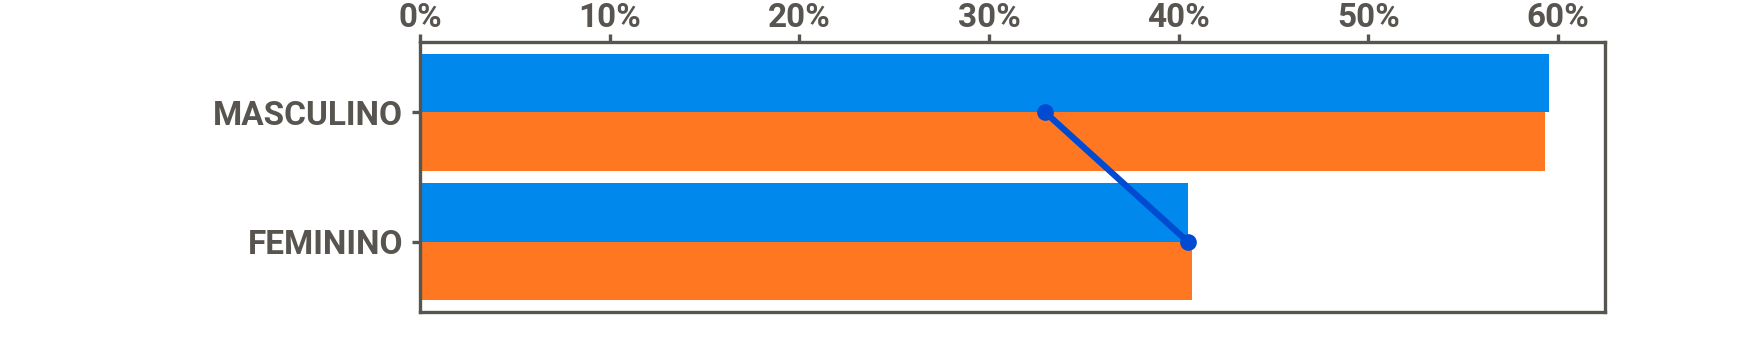
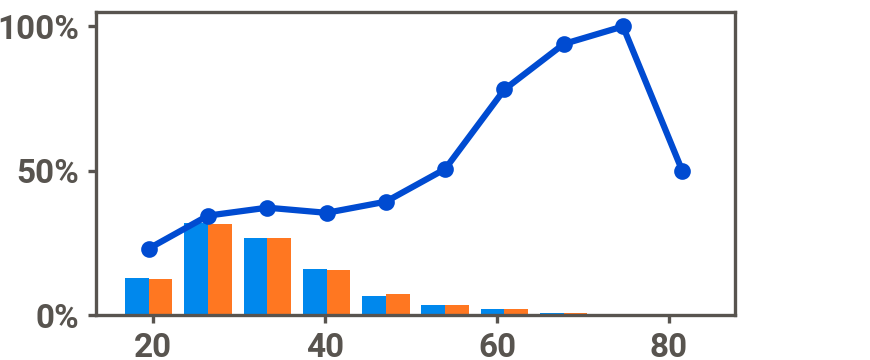
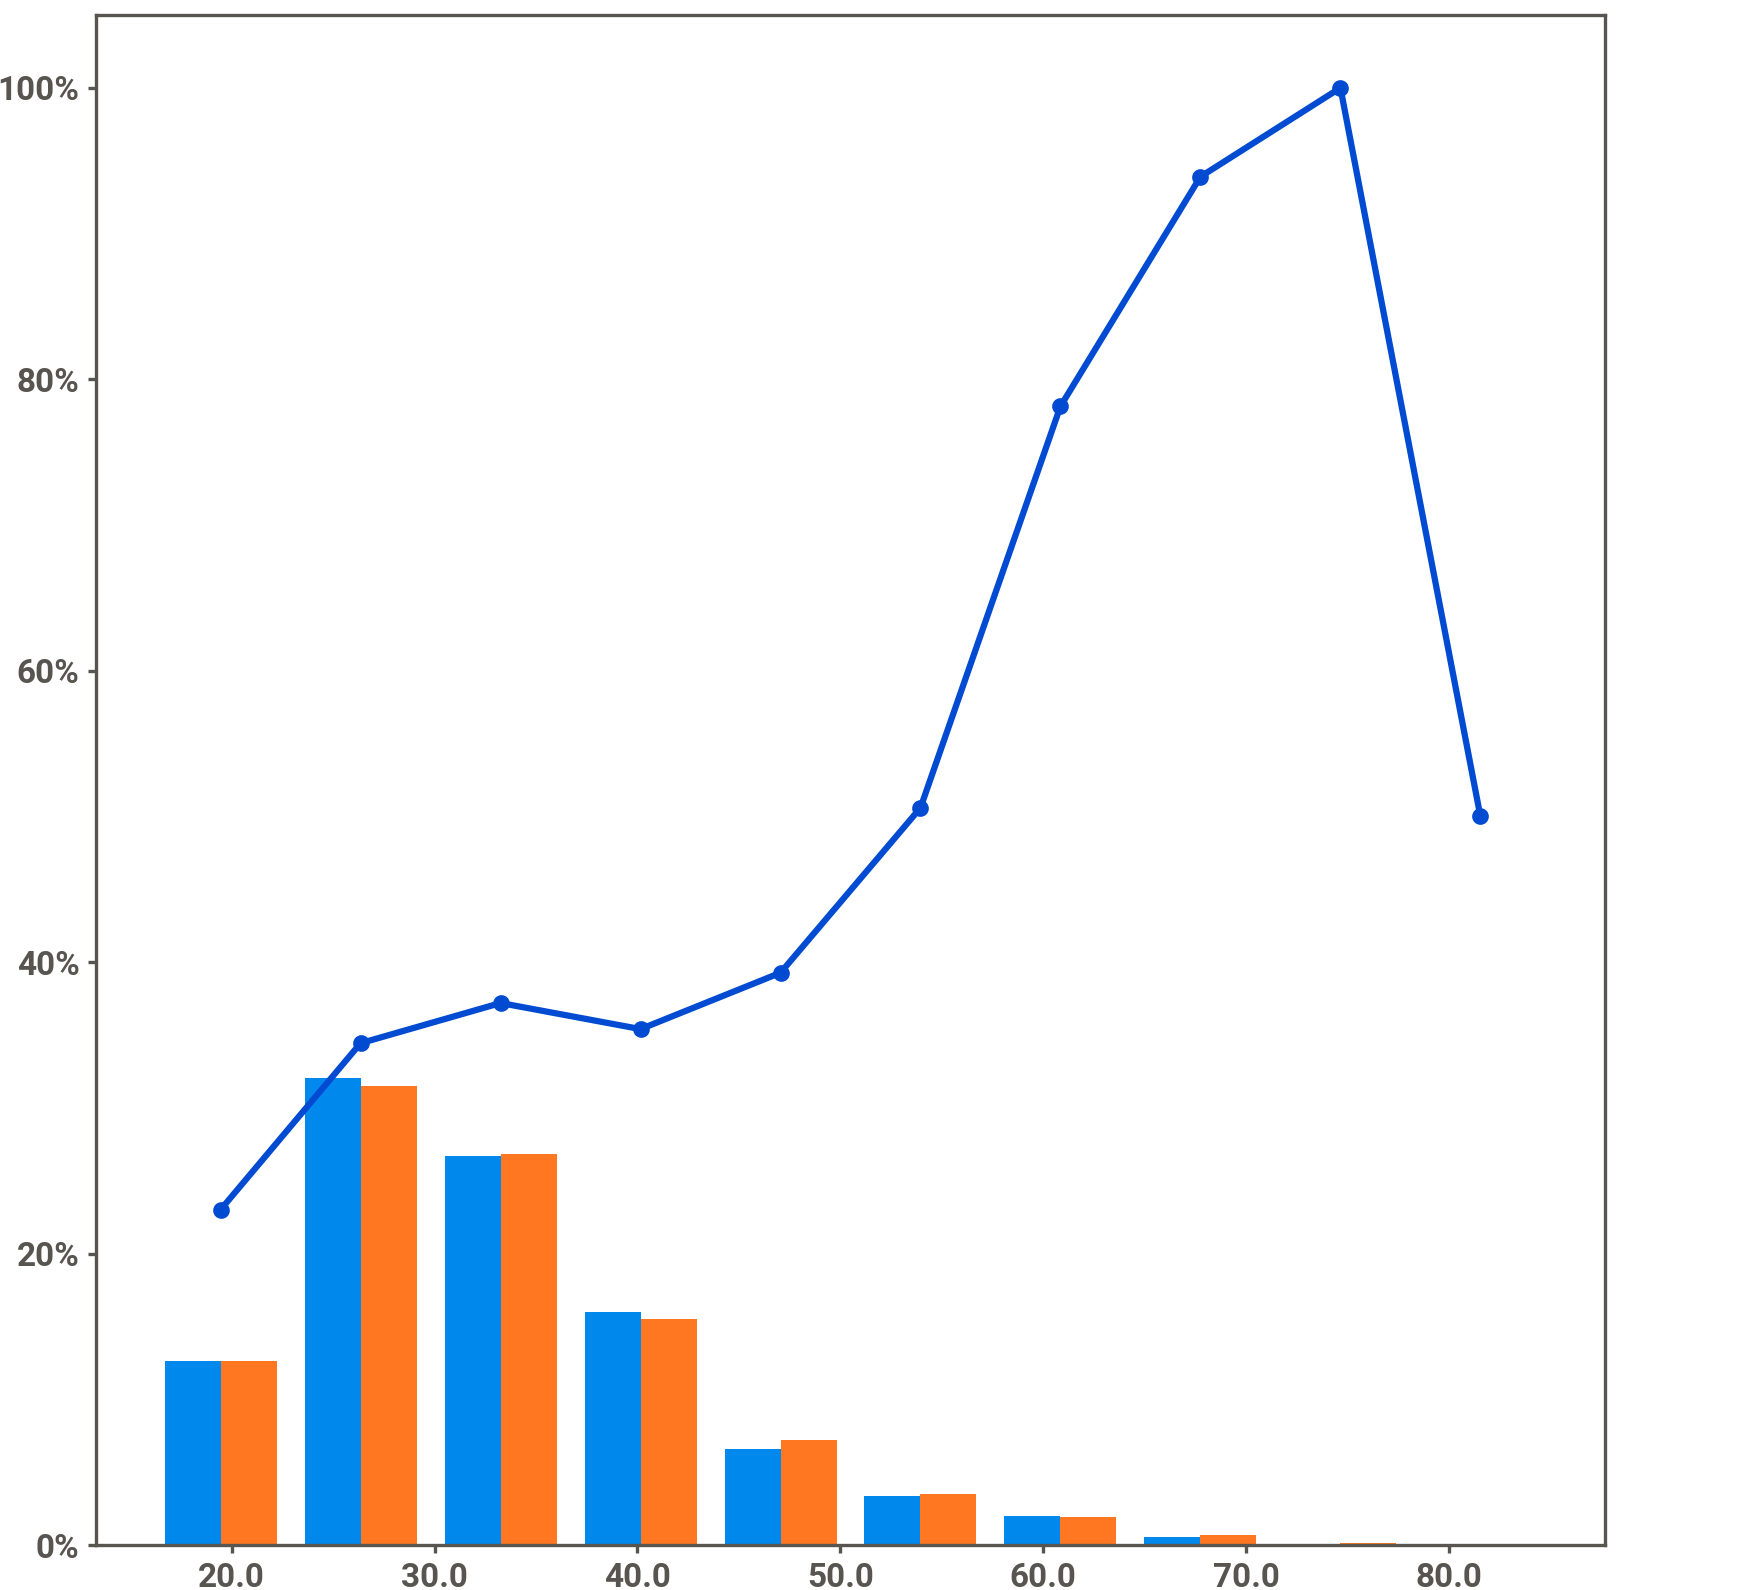
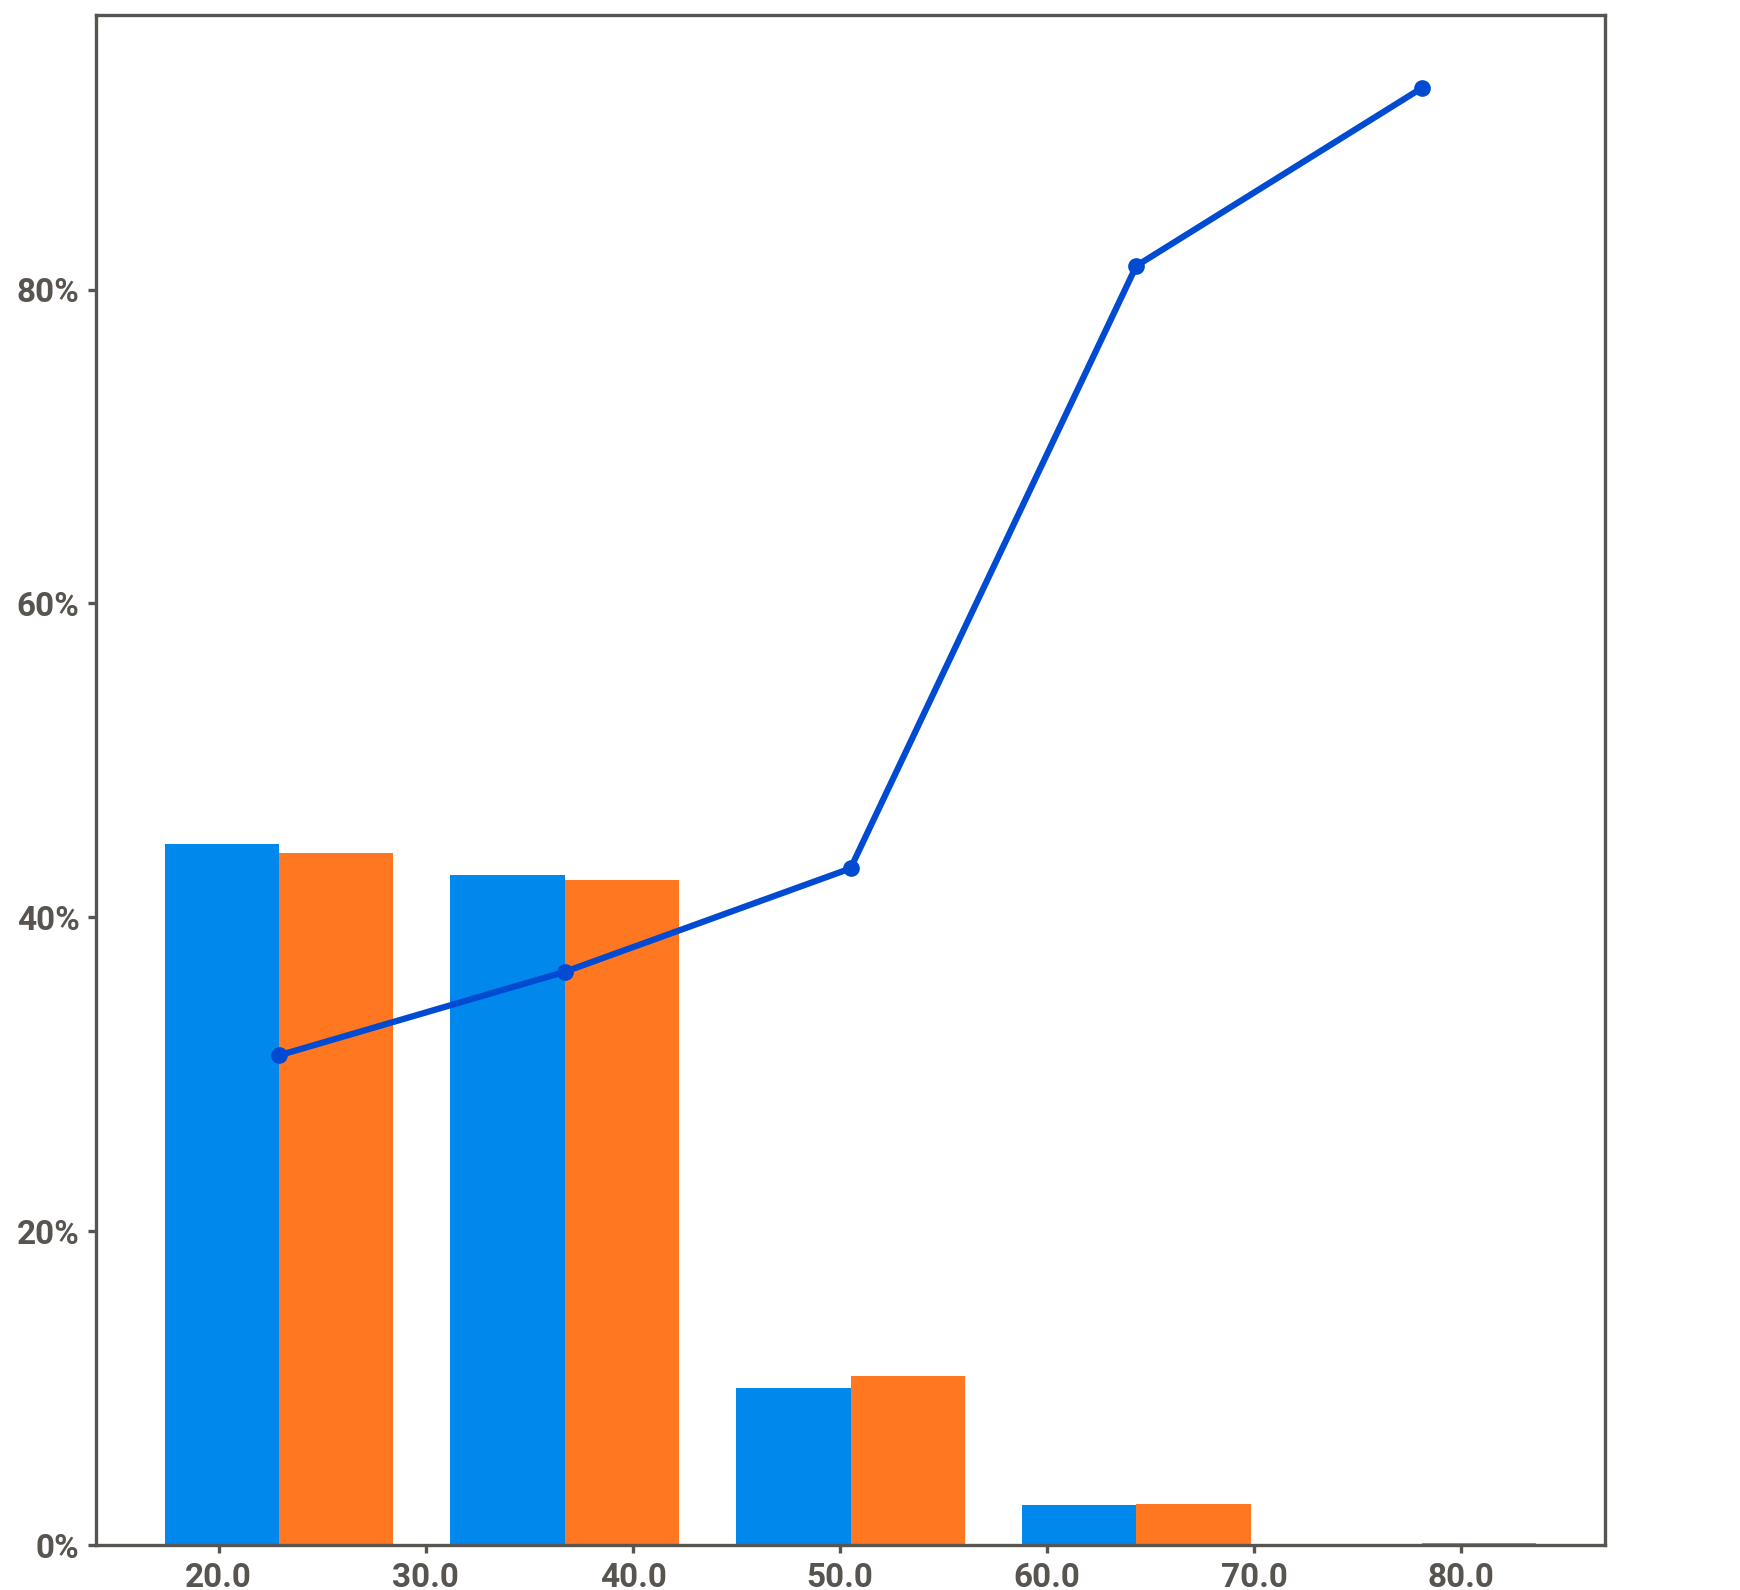
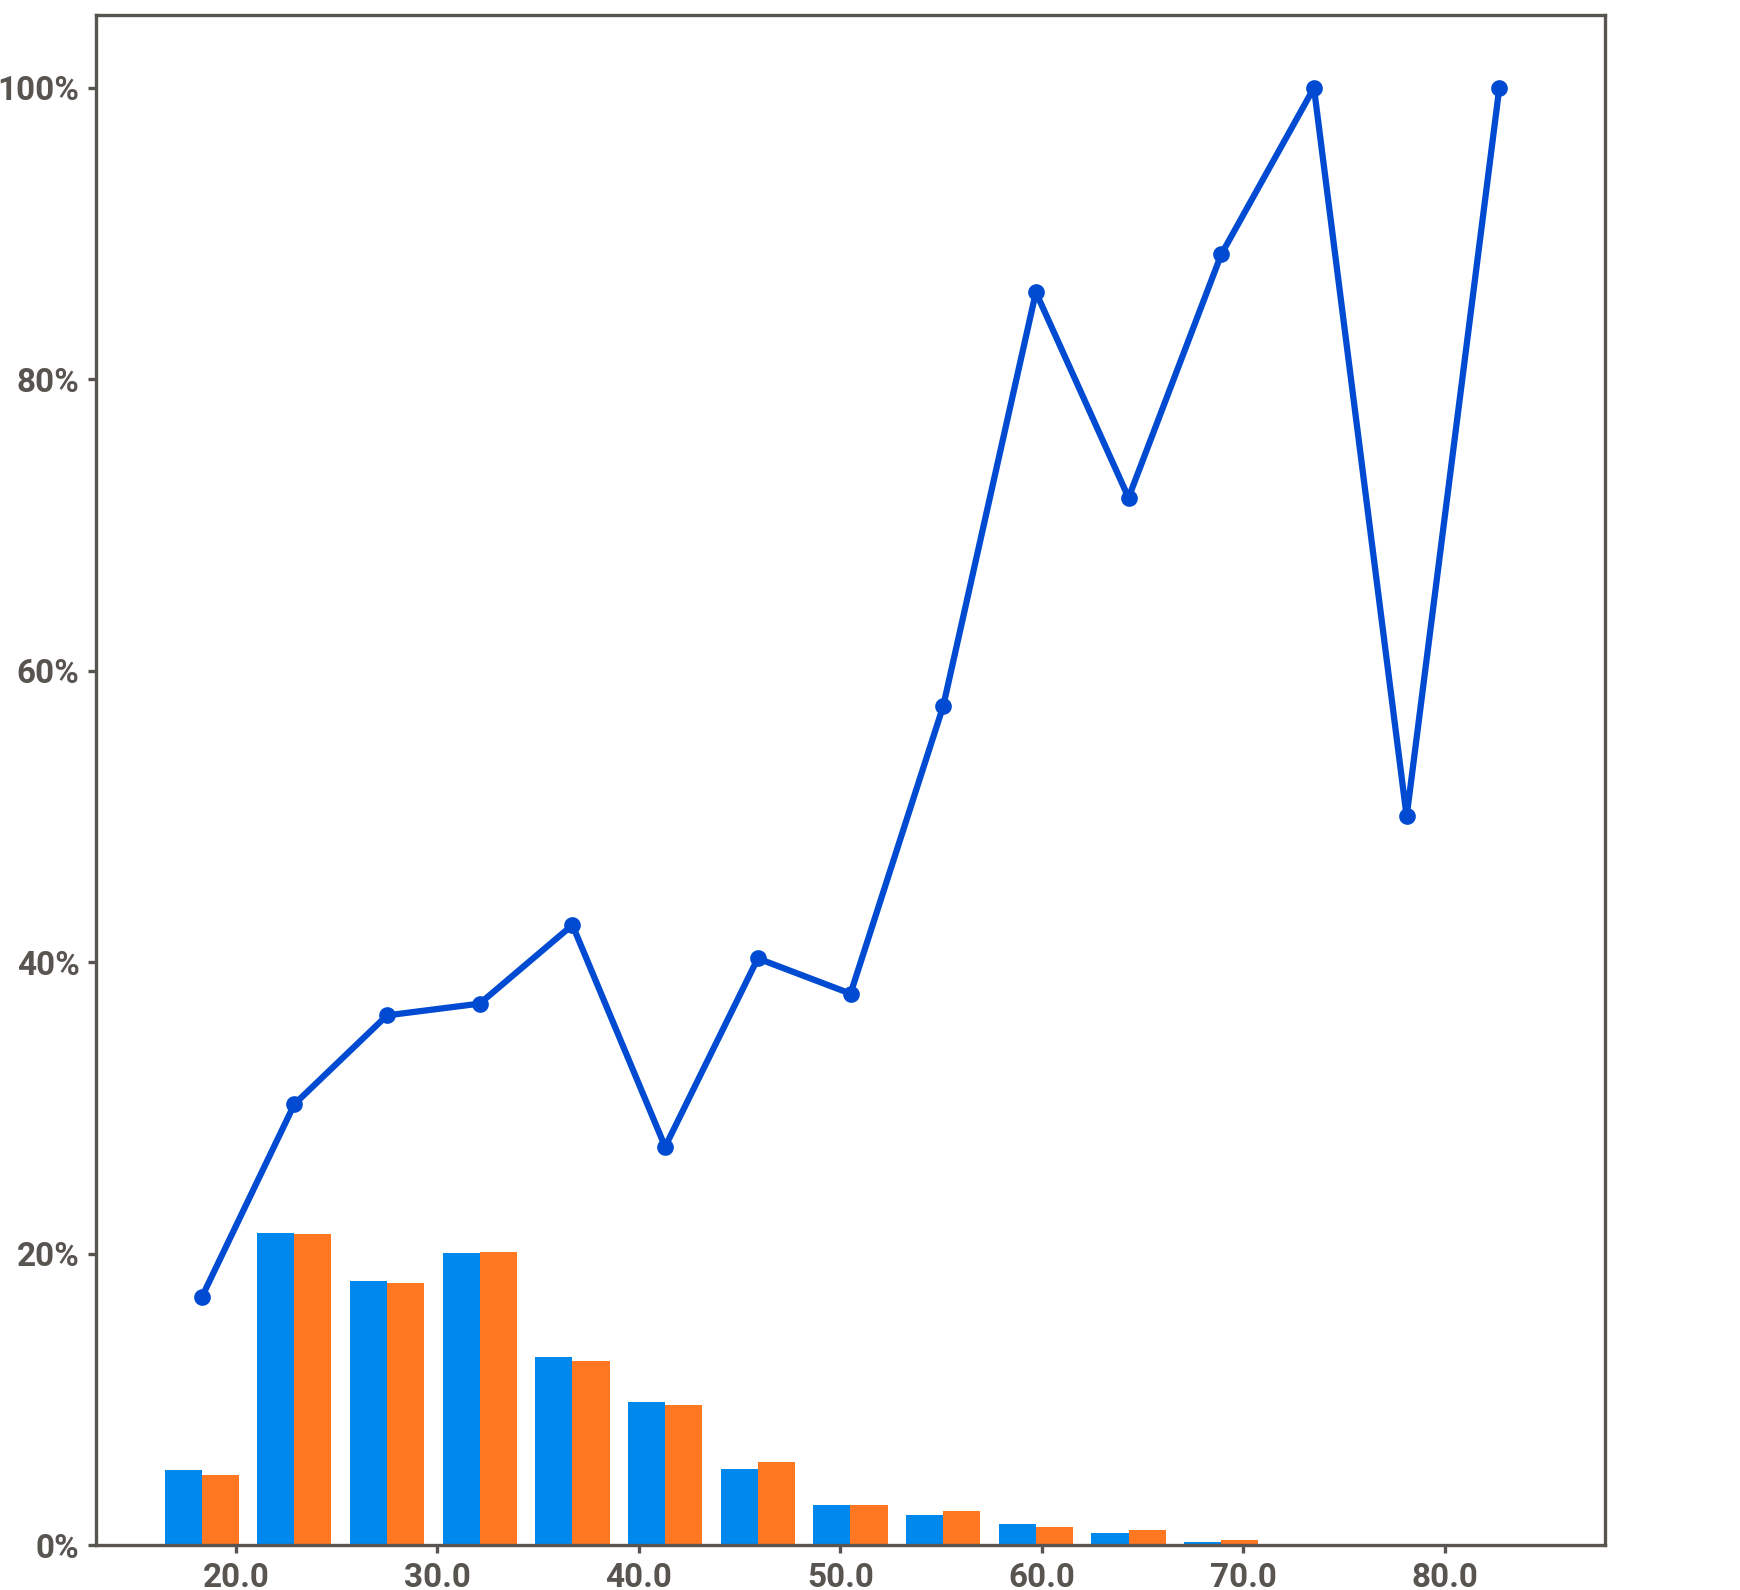
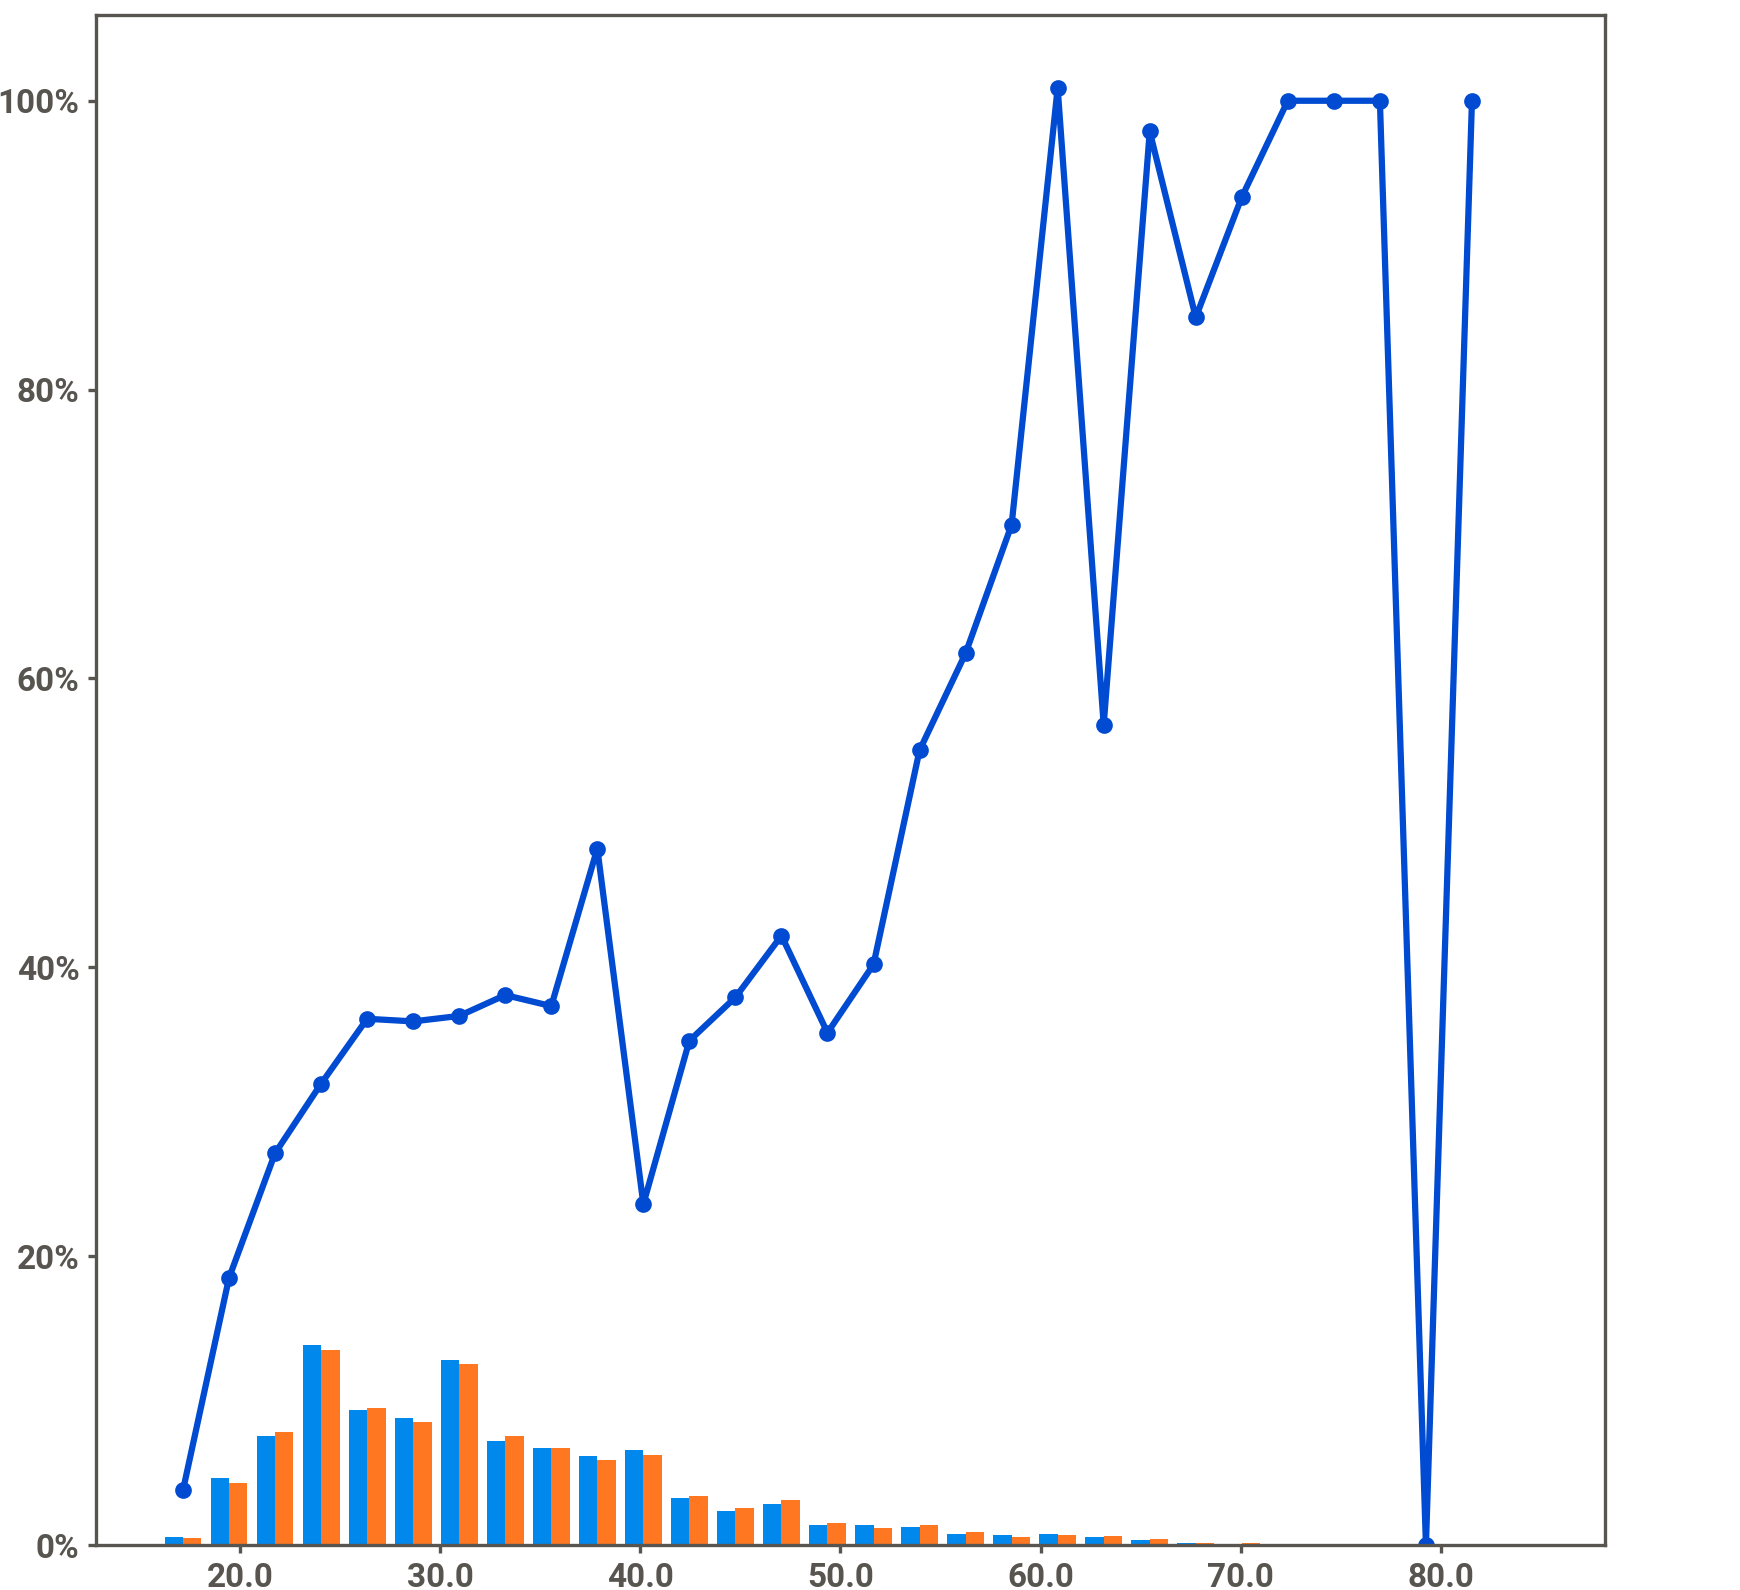
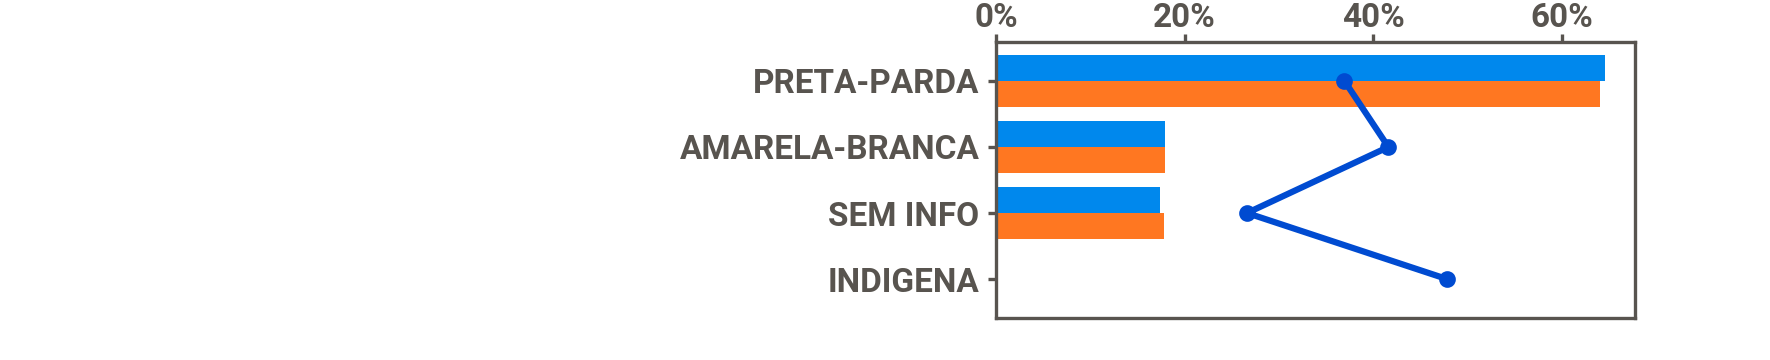
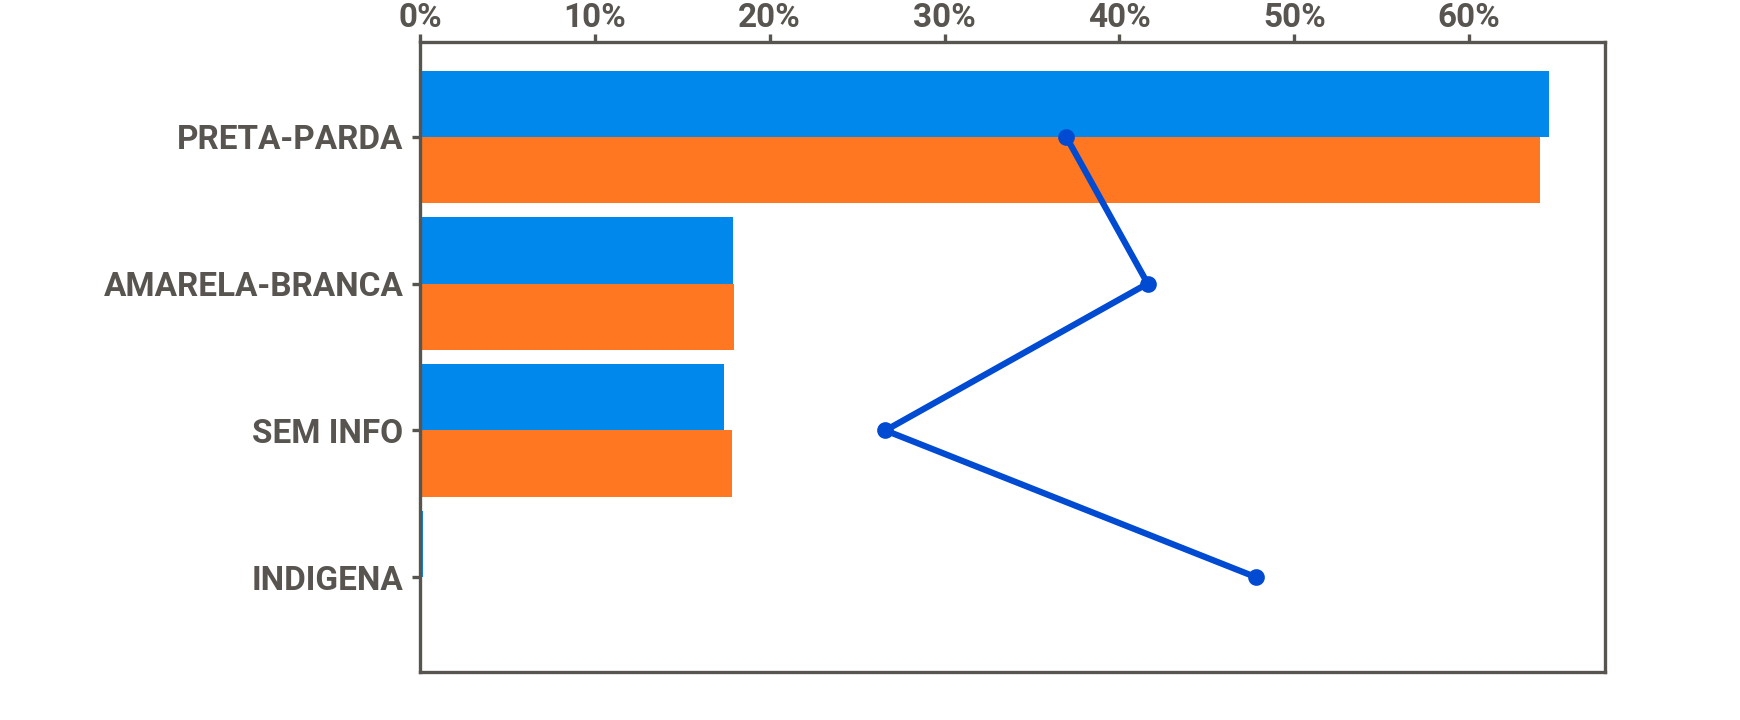
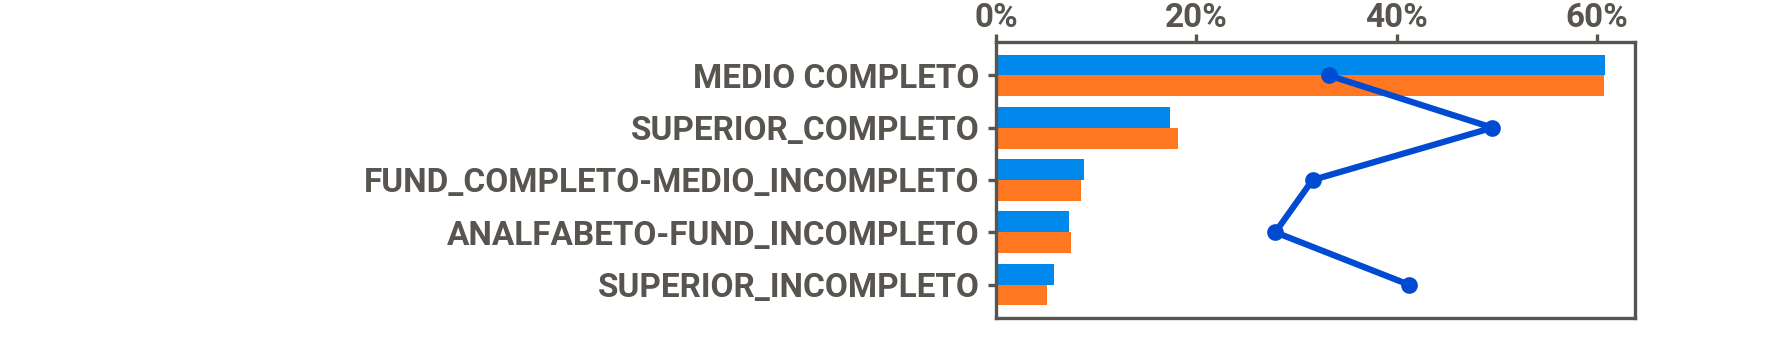
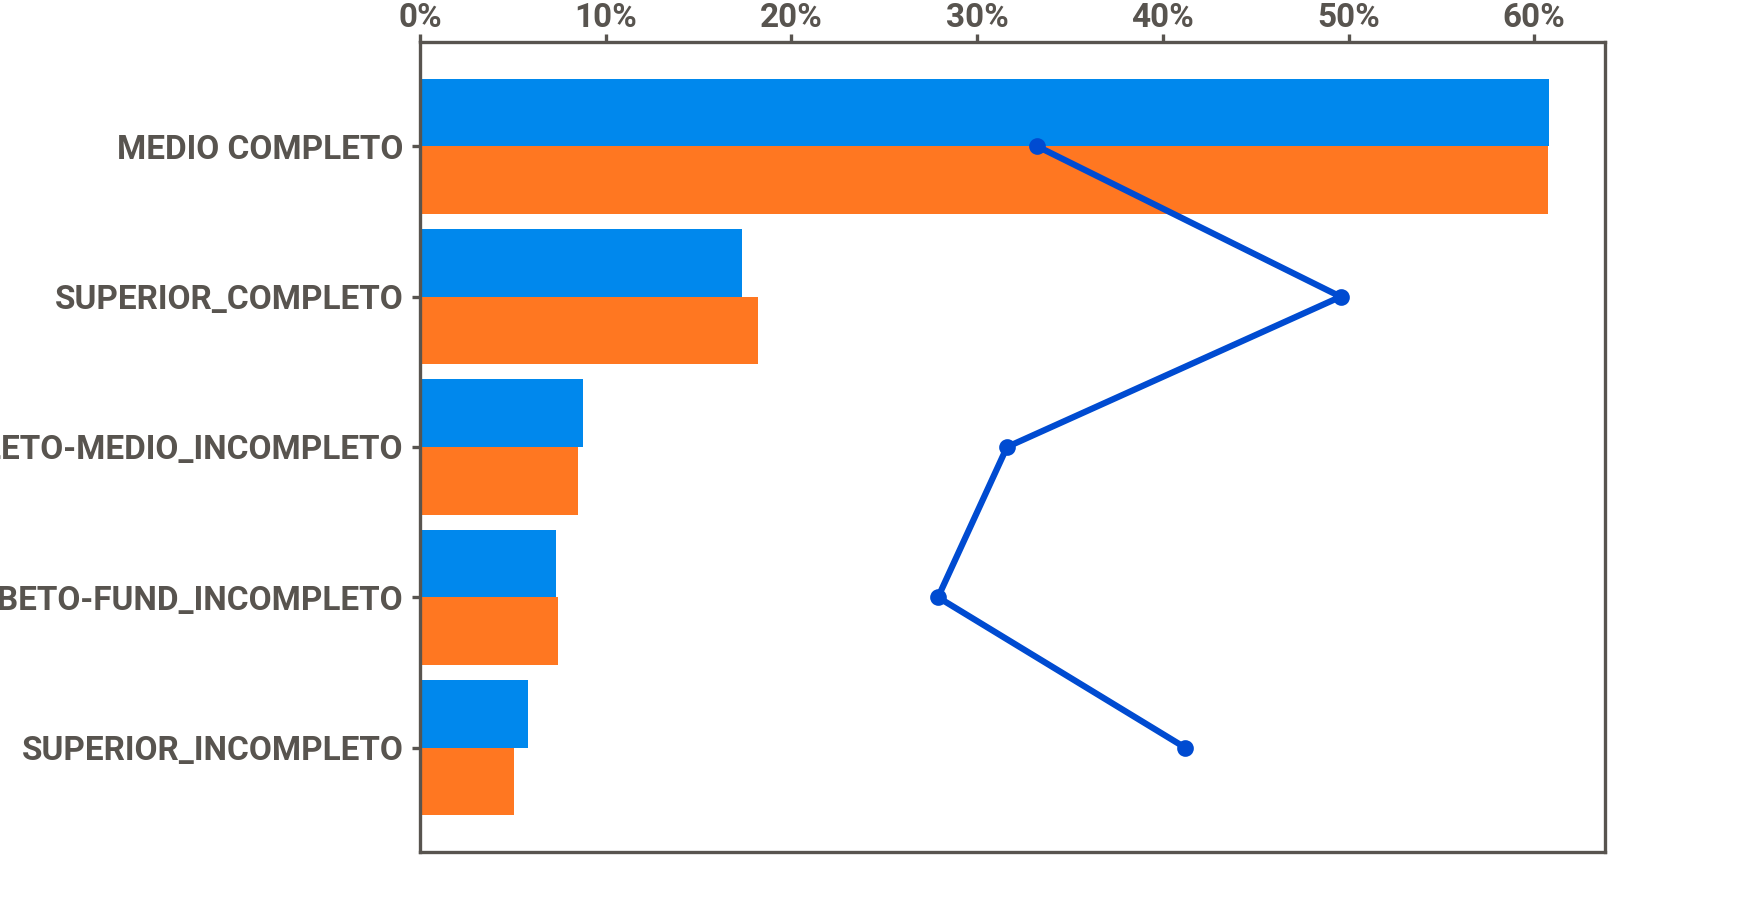
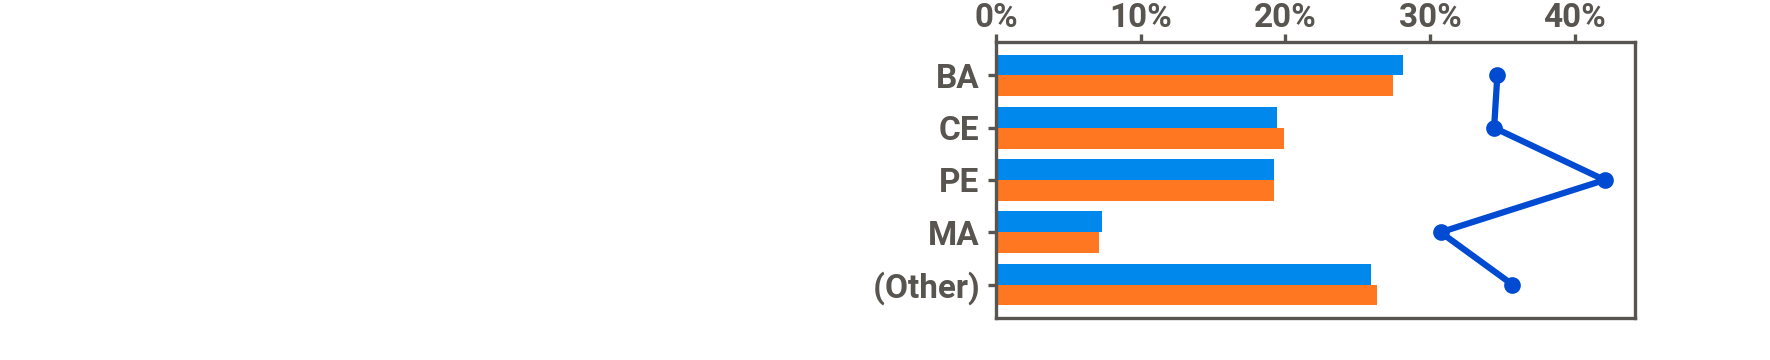
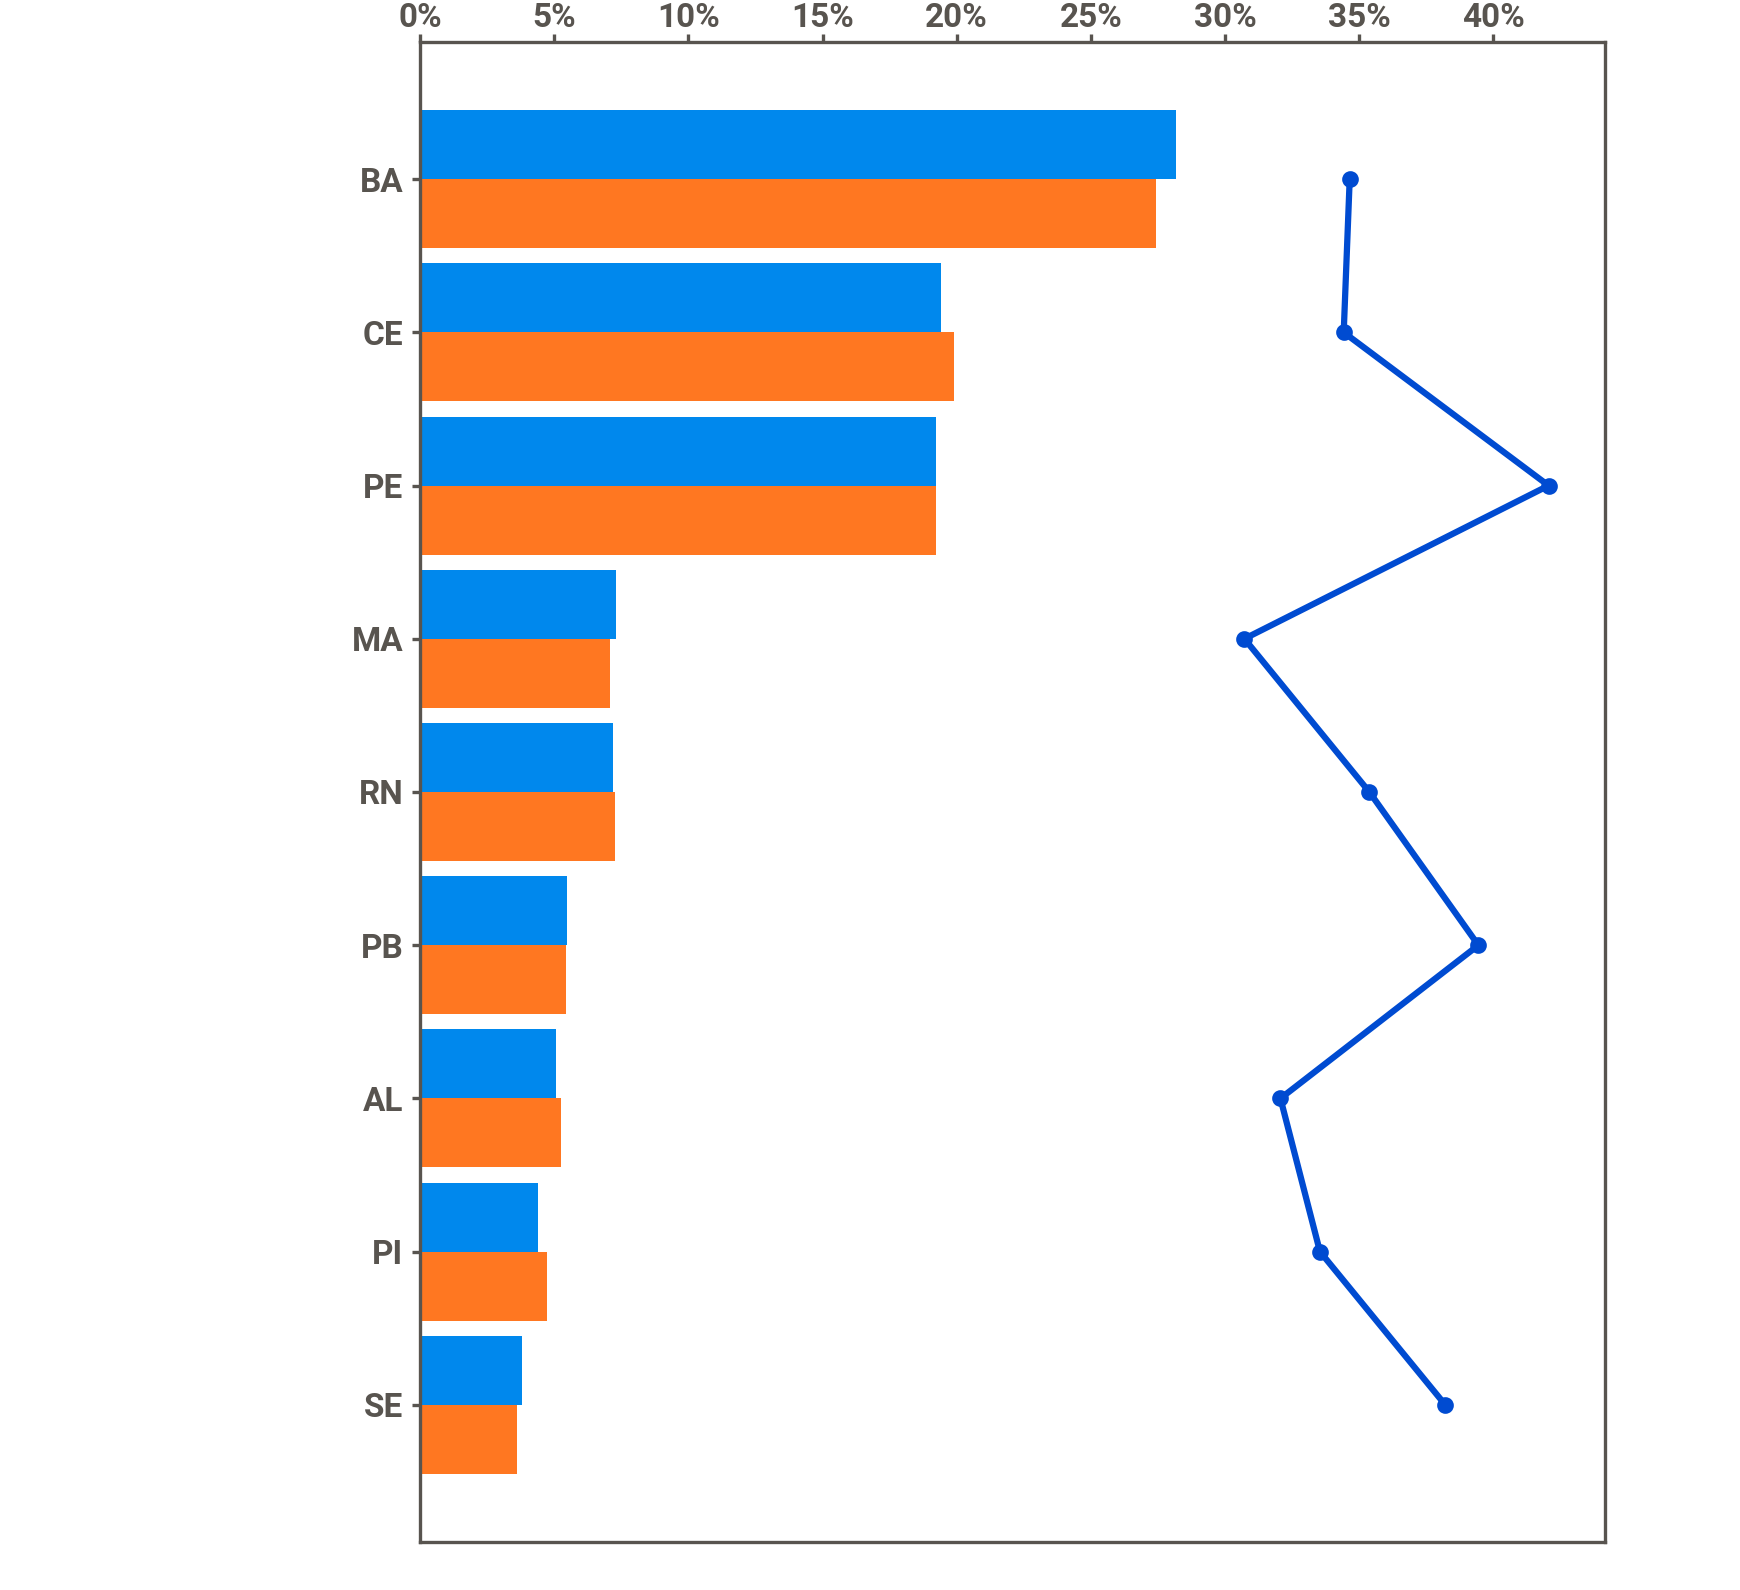
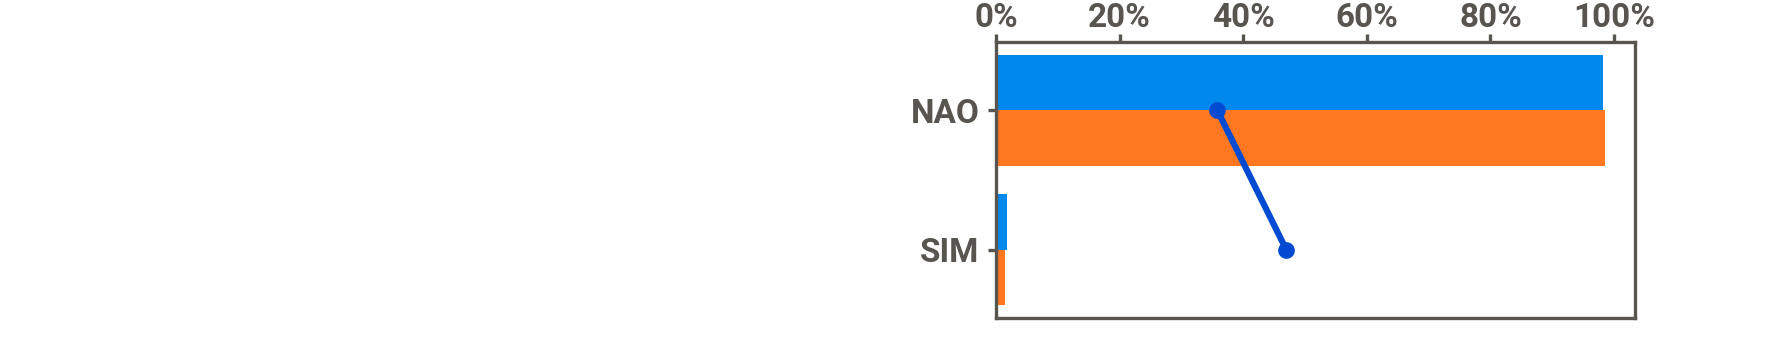
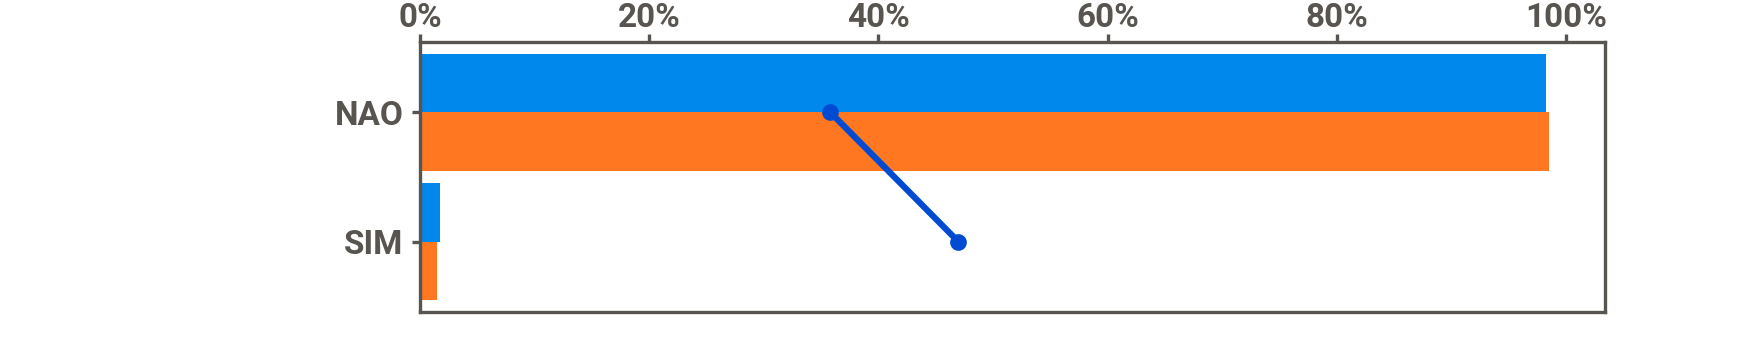
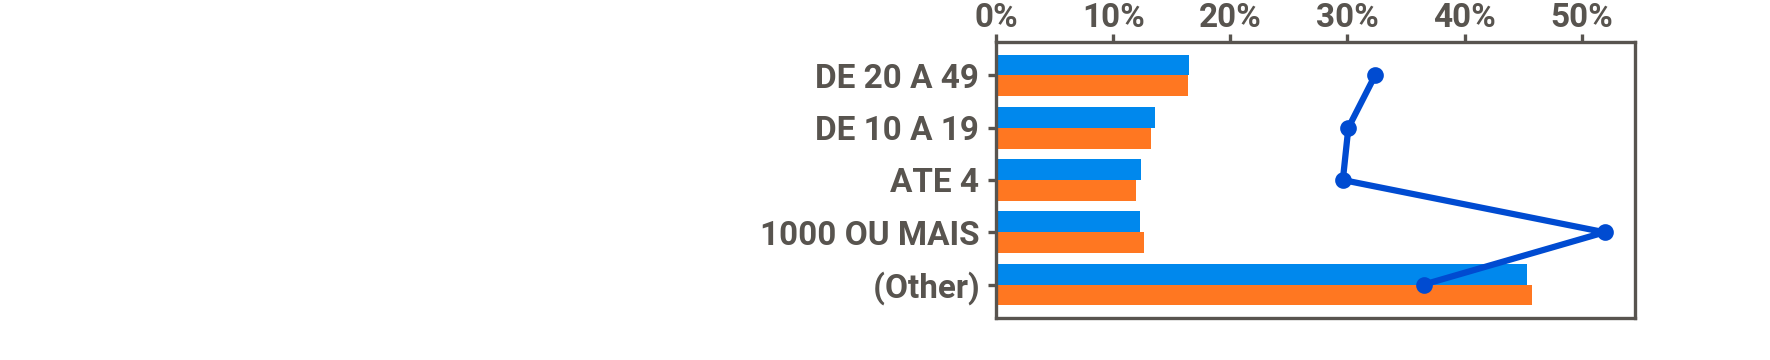
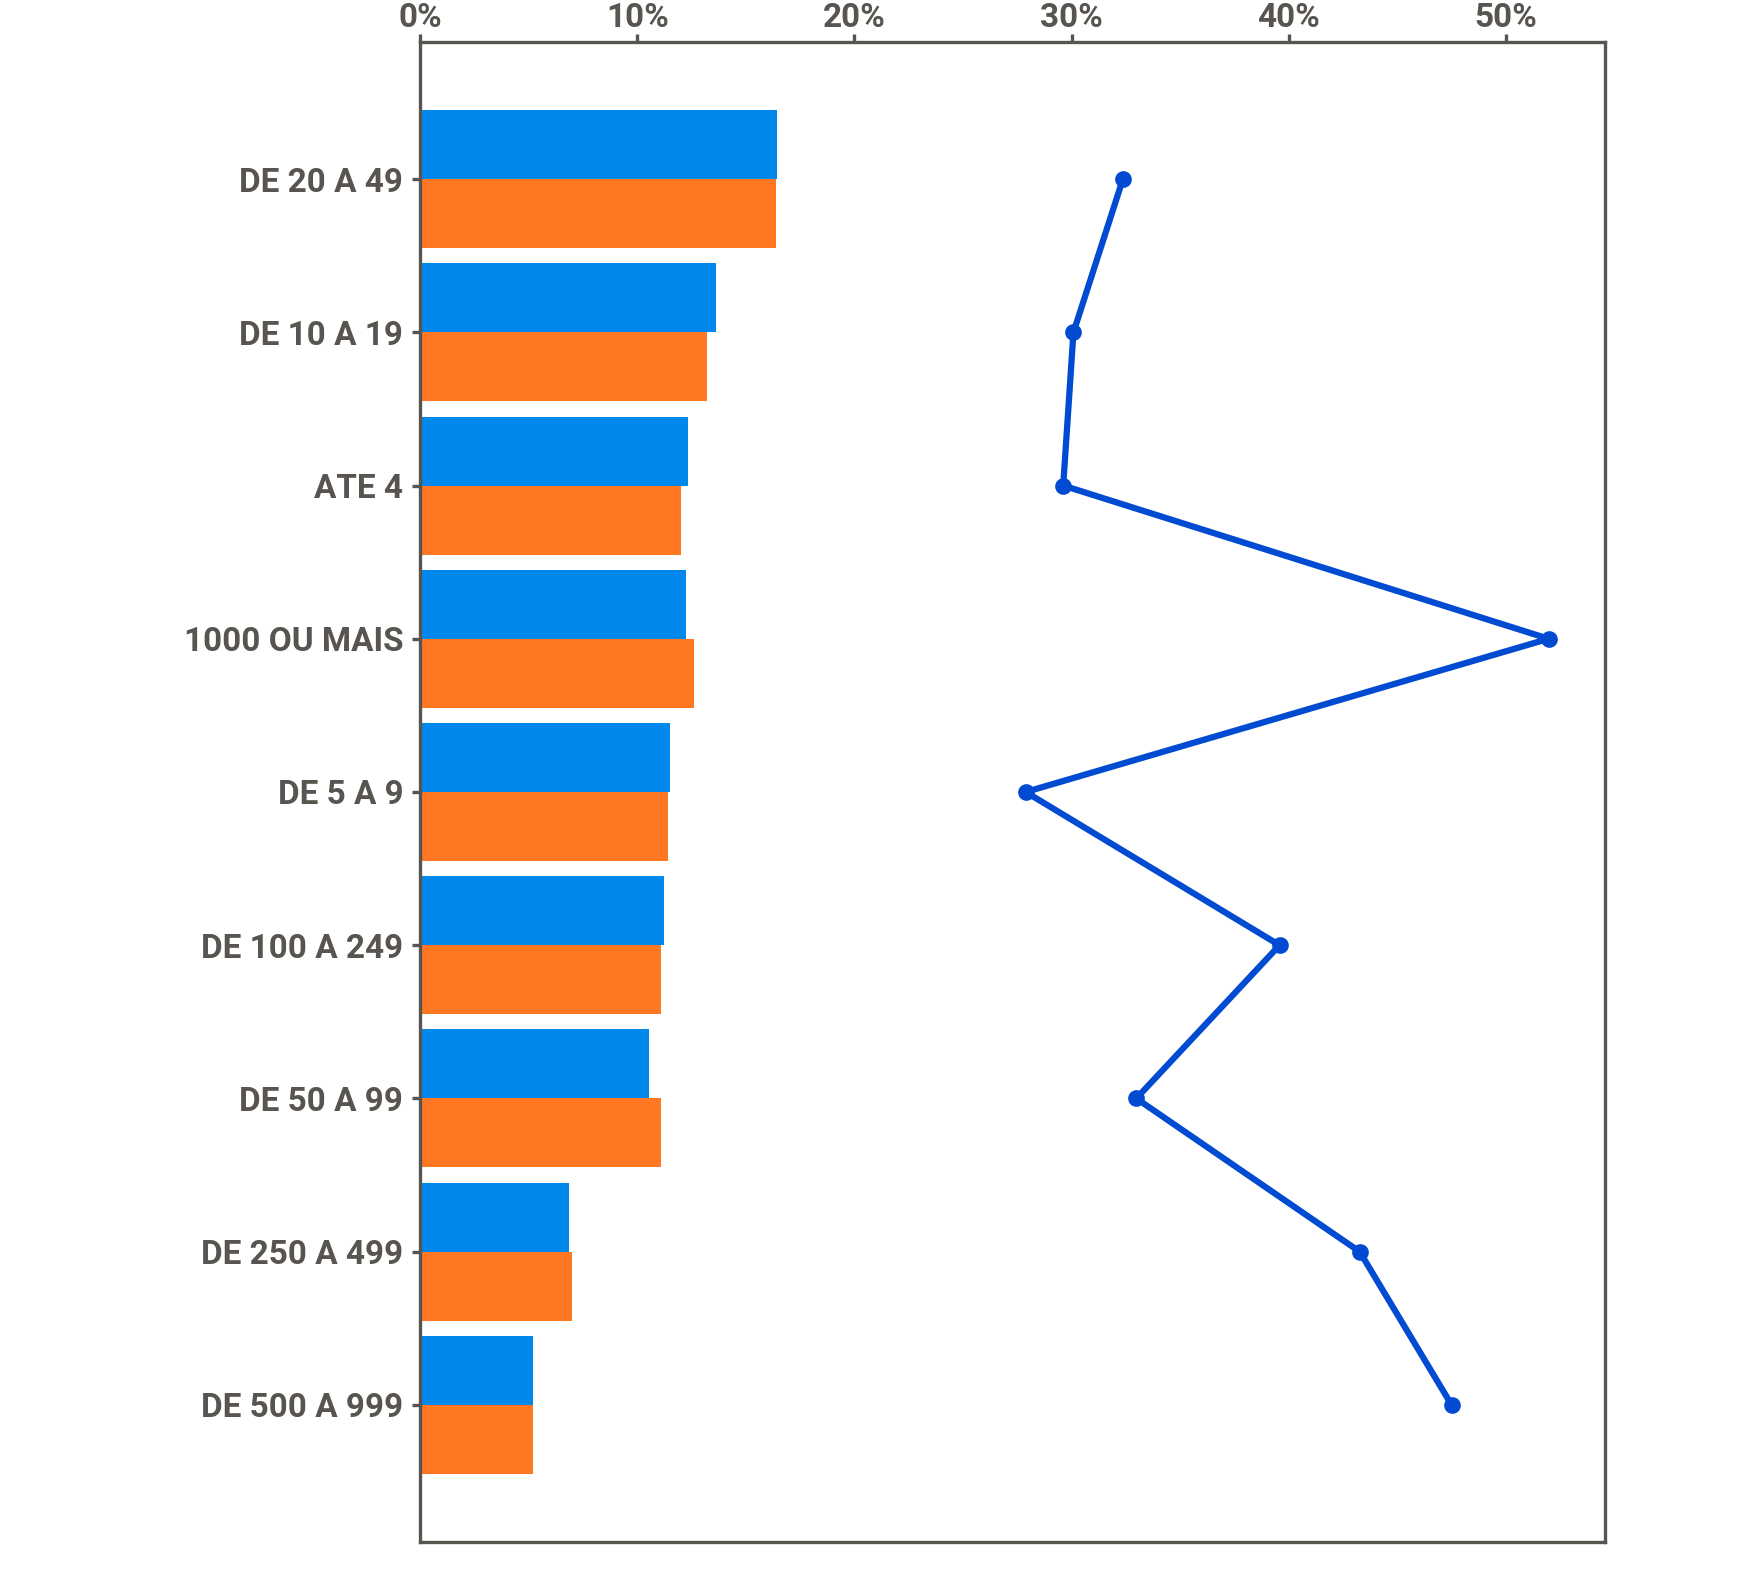
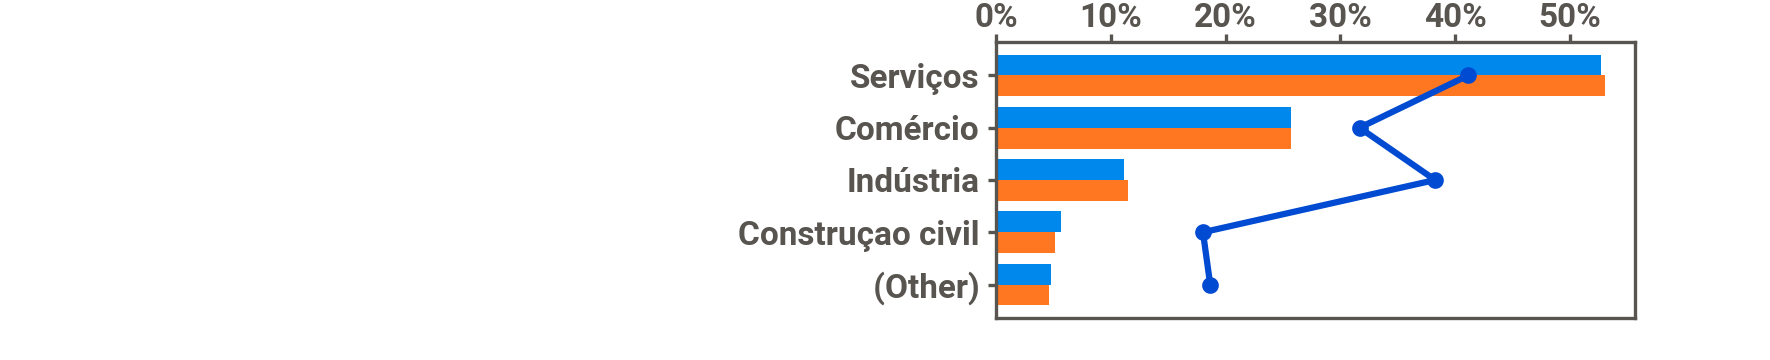
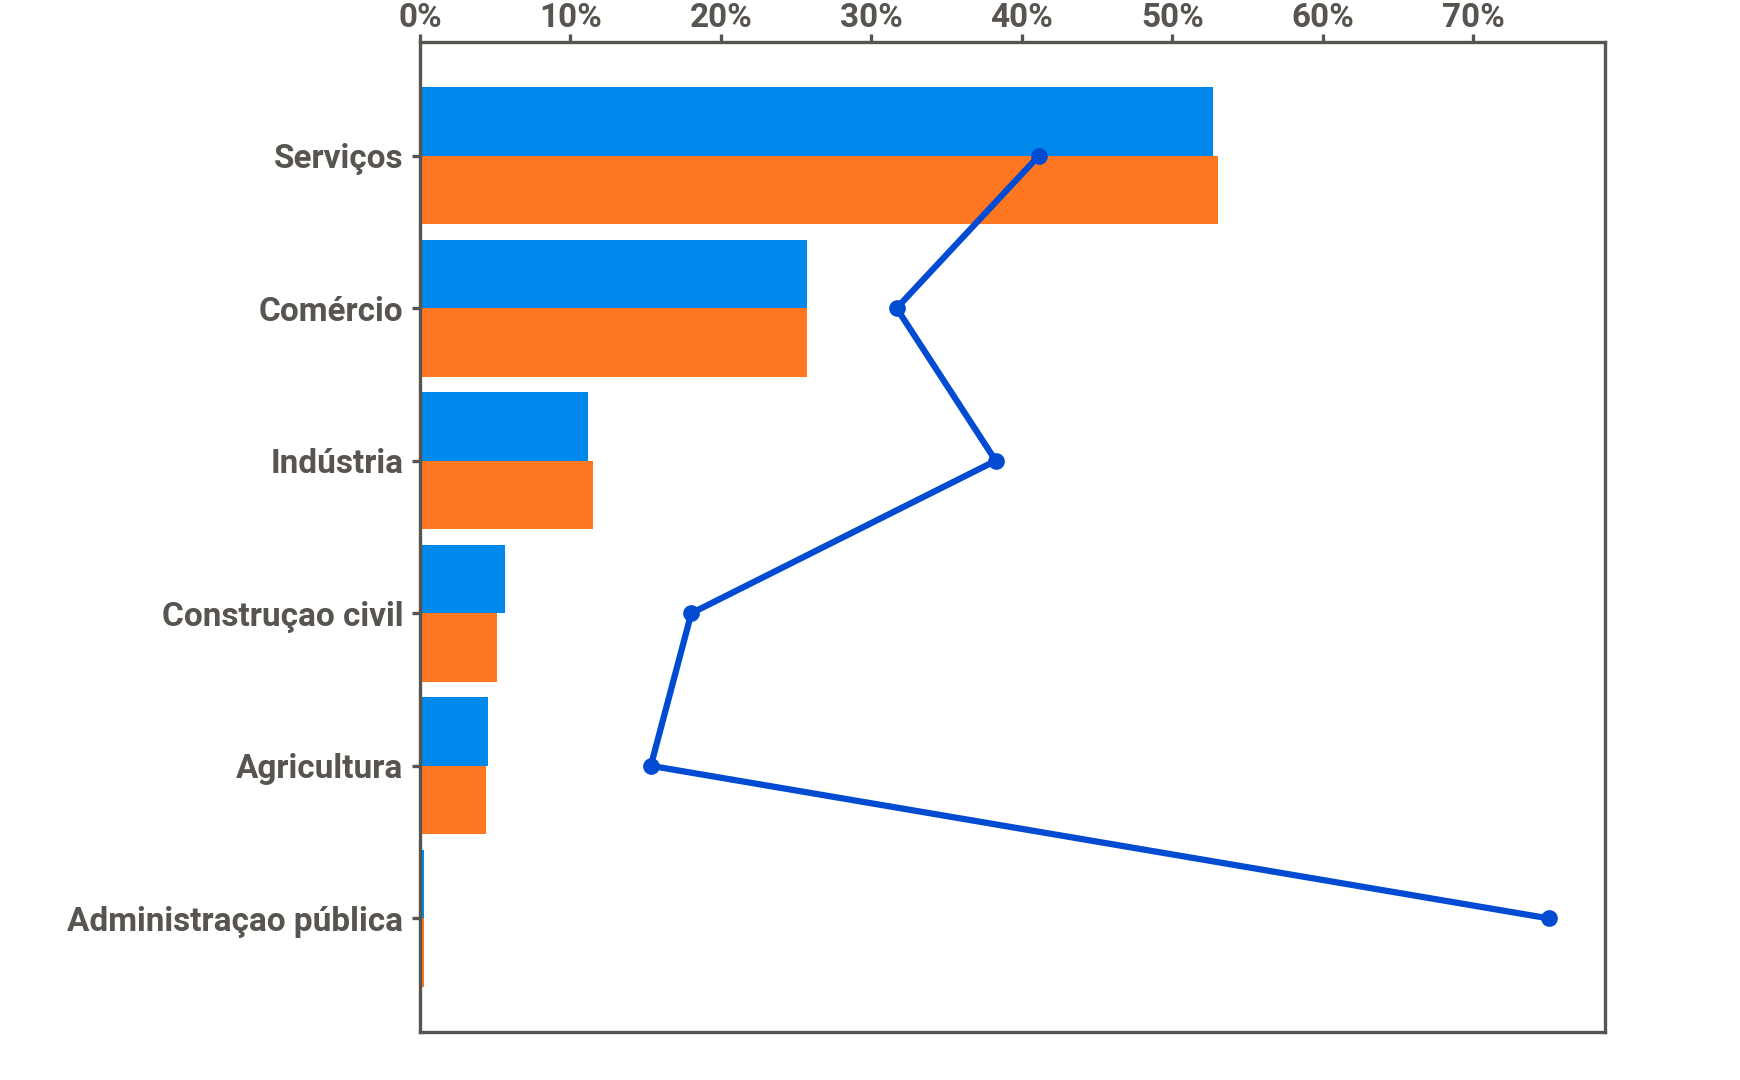
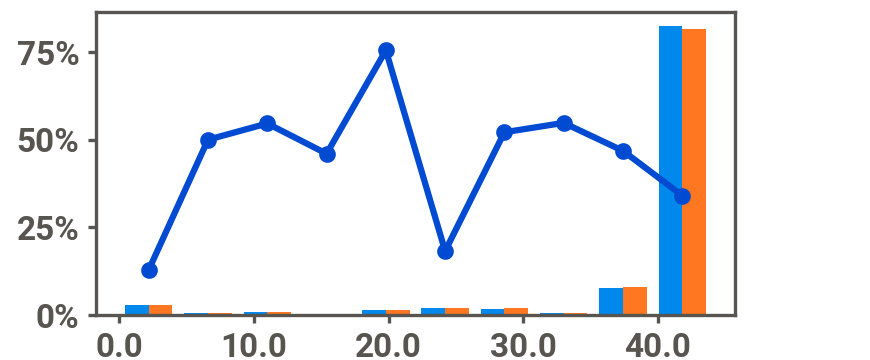
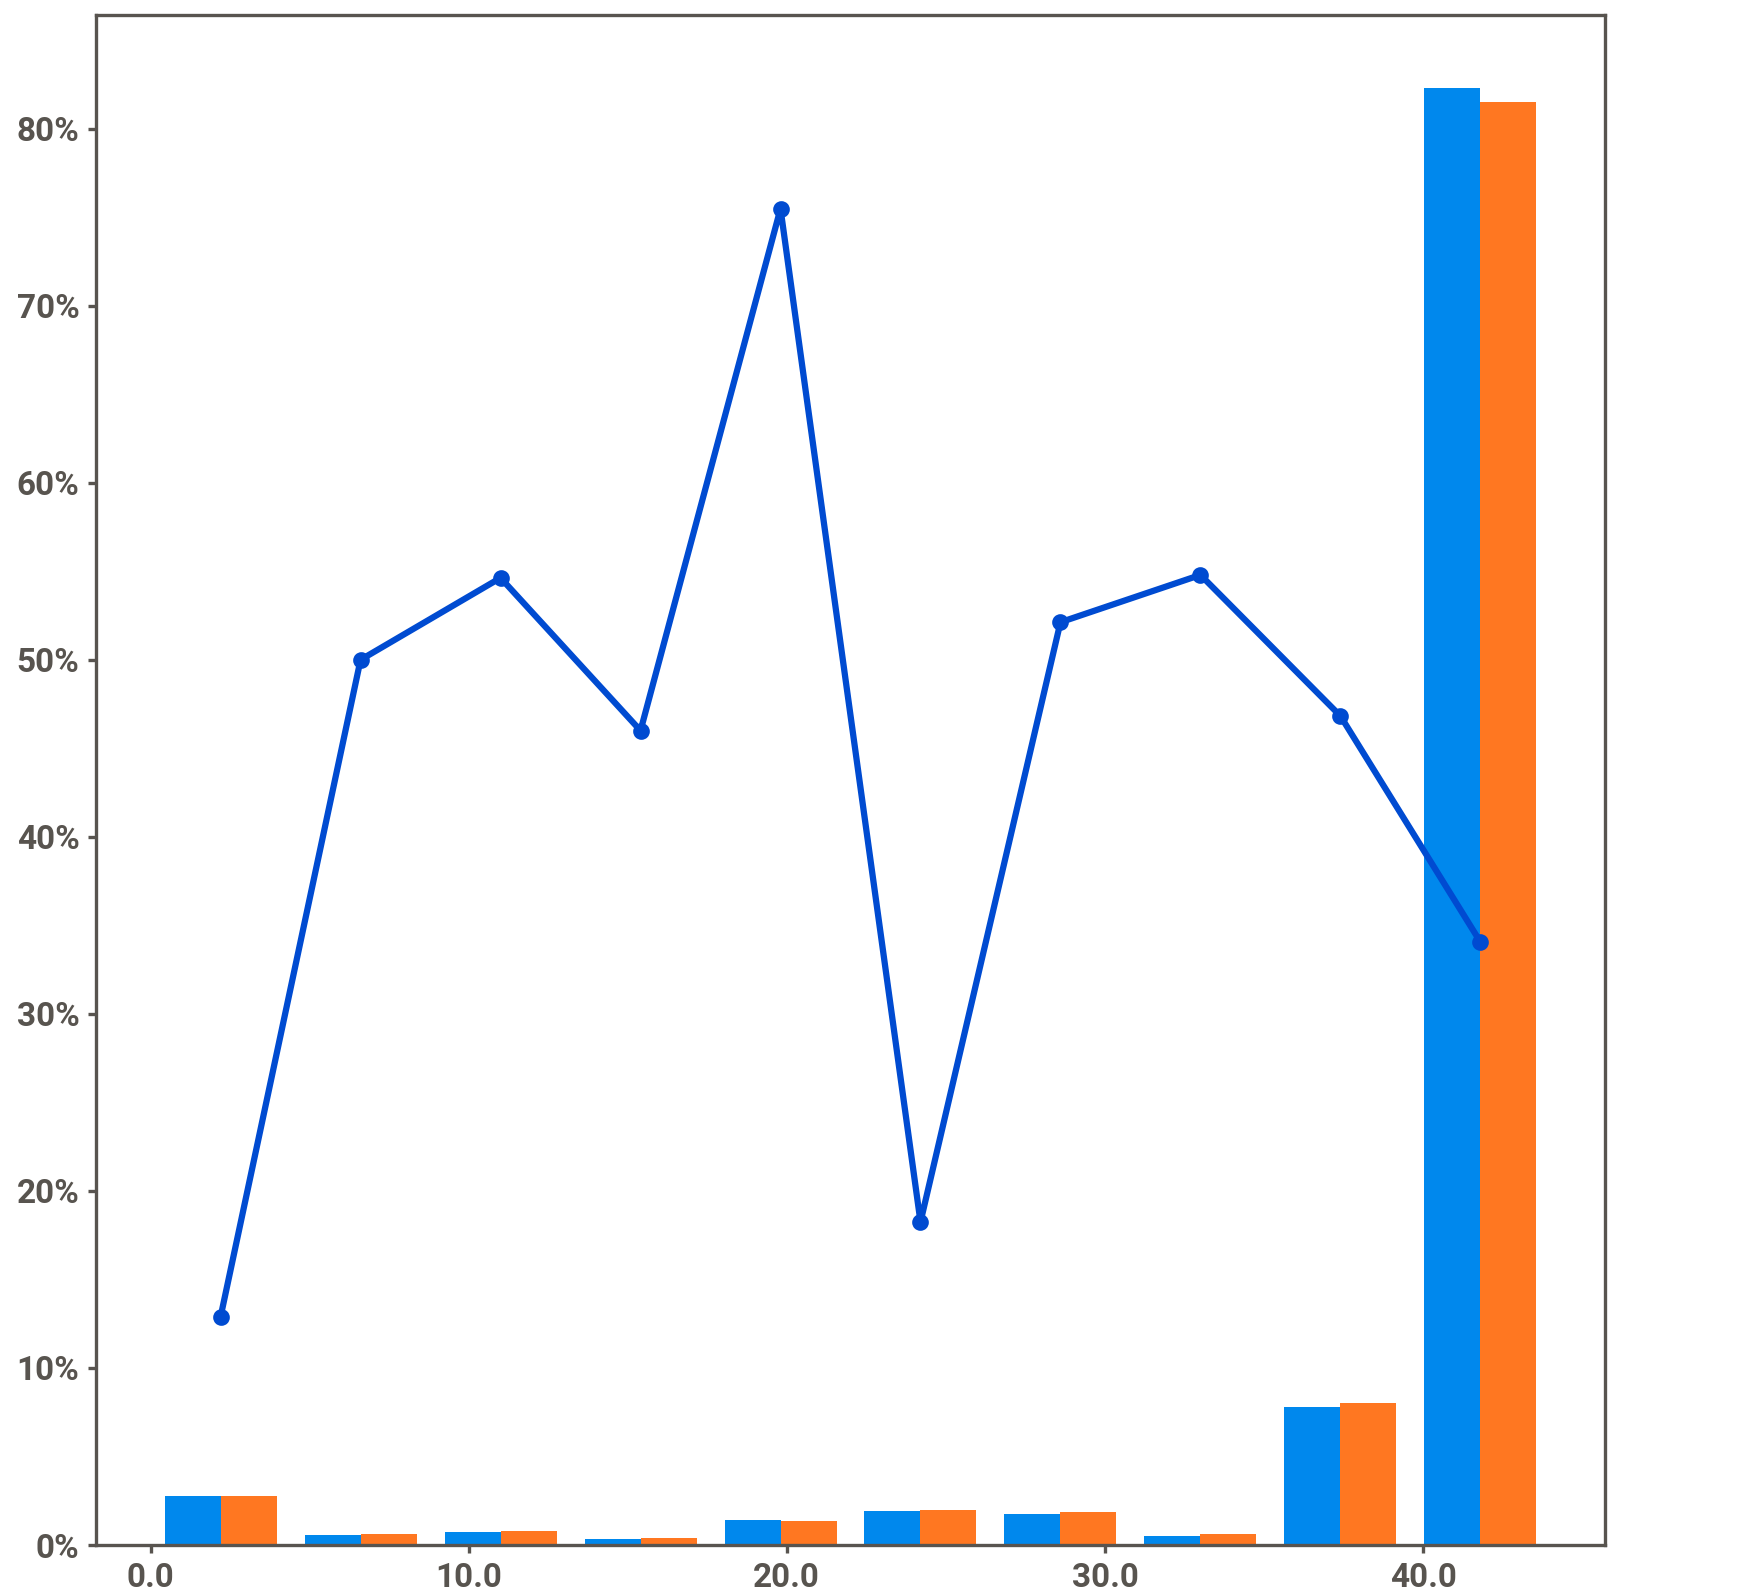
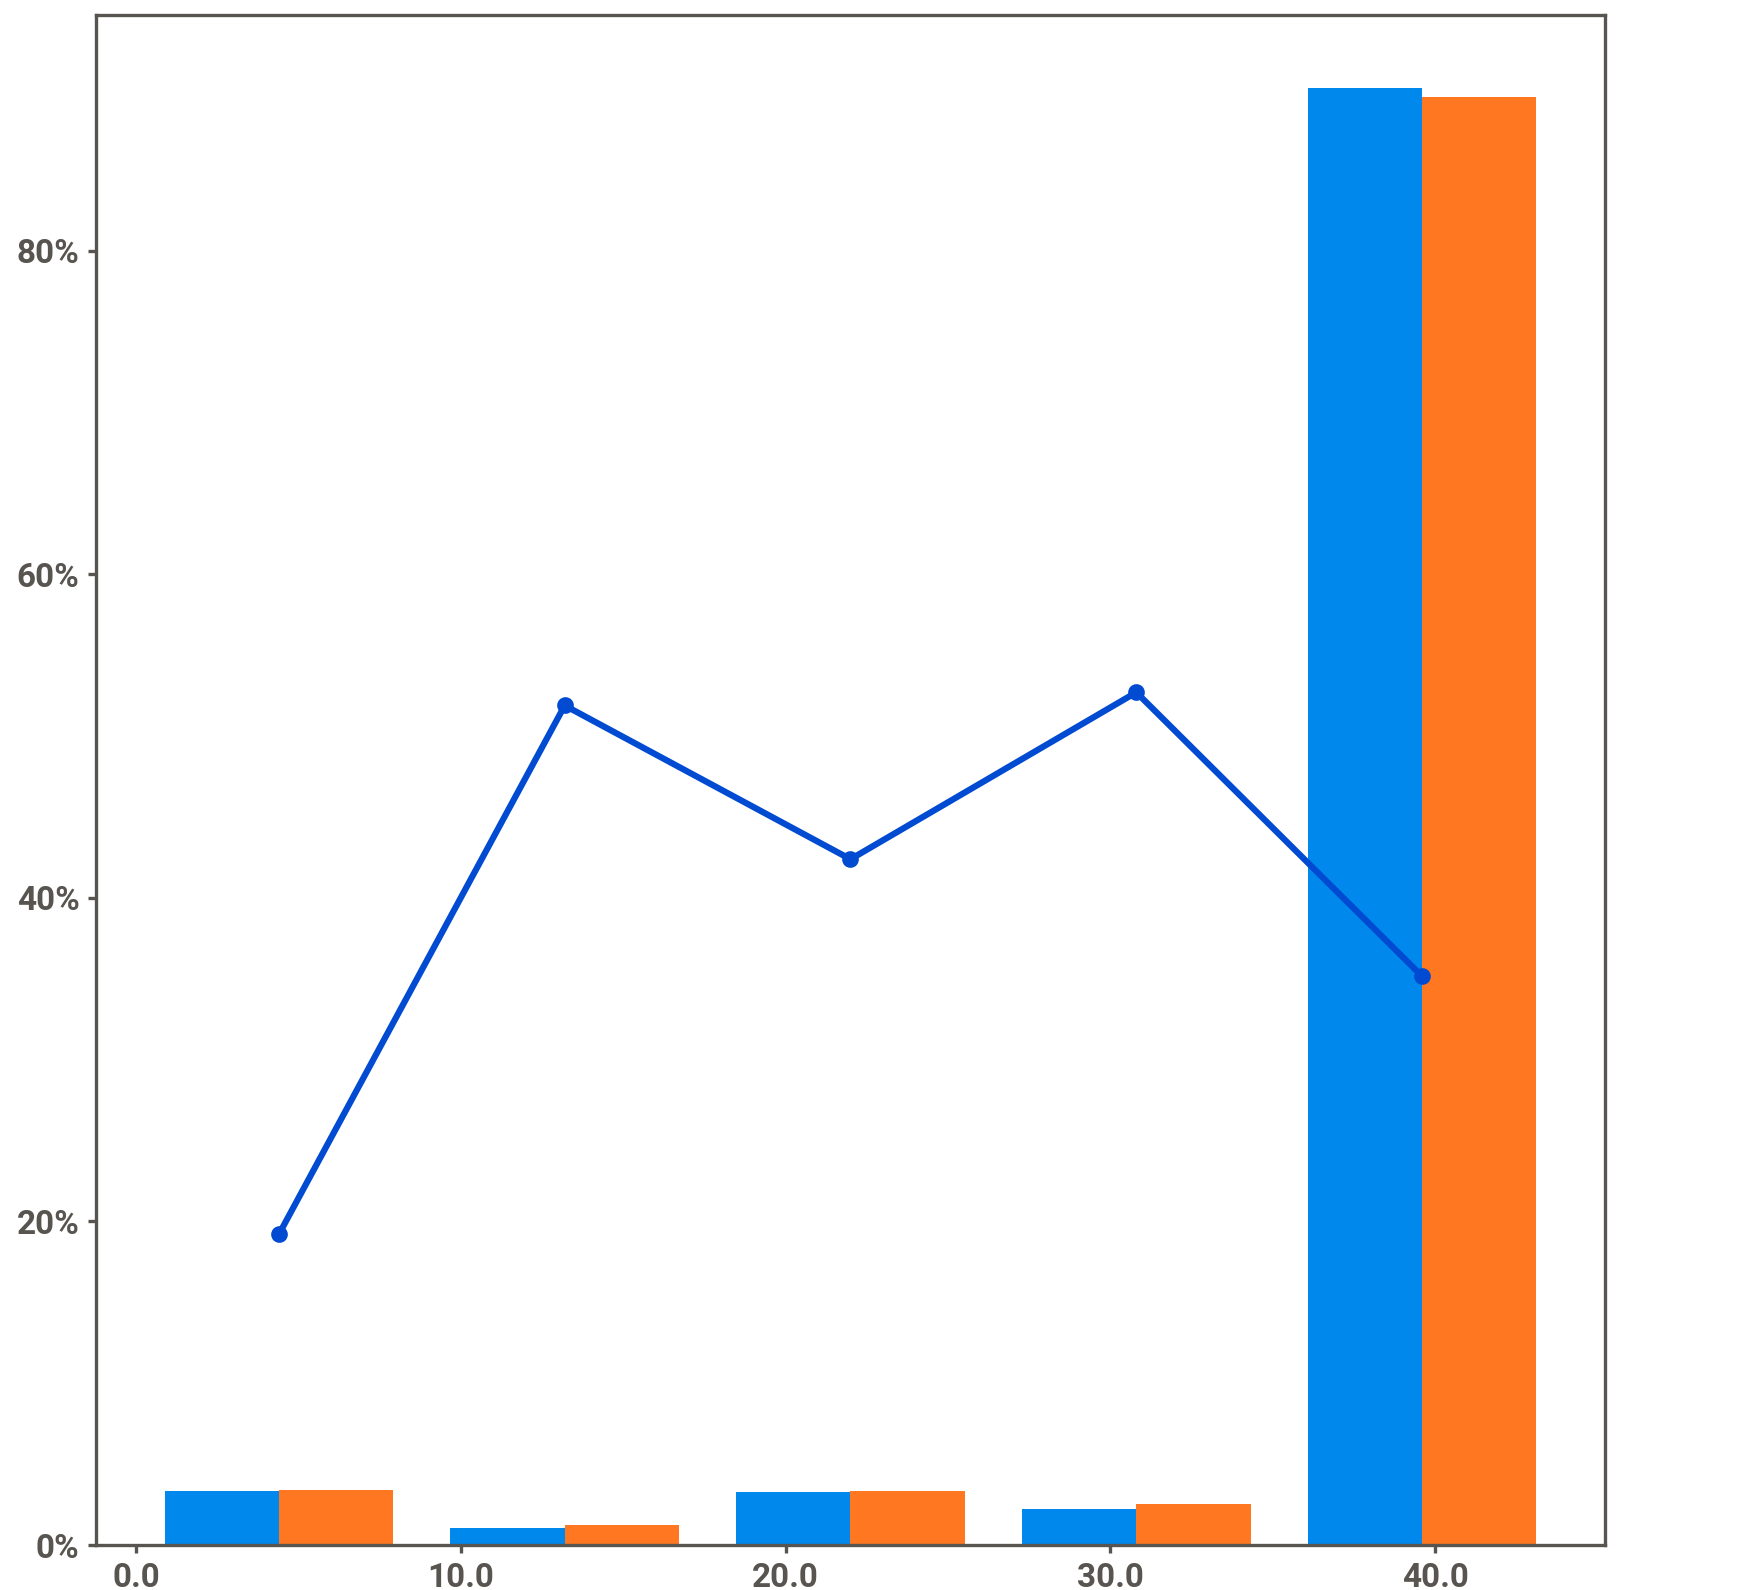
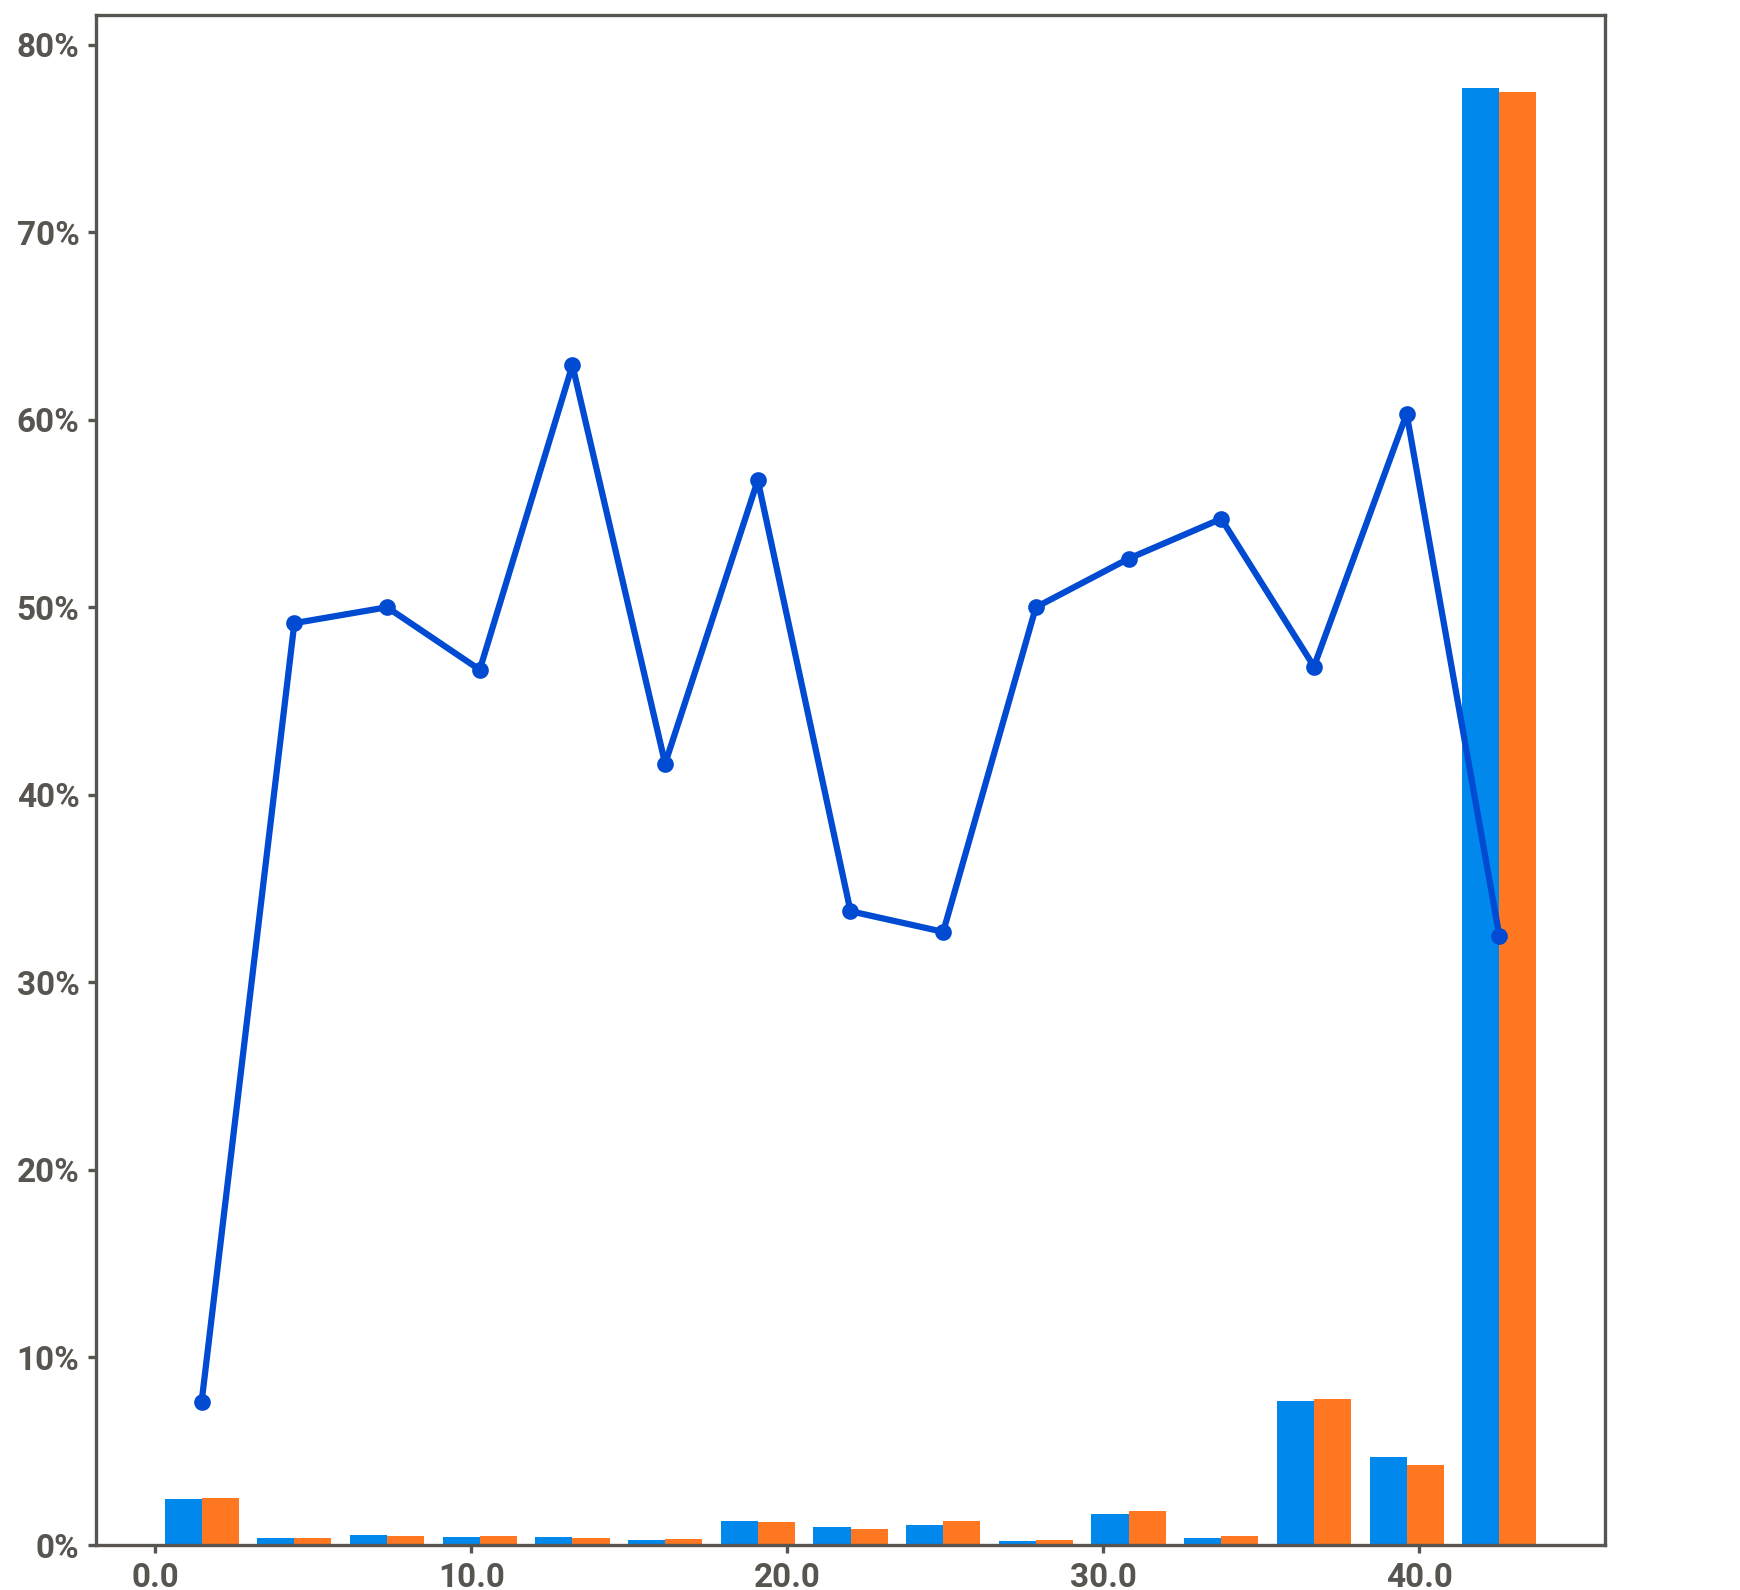
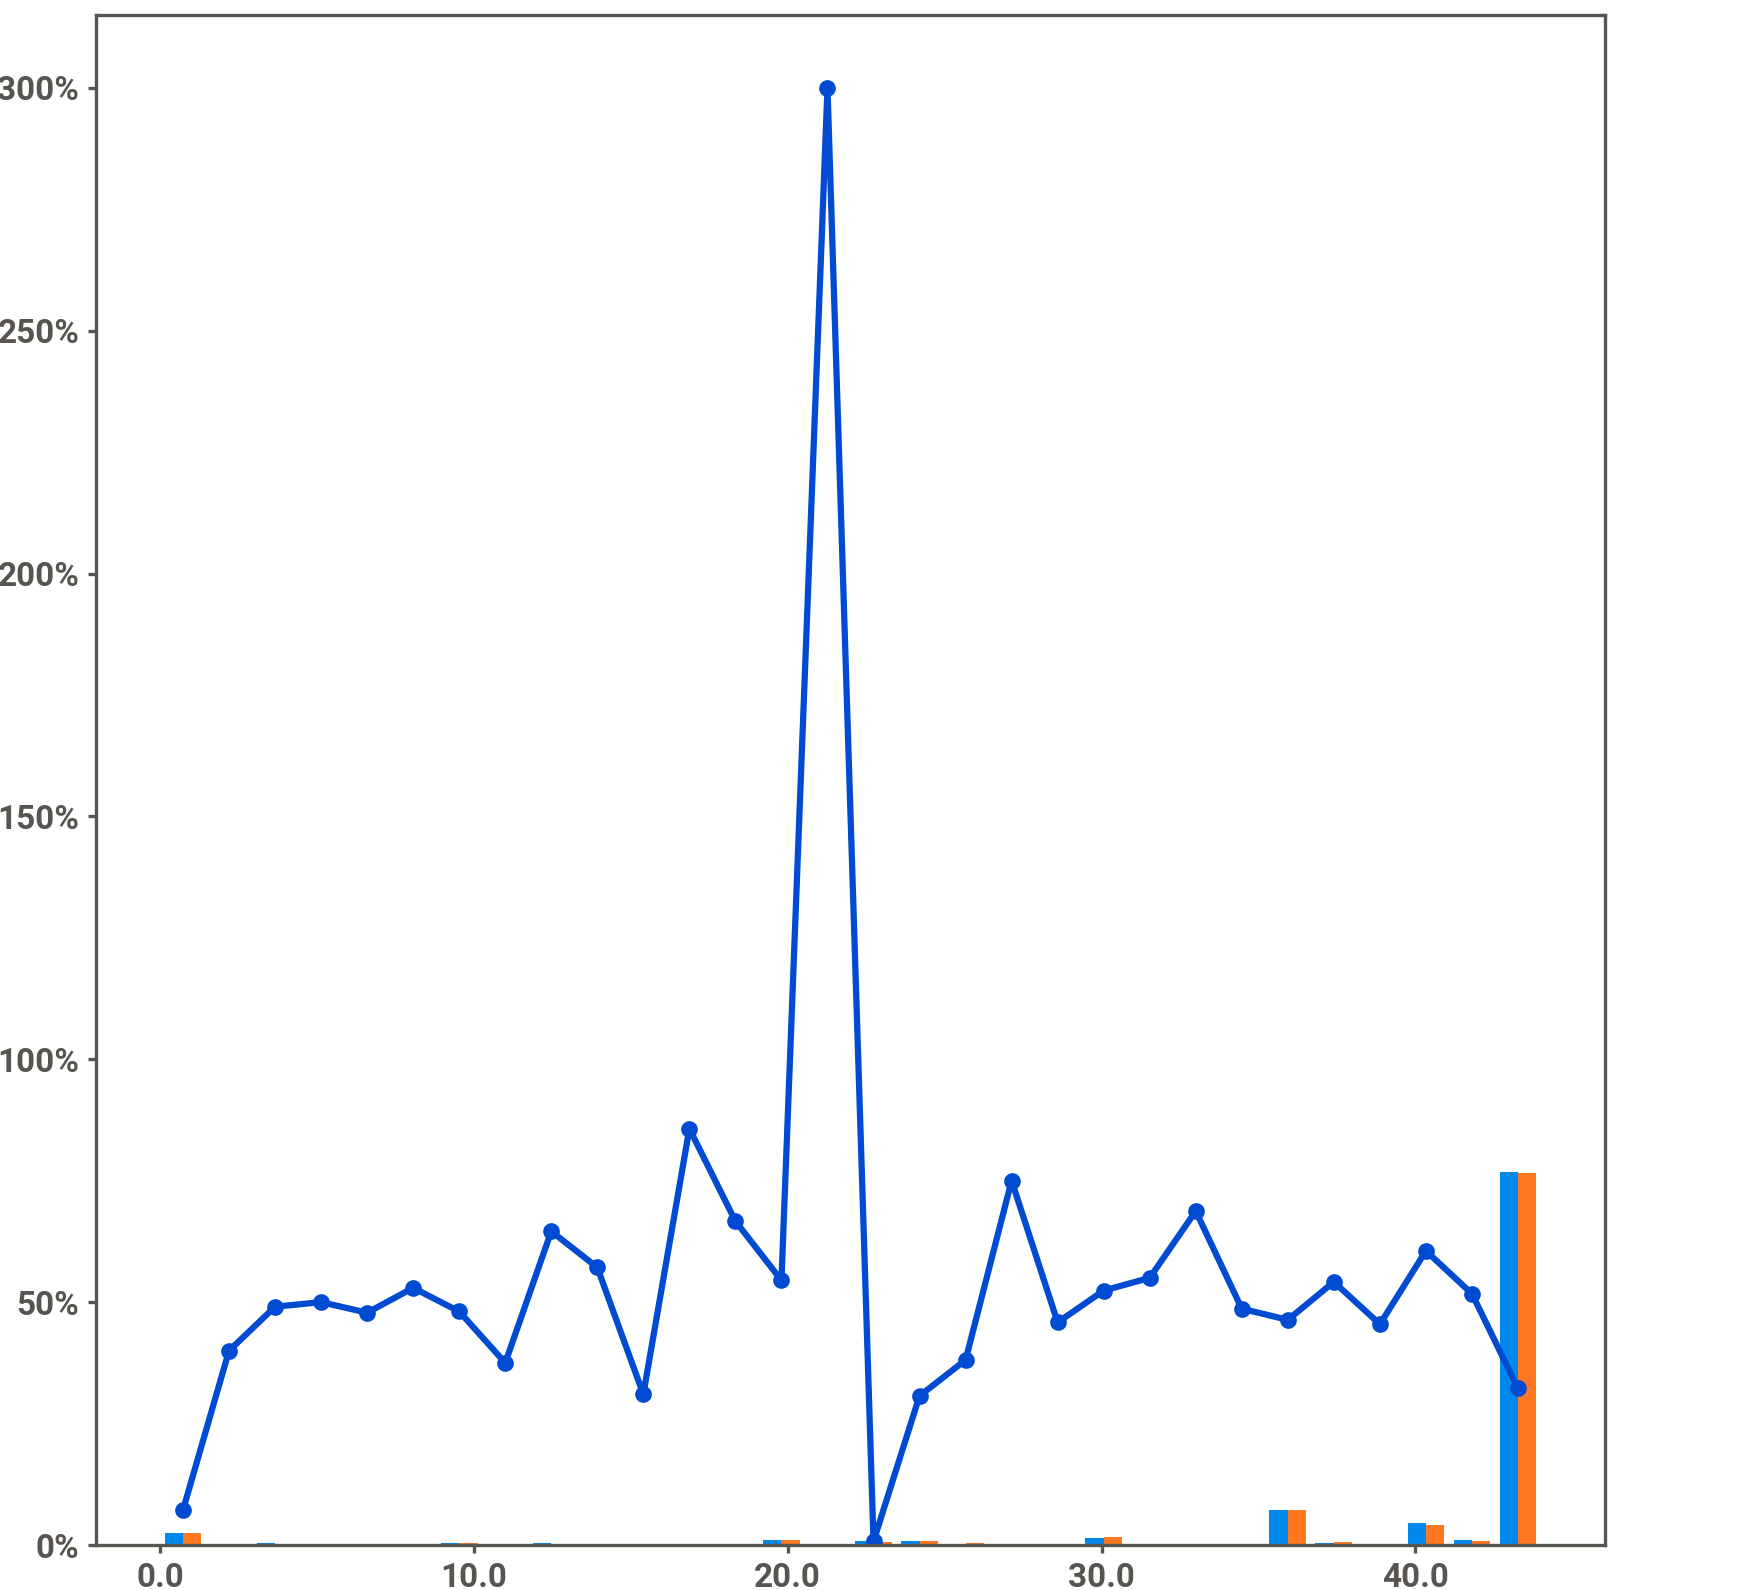
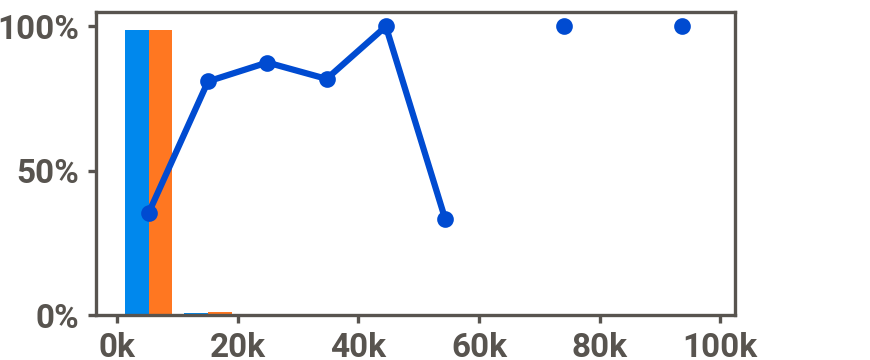
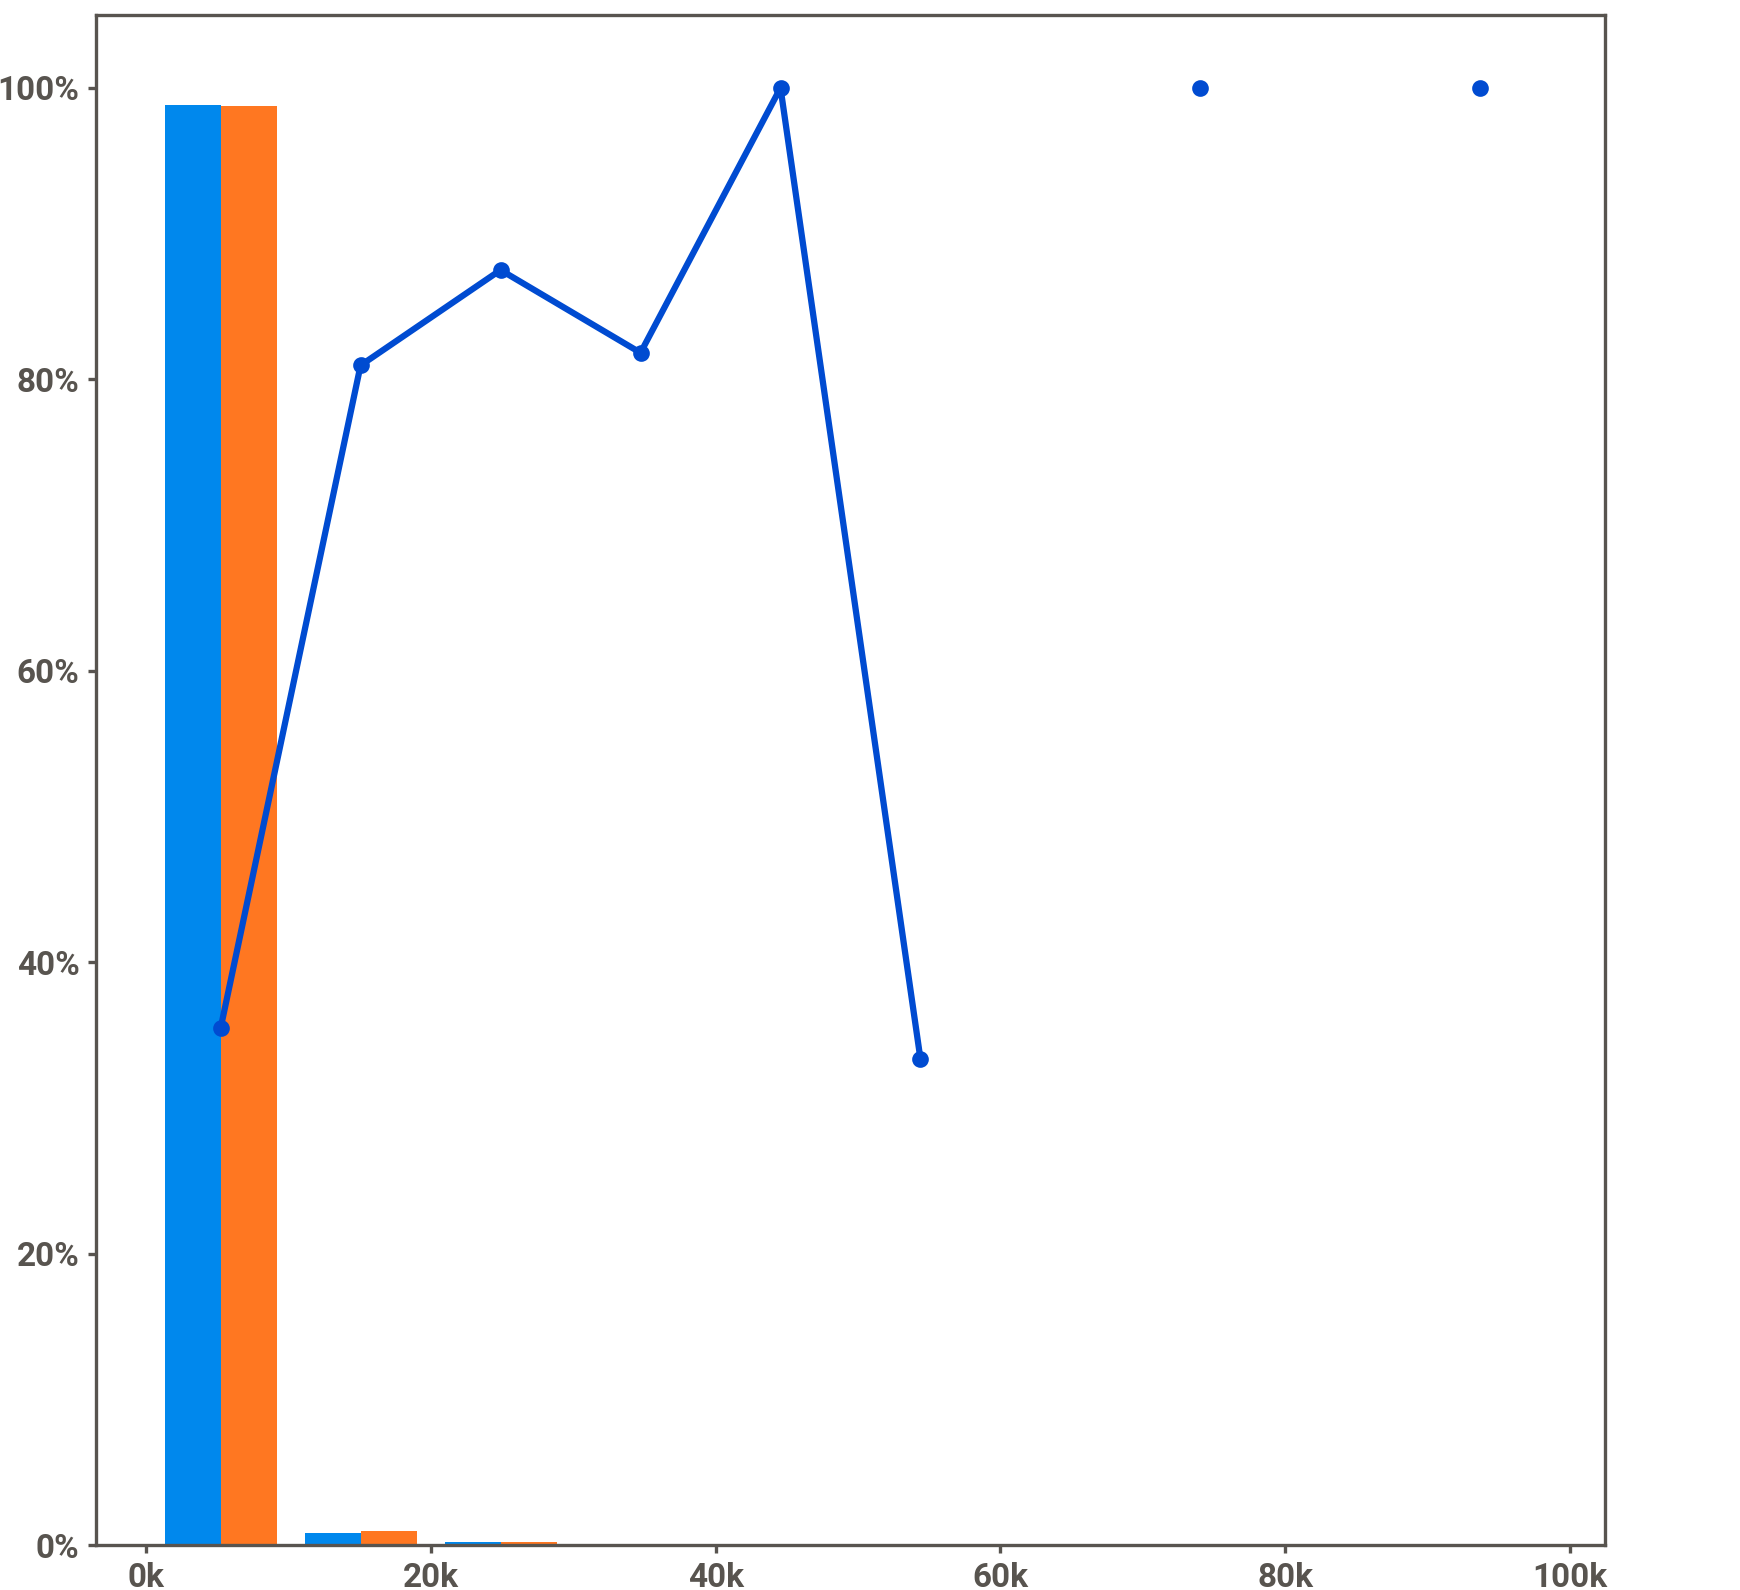
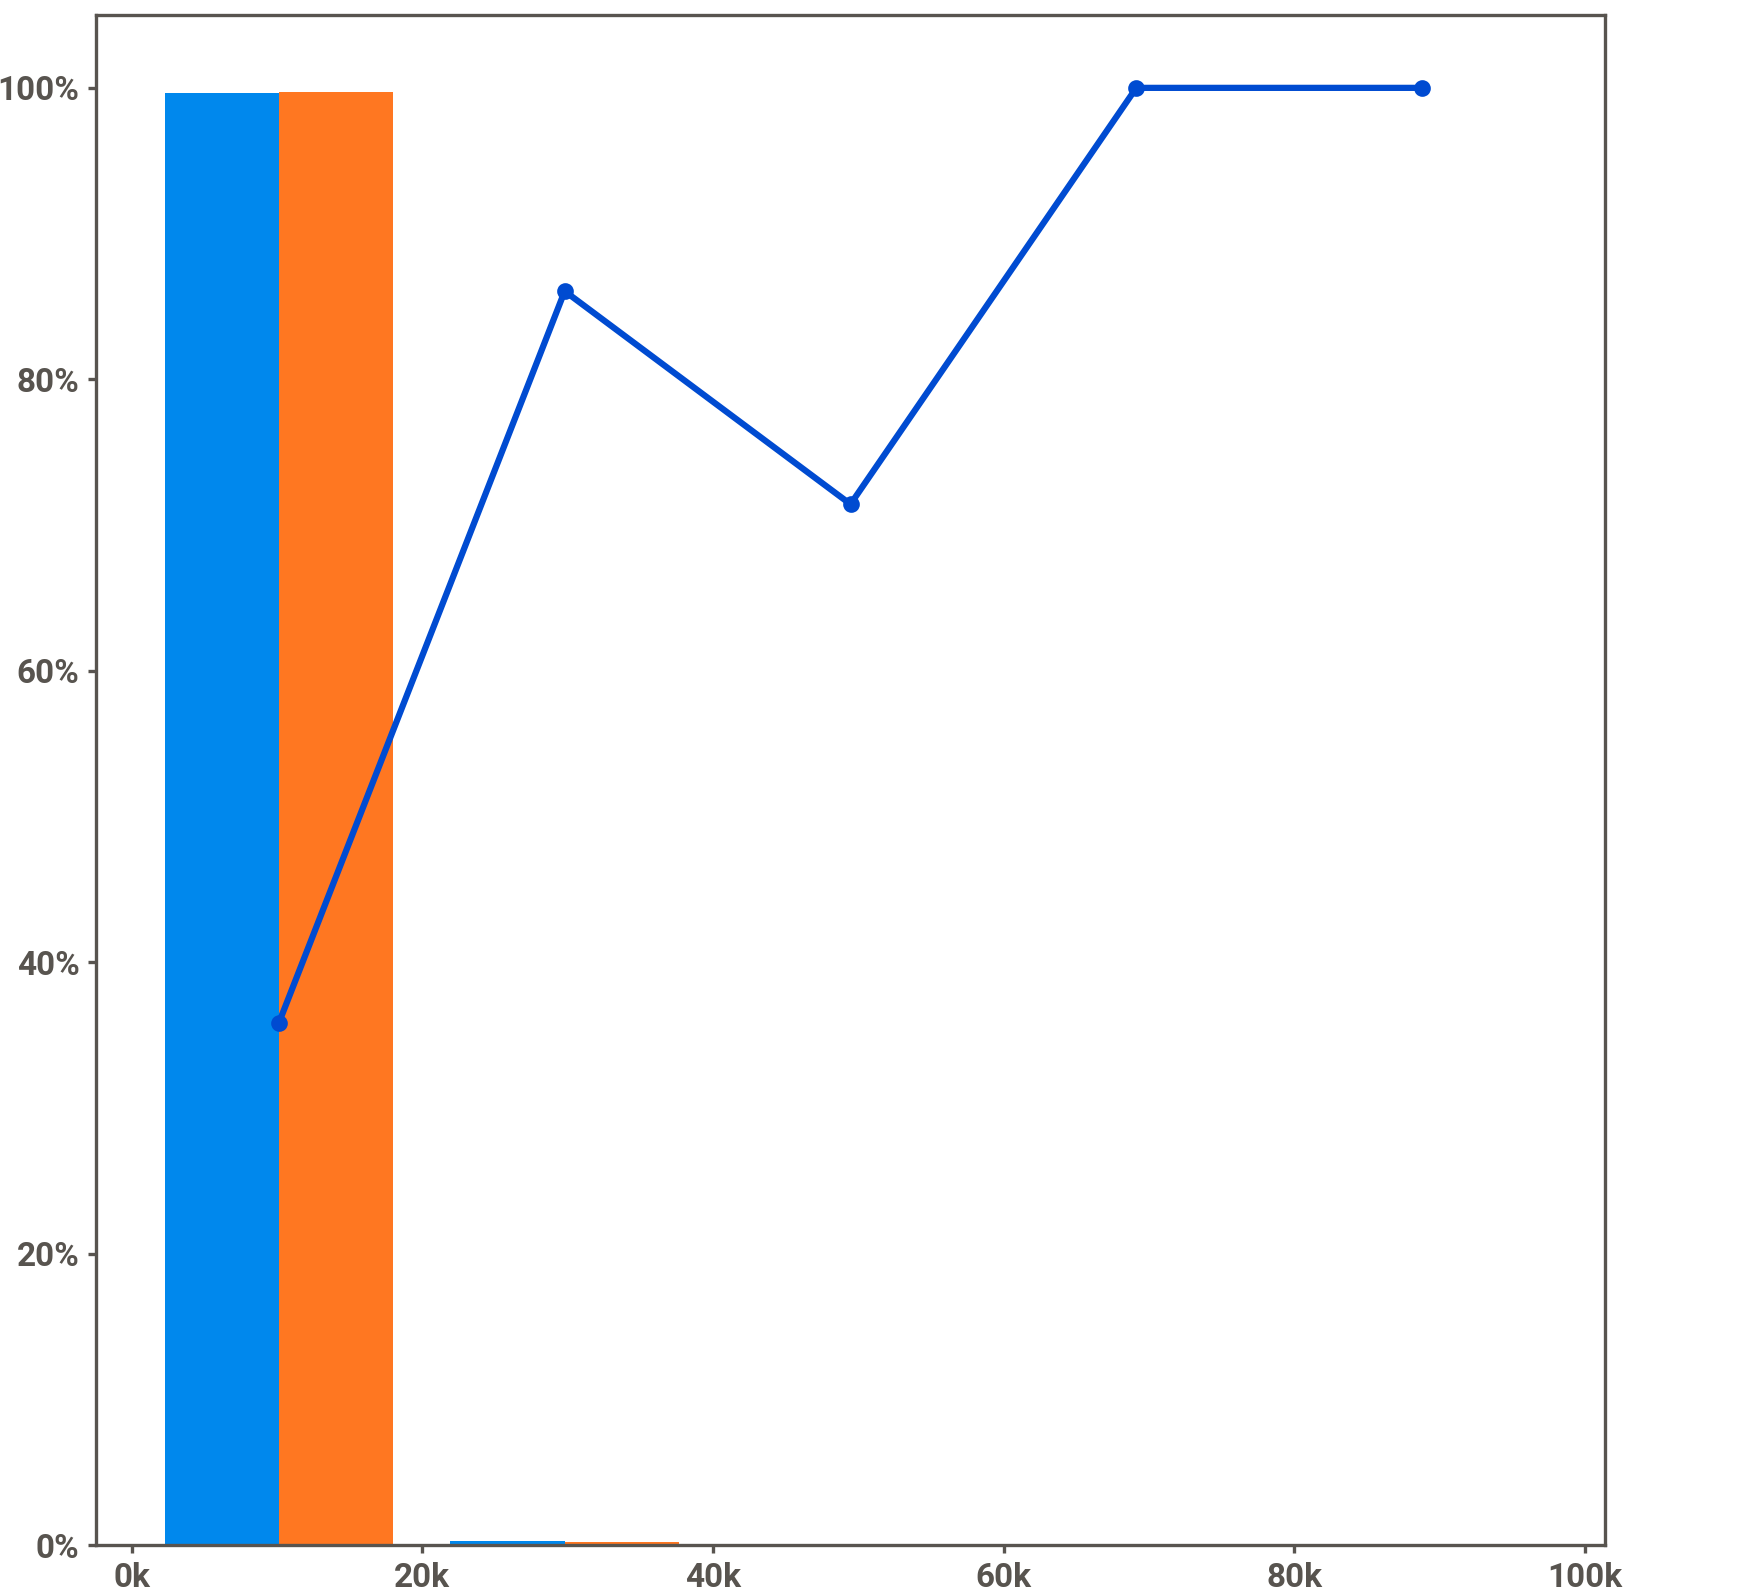
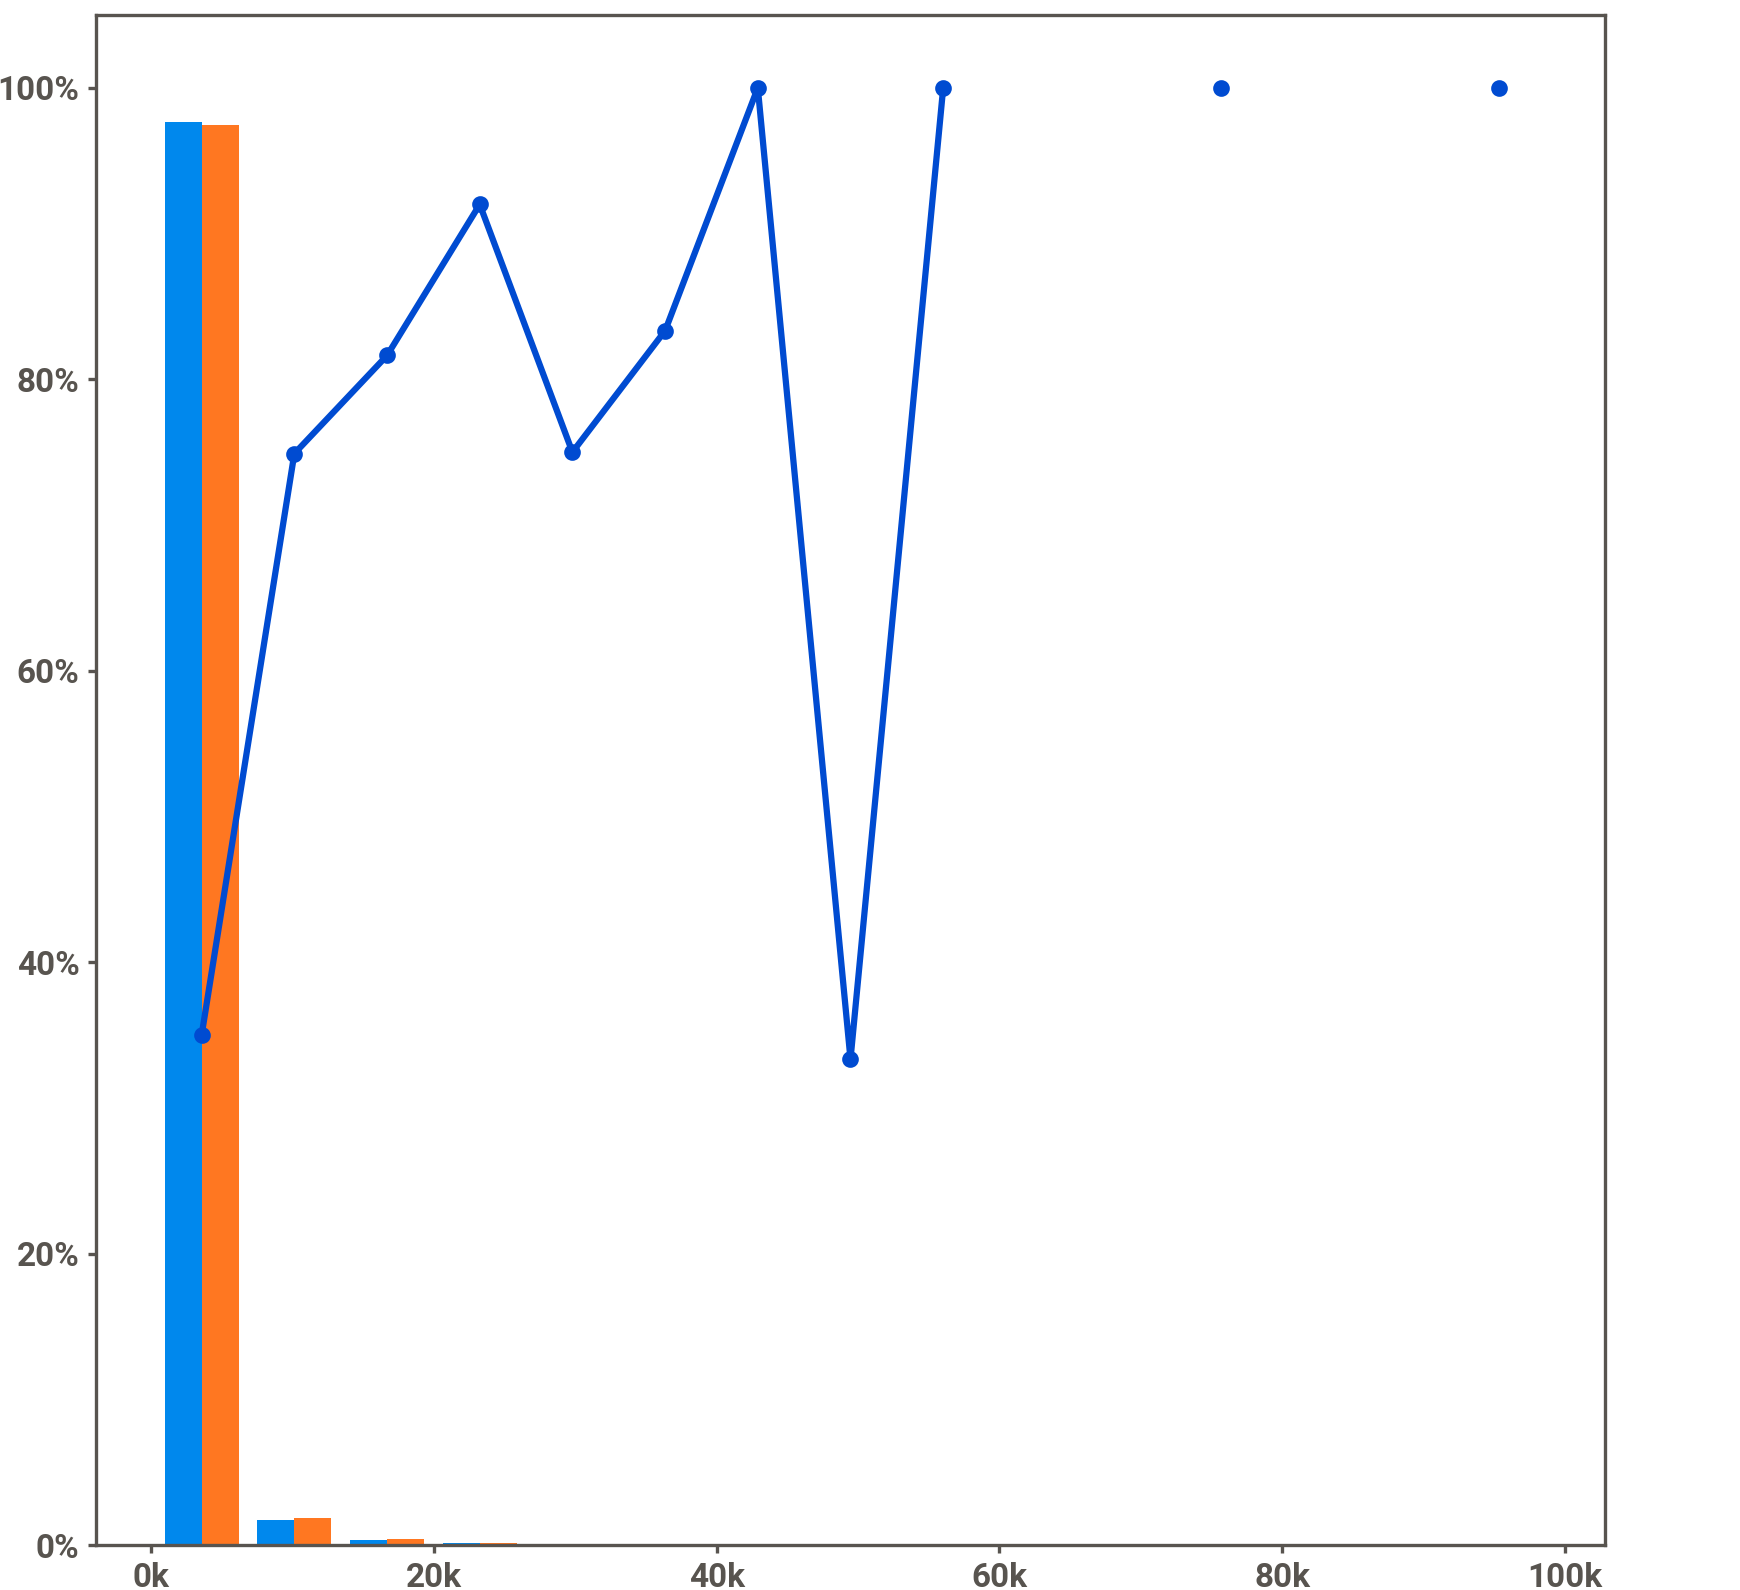
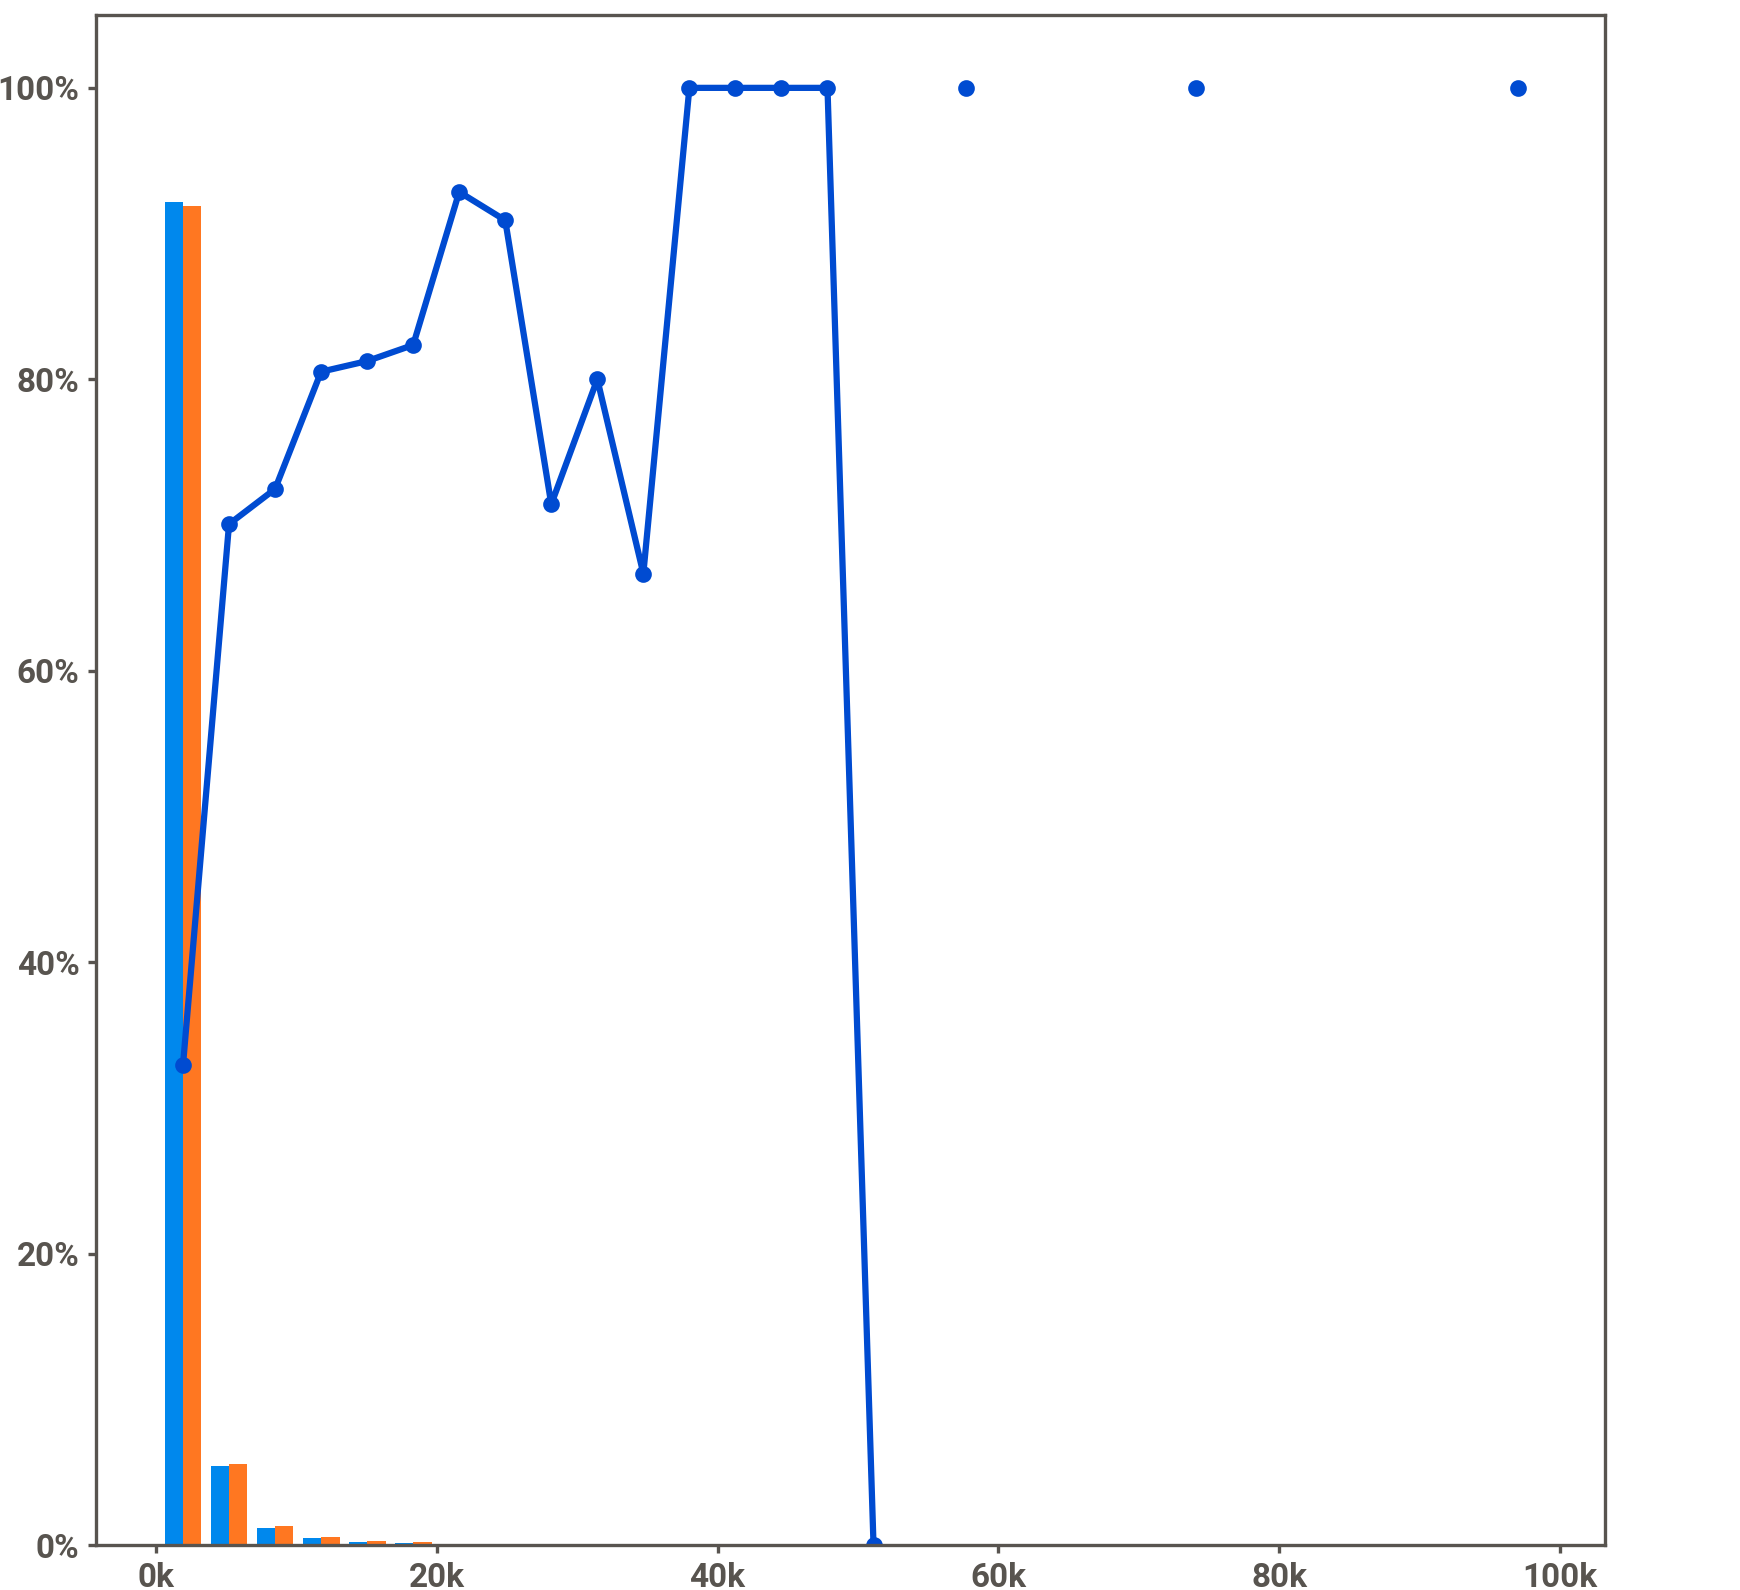
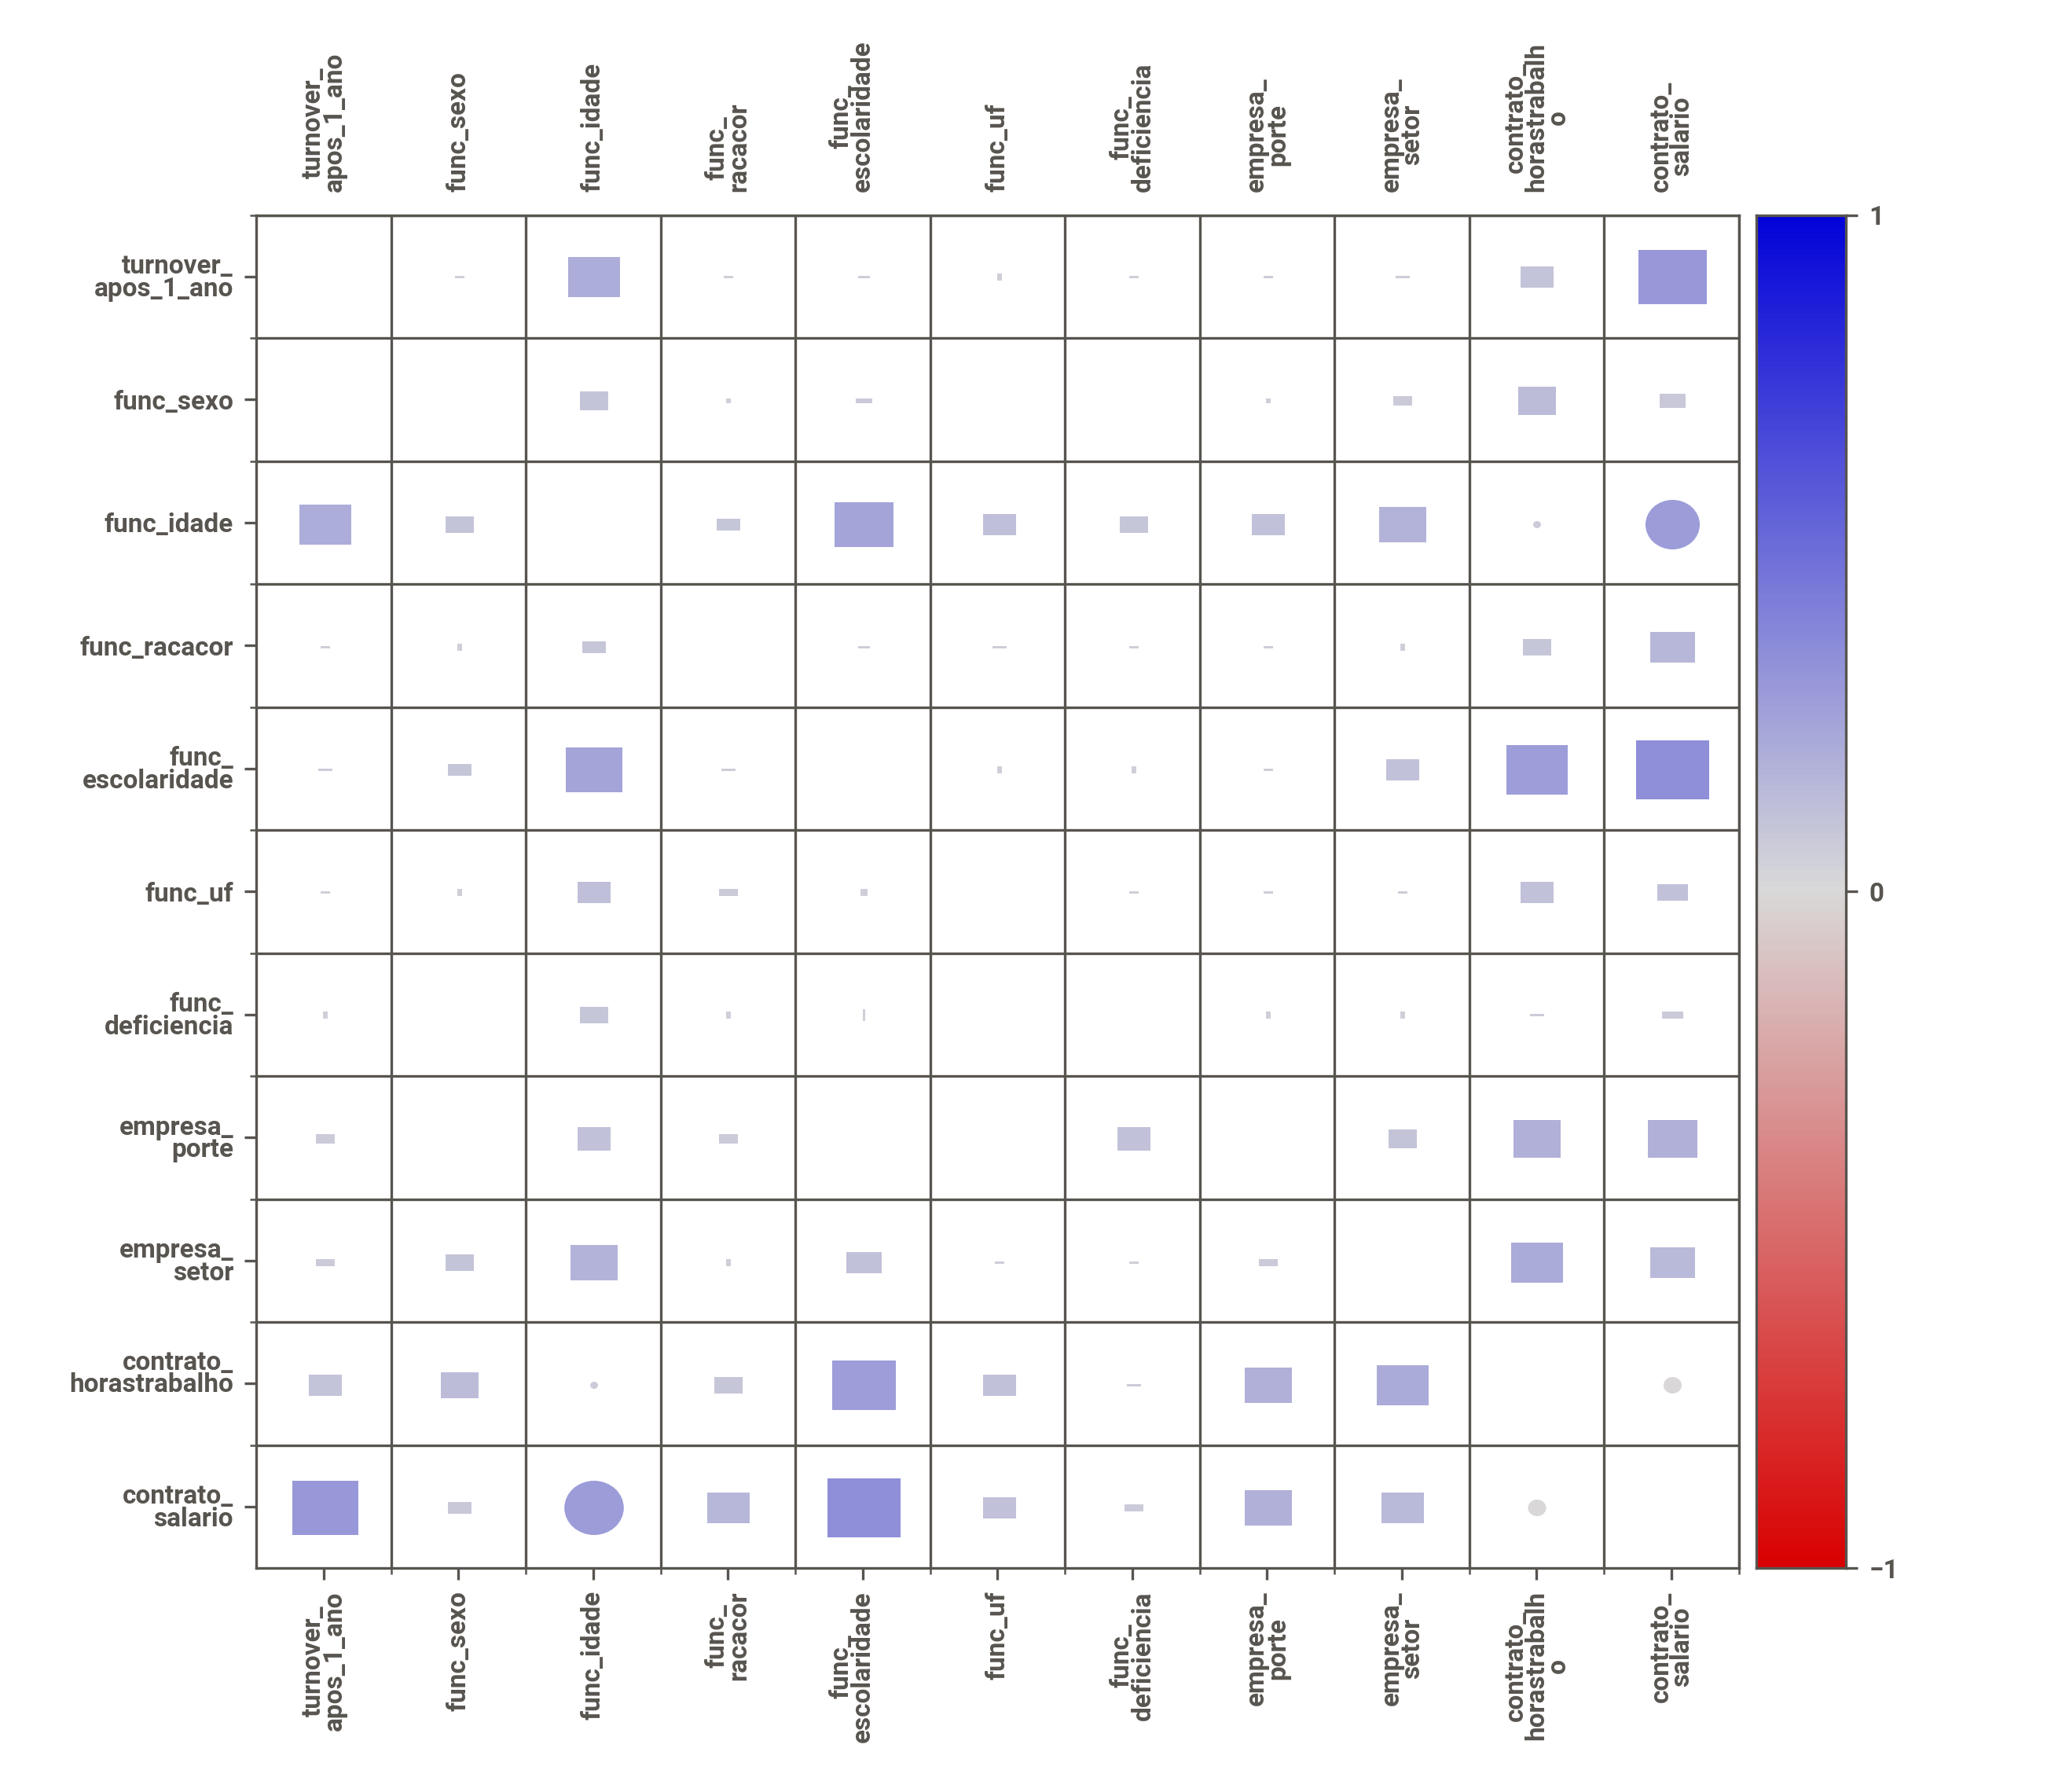
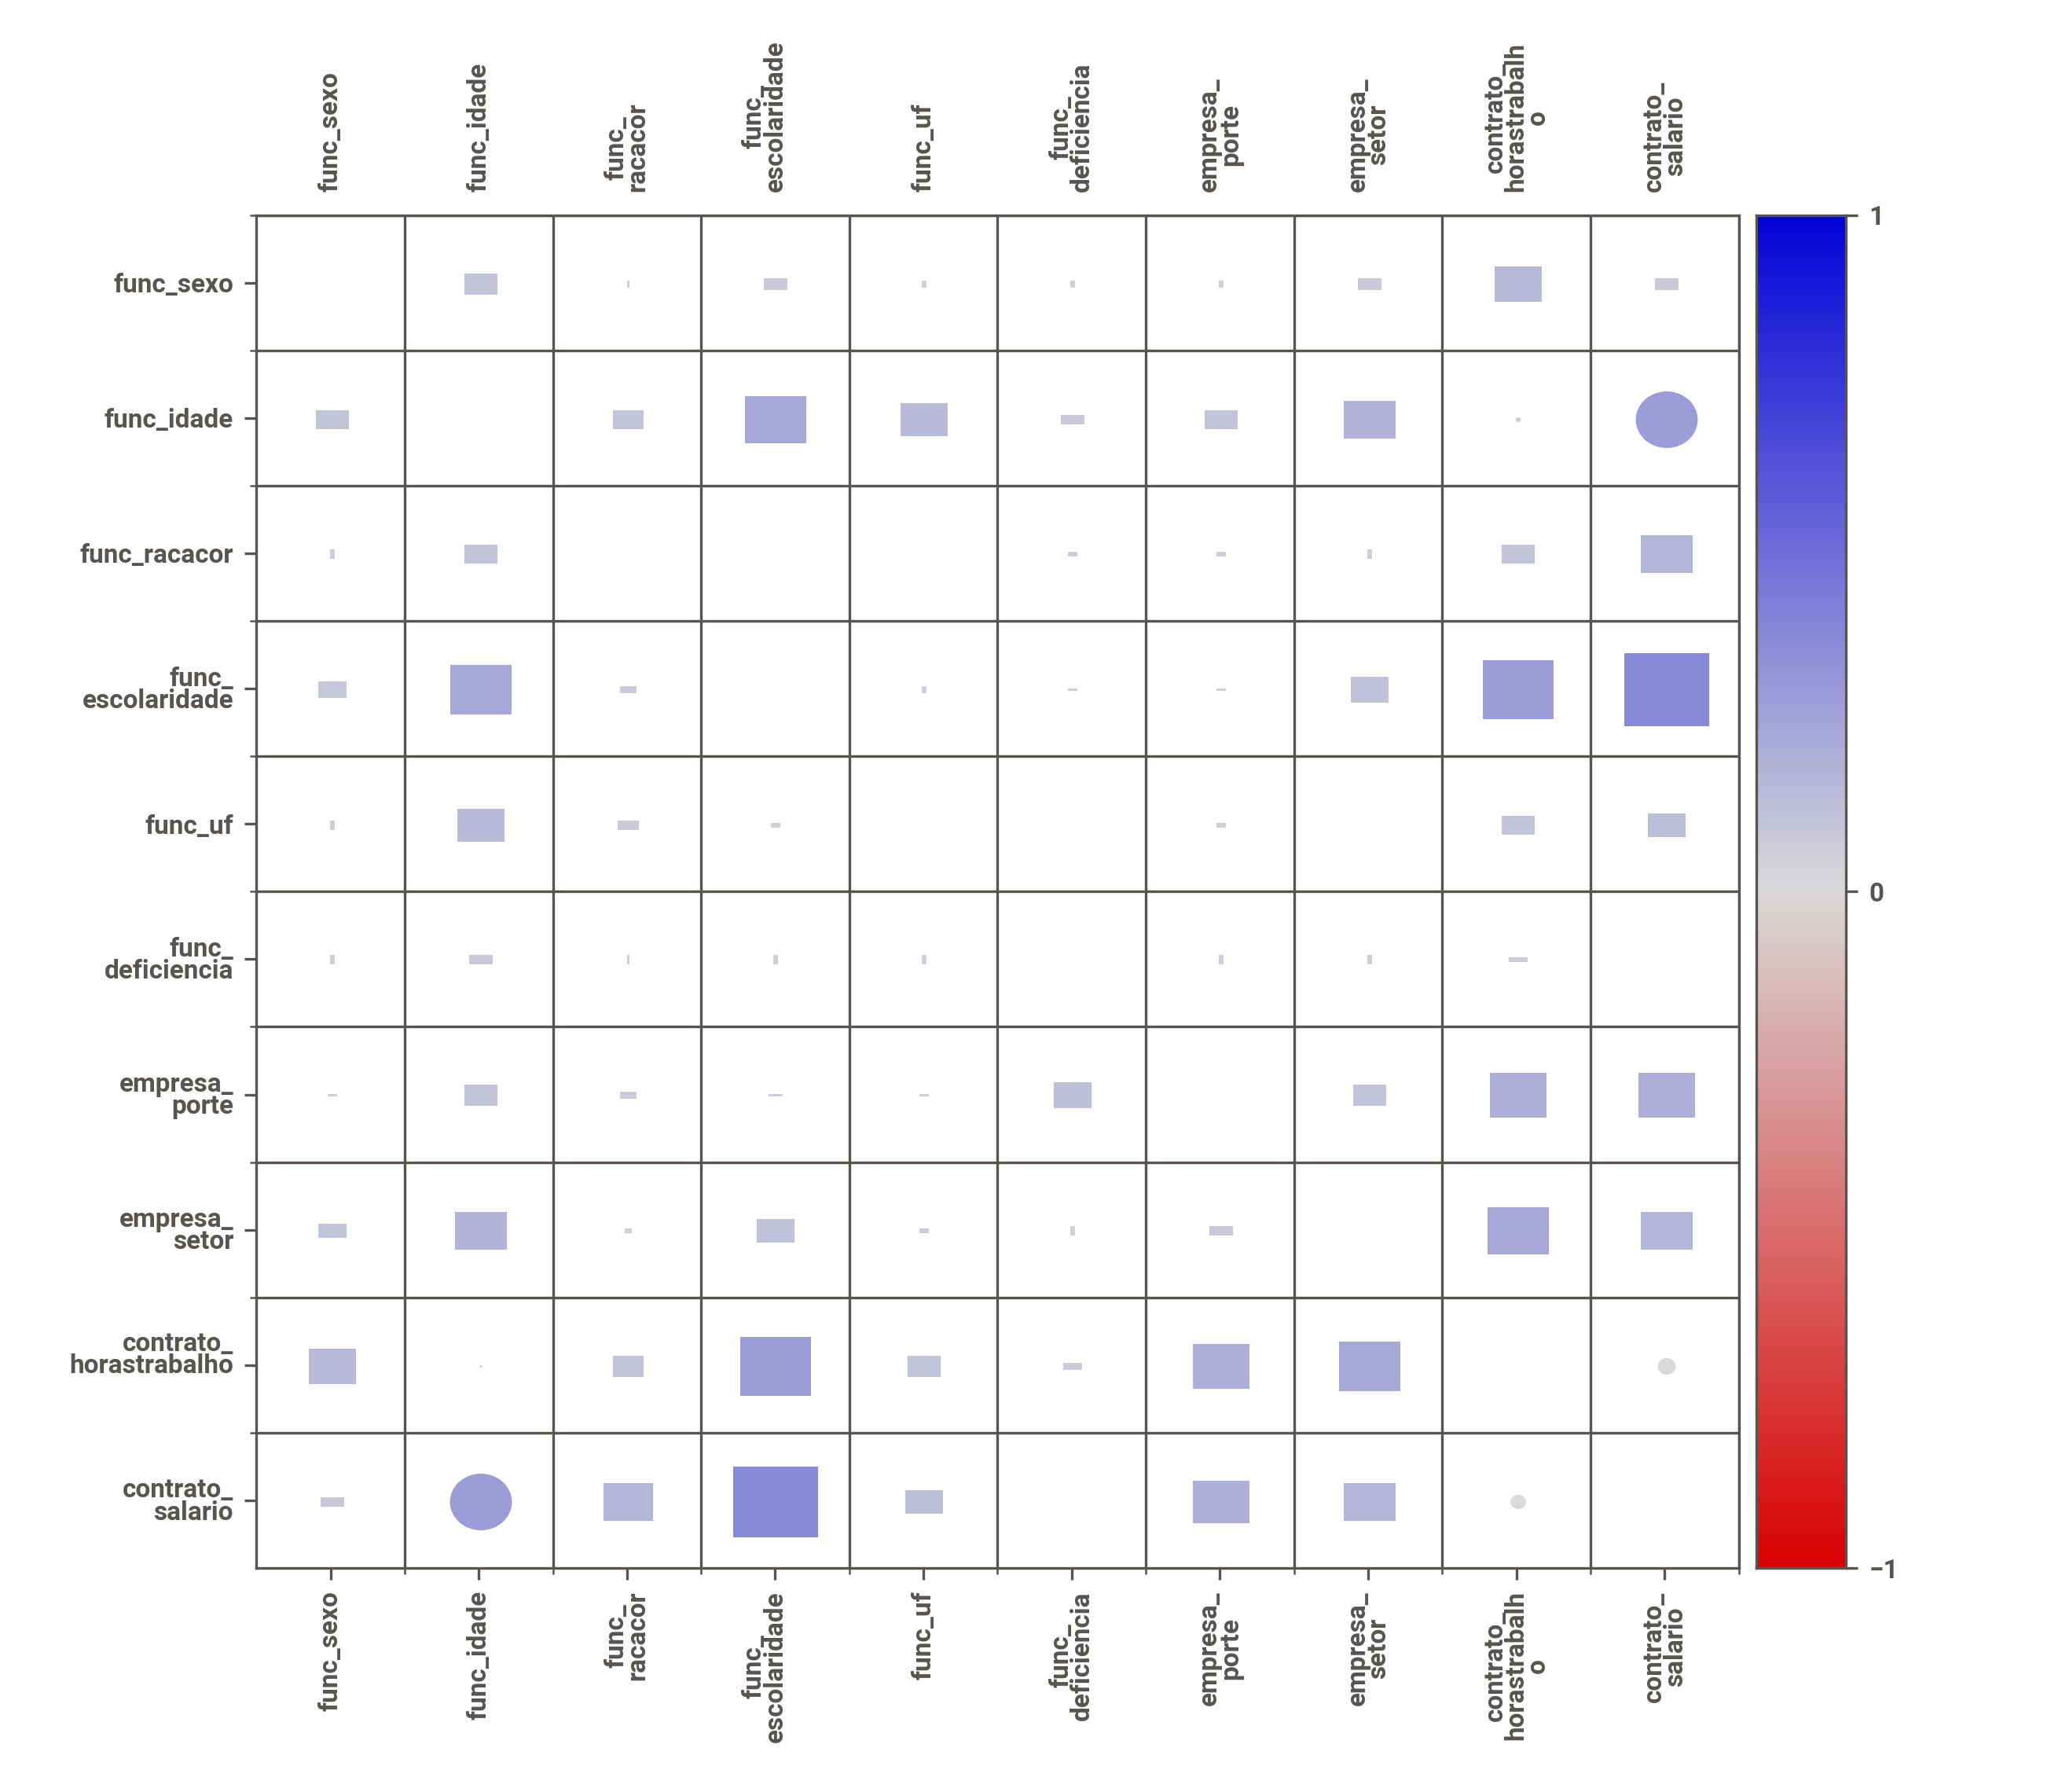
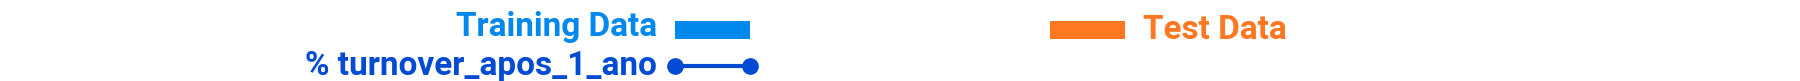

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
# Comparing the train e test datasets
import sweetviz as sv
df_train_sv = df_train.copy()
df_train_sv['turnover_apos_1_ano'] = df_train_sv['turnover_apos_1_ano'].map({'SIM': 1, 'NAO': 0})
my_report = sv.compare([df_train_sv, "Training Data"], [df_test, "Test Data"], "turnover_apos_1_ano")
my_report.show_notebook()

#### Transforming the categorical data into numerical integer values according to the turnover rate

In [4]:
dict_turnover = {'SIM': 1, 
                 'NAO': 0}

df_train['turnover_apos_1_ano'] = df_train['turnover_apos_1_ano'].map(dict_turnover)


In [5]:
dict_sexo = {'FEMININO': 1, 
                 'MASCULINO': 0}

df_train['func_sexo'] = df_train['func_sexo'].map(dict_sexo)
df_test['func_sexo'] = df_test['func_sexo'].map(dict_sexo)


In [6]:
dict_racacor = {'SEM INFO': 0, 
                'PRETA-PARDA': 1, 
                'AMARELA-BRANCA':2, 
                'INDIGENA':3}

df_train['func_racacor'] = df_train['func_racacor'].map(dict_racacor)
df_test['func_racacor'] = df_test['func_racacor'].map(dict_racacor)


In [7]:
dict_escolar = {'ANALFABETO-FUND_INCOMPLETO': 1, 
                'FUND_COMPLETO-MEDIO_INCOMPLETO': 2, 
                'MEDIO COMPLETO':3, 
                'SUPERIOR_INCOMPLETO':4,
                'SUPERIOR_COMPLETO':5}

df_train['func_escolaridade'] = df_train['func_escolaridade'].map(dict_escolar)
df_test['func_escolaridade'] = df_test['func_escolaridade'].map(dict_escolar)


In [8]:
df_train.contrato_salario = df_train.contrato_salario/1000
df_test.contrato_salario = df_test.contrato_salario/1000

In [9]:
states_latlong = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/estados.csv')
states_latlong = states_latlong.rename(columns = {'uf': 'func_uf'})
states_latlong = states_latlong[['func_uf', 'latitude', 'longitude']]
df_states = df_train.copy()
df_states = df_states.merge(states_latlong, on = 'func_uf')

In [10]:
dict_uf = {'MA': 1,
           'AL': 2,
           'PI': 3,
           'CE': 4,
           'BA': 5,
           'RN': 6,
           'SE': 7,
           'PB': 8,
           'PE': 9
          }
           
df_train['func_uf'] = df_train['func_uf'].map(dict_uf)
df_test['func_uf'] = df_test['func_uf'].map(dict_uf)


In [11]:
dict_deficiencia = {'SIM': 1, 
                    'NAO': 0}

df_train['func_deficiencia'] = df_train['func_deficiencia'].map(dict_deficiencia)
df_test['func_deficiencia'] = df_test['func_deficiencia'].map(dict_deficiencia)


In [12]:
dict_porte = {'ATE 4': 1,
              'DE 5 A 9': 2,
              'DE 10 A 19': 3,
              'DE 20 A 49': 4,                   
              'DE 50 A 99': 5,
              'DE 100 A 249': 6,
              'DE 250 A 499': 7,
              'DE 500 A 999': 8,
              '1000 OU MAIS': 9
             }

df_train['empresa_porte'] = df_train['empresa_porte'].map(dict_porte)
df_test['empresa_porte'] = df_test['empresa_porte'].map(dict_porte)


In [13]:
dict_setor = {'Agricultura': 1,
              'Construçao civil': 2,
              'Comércio': 3,
              'Indústria': 4,
              'Serviços': 5,
              'Administraçao pública': 6
             }

df_train['empresa_setor'] = df_train['empresa_setor'].map(dict_setor)
df_test['empresa_setor'] = df_test['empresa_setor'].map(dict_setor)


In [14]:
# function to reverse the dict: turn keys to values and values to keys 
def reverse_dict(dic):
    reverse_dic = dict()
    for key in dic:
        val = dic[key]
        reverse_dic[val] = key
    return reverse_dic

# another way to do it:
# inverse_dict = {v: k for k, v in dic.items()}


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   func_sexo               15000 non-null  int64  
 1   func_idade              15000 non-null  int64  
 2   func_racacor            15000 non-null  int64  
 3   func_escolaridade       15000 non-null  int64  
 4   func_uf                 15000 non-null  int64  
 5   func_deficiencia        15000 non-null  int64  
 6   empresa_porte           15000 non-null  int64  
 7   empresa_setor           15000 non-null  int64  
 8   contrato_horastrabalho  15000 non-null  int64  
 9   contrato_salario        15000 non-null  float64
 10  turnover_apos_1_ano     15000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


In [27]:
df_train.describe()

func_sexo    func_idade  func_racacor  func_escolaridade  \
count  15000.000000  15000.000000  15000.000000       15000.000000   
mean       0.405000     32.530133      1.007933           3.170867   
std        0.490908      9.719180      0.599245           1.050212   
min        0.000000     16.000000      0.000000           1.000000   
25%        0.000000     25.000000      1.000000           3.000000   
50%        0.000000     31.000000      1.000000           3.000000   
75%        1.000000     38.000000      1.000000           3.000000   
max        1.000000     82.000000      3.000000           5.000000   

            func_uf  func_deficiencia  empresa_porte  empresa_setor  \
count  15000.000000      15000.000000   15000.000000   15000.000000   
mean       5.353000          0.017600       4.619800       4.027000   
std        2.379349          0.131497       2.528466       1.194027   
min        1.000000          0.000000       1.000000       1.000000   
25%        4.000000          0.000000       3.000000       3.000000   
50%        5.000000          0.000000       4.000000       5.000000   
75%        7.000000          0.000000       6.000000       5.000000   
max        9.000000          1.000000       9.000000       6.000000   

       contrato_horastrabalho  contrato_salario  turnover_apos_1_ano  
count            15000.000000      15000.000000         15000.000000  
mean                40.403733          1.953761             0.360067  
std                  9.156334          2.528050             0.480035  
min                  0.000000          0.299400             0.000000  
25%                 44.000000          1.079228             0.000000  
50%                 44.000000          1.433055             0.000000  
75%                 44.000000          1.932750             1.000000  
max                 44.000000         98.641650             1.000000

## Checking for duplicates

In [339]:
df_analisando = df_train.copy()
df_analisando.drop_duplicates(keep=False, inplace=True, subset = ['func_sexo', 'func_idade', 'func_racacor', 
                                                                  'func_escolaridade','func_uf', 'func_deficiencia', 
                                                                  'empresa_porte', 'empresa_setor','contrato_horastrabalho', 
                                                                  'contrato_salario', 'turnover_apos_1_ano'])
df_analisando
# There is no duplicated line in the train dataset

func_sexo  func_idade  func_racacor  func_escolaridade  func_uf  \
0              0          24             2                  3        6   
1              0          24             0                  3        5   
2              1          25             1                  3        7   
3              0          54             1                  3        9   
4              0          40             1                  3        5   
...          ...         ...           ...                ...      ...   
14995          0          23             1                  2        9   
14996          0          31             1                  2        4   
14997          0          24             1                  3        4   
14998          1          40             1                  3        5   
14999          1          25             0                  3        9   

       func_deficiencia  empresa_porte  empresa_setor  contrato_horastrabalho  \
0                     0              3              5                      44   
1                     0              1              3                      44   
2                     0              4              3                      44   
3                     0              4              3                      44   
4                     0              4              3                       0   
...                 ...            ...            ...                     ...   
14995                 0              5              1                      44   
14996                 0              5              4                      44   
14997                 0              4              4                      44   
14998                 0              9              5                      30   
14999                 0              6              5                      36   

       contrato_salario  turnover_apos_1_ano  
0               1.75065                    1  
1               1.00230                    0  
2               1.37014                    0  
3               1.85468                    1  
4               1.12623                    0  
...                 ...                  ...  
14995           0.92388                    0  
14996           1.68999                    0  
14997           1.02998                    0  
14998           1.92333                    1  
14999           1.00380                    0  

[15000 rows x 11 columns]

In [341]:
df_analisando.sort_values(by = ['func_sexo', 'func_idade', 'func_racacor', 'func_escolaridade','func_uf', 'func_deficiencia', 
                                                                  'empresa_porte', 'empresa_setor','contrato_horastrabalho', 
                                                                  'contrato_salario', 'turnover_apos_1_ano']).head(50)

func_sexo  func_idade  func_racacor  func_escolaridade  func_uf  \
10338          0          16             1                  2        5   
14148          0          17             0                  2        5   
14839          0          17             0                  3        7   
12233          0          17             0                  3        8   
5289           0          17             1                  1        5   
7722           0          18             0                  2        5   
9077           0          18             0                  2        5   
10012          0          18             0                  3        5   
11775          0          18             0                  3        5   
12956          0          18             0                  3        9   
13048          0          18             0                  4        9   
703            0          18             1                  1        3   
14592          0          18             1                  1        5   
8872           0          18             1                  1        6   
8579           0          18             1                  2        2   
4327           0          18             1                  2        3   
7519           0          18             1                  2        5   
10886          0          18             1                  2        5   
5964           0          18             1                  2        6   
5454           0          18             1                  2        8   
9928           0          18             1                  2        9   
849            0          18             1                  3        1   
4493           0          18             1                  3        1   
5382           0          18             1                  3        4   
7788           0          18             1                  3        4   
4708           0          18             1                  3        4   
5100           0          18             1                  3        4   
7425           0          18             1                  3        4   
6393           0          18             1                  3        4   
953            0          18             1                  3        4   
9574           0          18             1                  3        5   
11705          0          18             1                  3        5   
9263           0          18             1                  3        6   
5898           0          18             1                  3        6   
8161           0          18             1                  3        9   
10836          0          18             1                  3        9   
3870           0          18             1                  3        9   
6713           0          18             1                  3        9   
2852           0          18             2                  2        3   
3336           0          18             2                  2        5   
8258           0          18             2                  3        1   
3692           0          18             2                  3        3   
13456          0          18             2                  3        4   
5654           0          19             0                  1        9   
10653          0          19             0                  2        5   
14189          0          19             0                  2        5   
5291           0          19             0                  2        5   
932            0          19             0                  2        5   
5577           0          19             0                  2        5   
11803          0          19             0                  3        1   

       func_deficiencia  empresa_porte  empresa_setor  contrato_horastrabalho  \
10338                 0              1              3                      36   
14148                 0              6              3                 

In [28]:
df_train.columns

Index(['func_sexo', 'func_idade', 'func_racacor', 'func_escolaridade',
       'func_uf', 'func_deficiencia', 'empresa_porte', 'empresa_setor',
       'contrato_horastrabalho', 'contrato_salario', 'turnover_apos_1_ano'],
      dtype='object')

In [29]:
df = df_train.drop(columns = ['turnover_apos_1_ano'], axis = 1)
df = pd.concat([df, df_test])
df_analisando = df.copy()
df_analisando.drop_duplicates(keep=False, inplace=True)
df_analisando.sort_values(by = ['func_sexo', 'func_idade', 'func_racacor', 'func_escolaridade','func_uf', 'func_deficiencia', 
                                                                  'empresa_porte', 'empresa_setor','contrato_horastrabalho', 
                                                                  'contrato_salario']).head(50)

func_sexo  func_idade  func_racacor  func_escolaridade  func_uf  \
14501          0          16             1                  1        5   
10338          0          16             1                  2        5   
14972          0          17             0                  2        5   
14148          0          17             0                  2        5   
8915           0          17             0                  3        6   
14839          0          17             0                  3        7   
12233          0          17             0                  3        8   
5289           0          17             1                  1        5   
11214          0          17             1                  3        5   
13939          0          18             0                  2        3   
7722           0          18             0                  2        5   
9077           0          18             0                  2        5   
4694           0          18             0                  2        6   
6325           0          18             0                  2        8   
5651           0          18             0                  2        8   
14772          0          18             0                  3        3   
11566          0          18             0                  3        4   
2707           0          18             0                  3        4   
7712           0          18             0                  3        5   
10357          0          18             0                  3        5   
10012          0          18             0                  3        5   
196            0          18             0                  3        5   
11775          0          18             0                  3        5   
12956          0          18             0                  3        9   
13048          0          18             0                  4        9   
703            0          18             1                  1        3   
9894           0          18             1                  1        5   
10574          0          18             1                  1        5   
14592          0          18             1                  1        5   
11628          0          18             1                  1        5   
8872           0          18             1                  1        6   
1608           0          18             1                  1        9   
1326           0          18             1                  2        1   
8579           0          18             1                  2        2   
4327           0          18             1                  2        3   
6242           0          18             1                  2        4   
381            0          18             1                  2        4   
7997           0          18             1                  2        4   
7519           0          18             1                  2        5   
10886          0          18             1                  2        5   
5964           0          18             1                  2        6   
11244          0          18             1                  2        7   
5454           0          18             1                  2        8   
9928           0          18             1                  2        9   
13579          0          18             1                  3        1   
849            0          18             1                  3        1   
4493           0          18             1                  3        1   
5382           0          18             1                  3        4   
7788           0          18             1                  3        4   
4708           0          18             1                  3        4   

       func_deficiencia  empresa_porte  empresa_setor  contrato_horastrabalho  \
14501                 0              4              1                      44   
10338                 0              1              3                 

* From the analysis above, it was not observed duplicated data

***

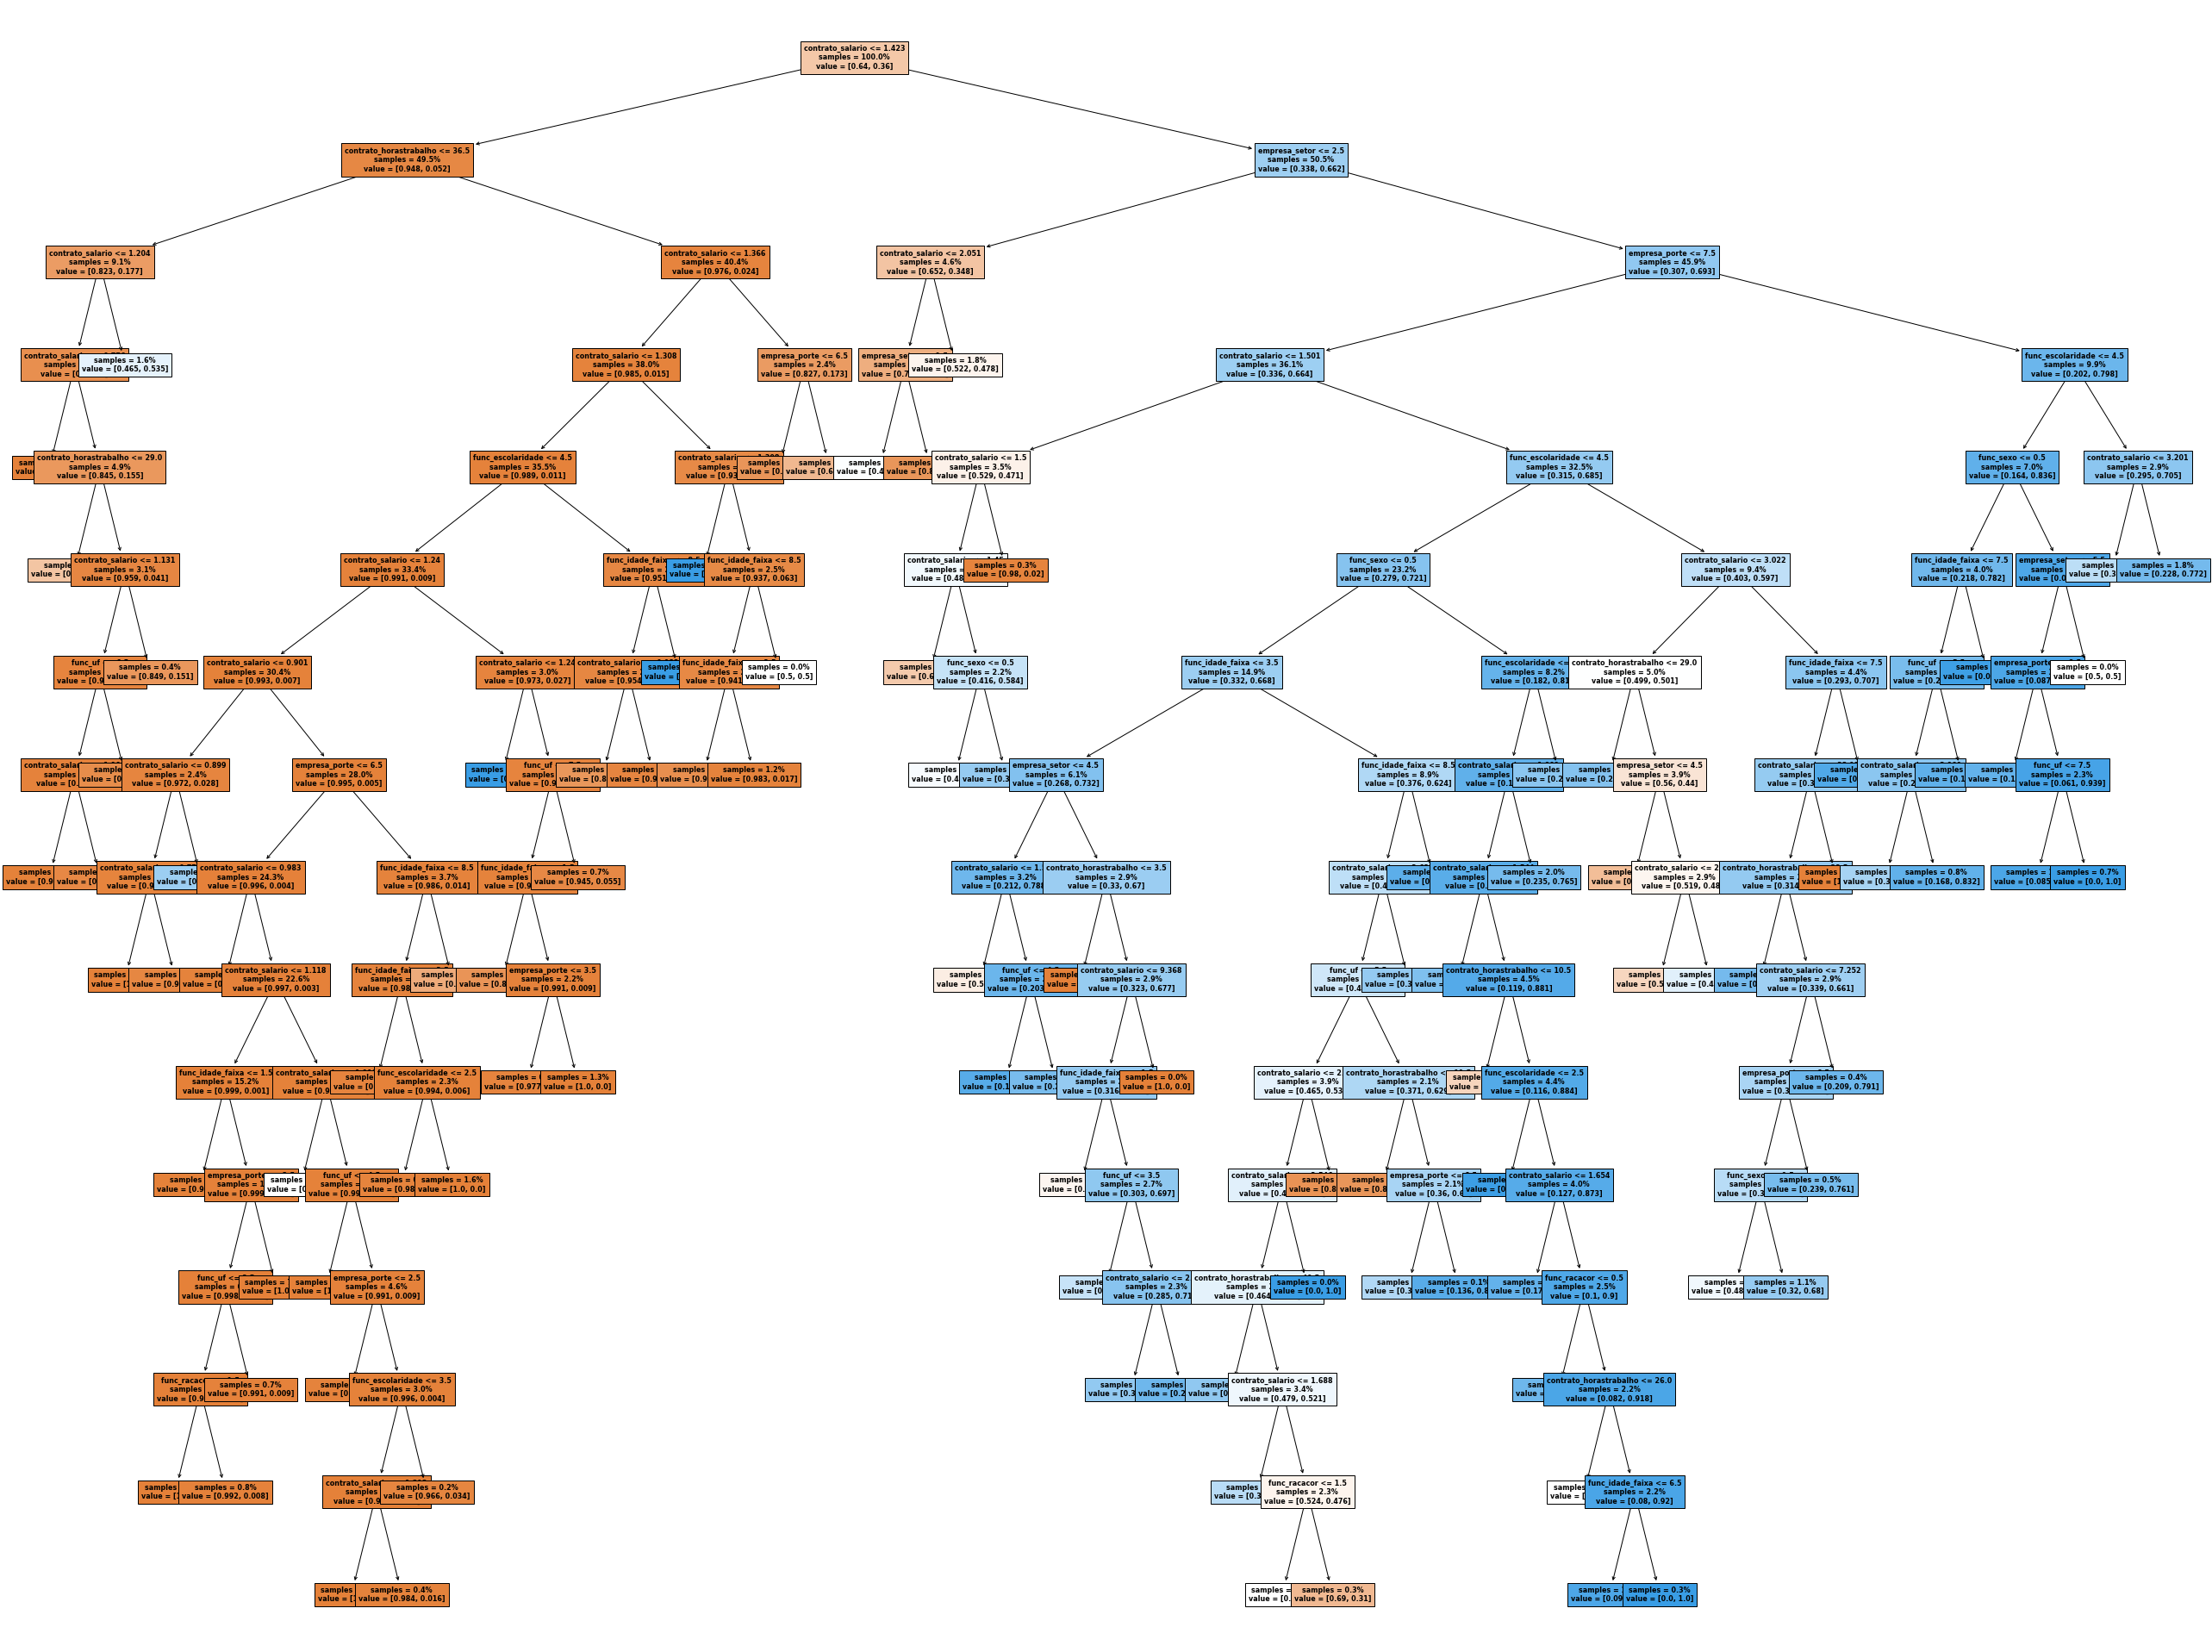

In [30]:
# Looking for a pattern using Decision Tree
SEED = 1
np.random.seed(SEED)


model = DecisionTreeClassifier(min_samples_split = 300)

model.fit(X, y)

plt.figure(figsize = (45, 35))
plot_tree(model, filled=True, proportion = True, impurity = False, fontsize=8, feature_names = X.columns)
#plt.savefig('tree_high_dpi', dpi=100)
plt.show()

In [ ]:
my_report = sv.compare([df_train[df_train.turnover_apos_1_ano==1], "Churn"], [df_train[df_train.turnover_apos_1_ano==0], "Continue"], "func_sexo")
my_report.show_notebook()
my_report.show_html(layout = 'vertical', filepath='SWEETVIZ_REPORT_ChurnXnaoChurn.html',)

### Sweetviz analysis Churn Vs Continued:
- women tends to leave the company more often than men;

<AxesSubplot:>

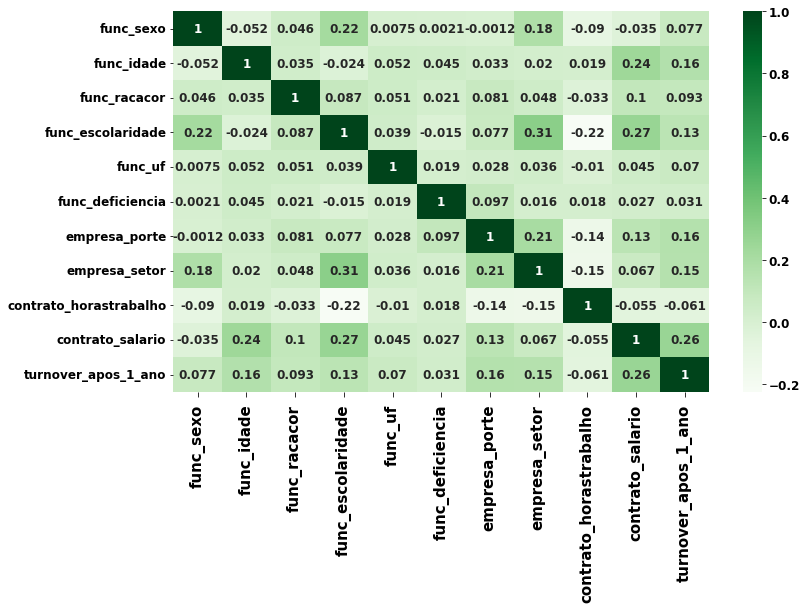

In [146]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_train.corr(), annot=True, cmap='Greens')

* It is noted a low pearson correlation between the variables

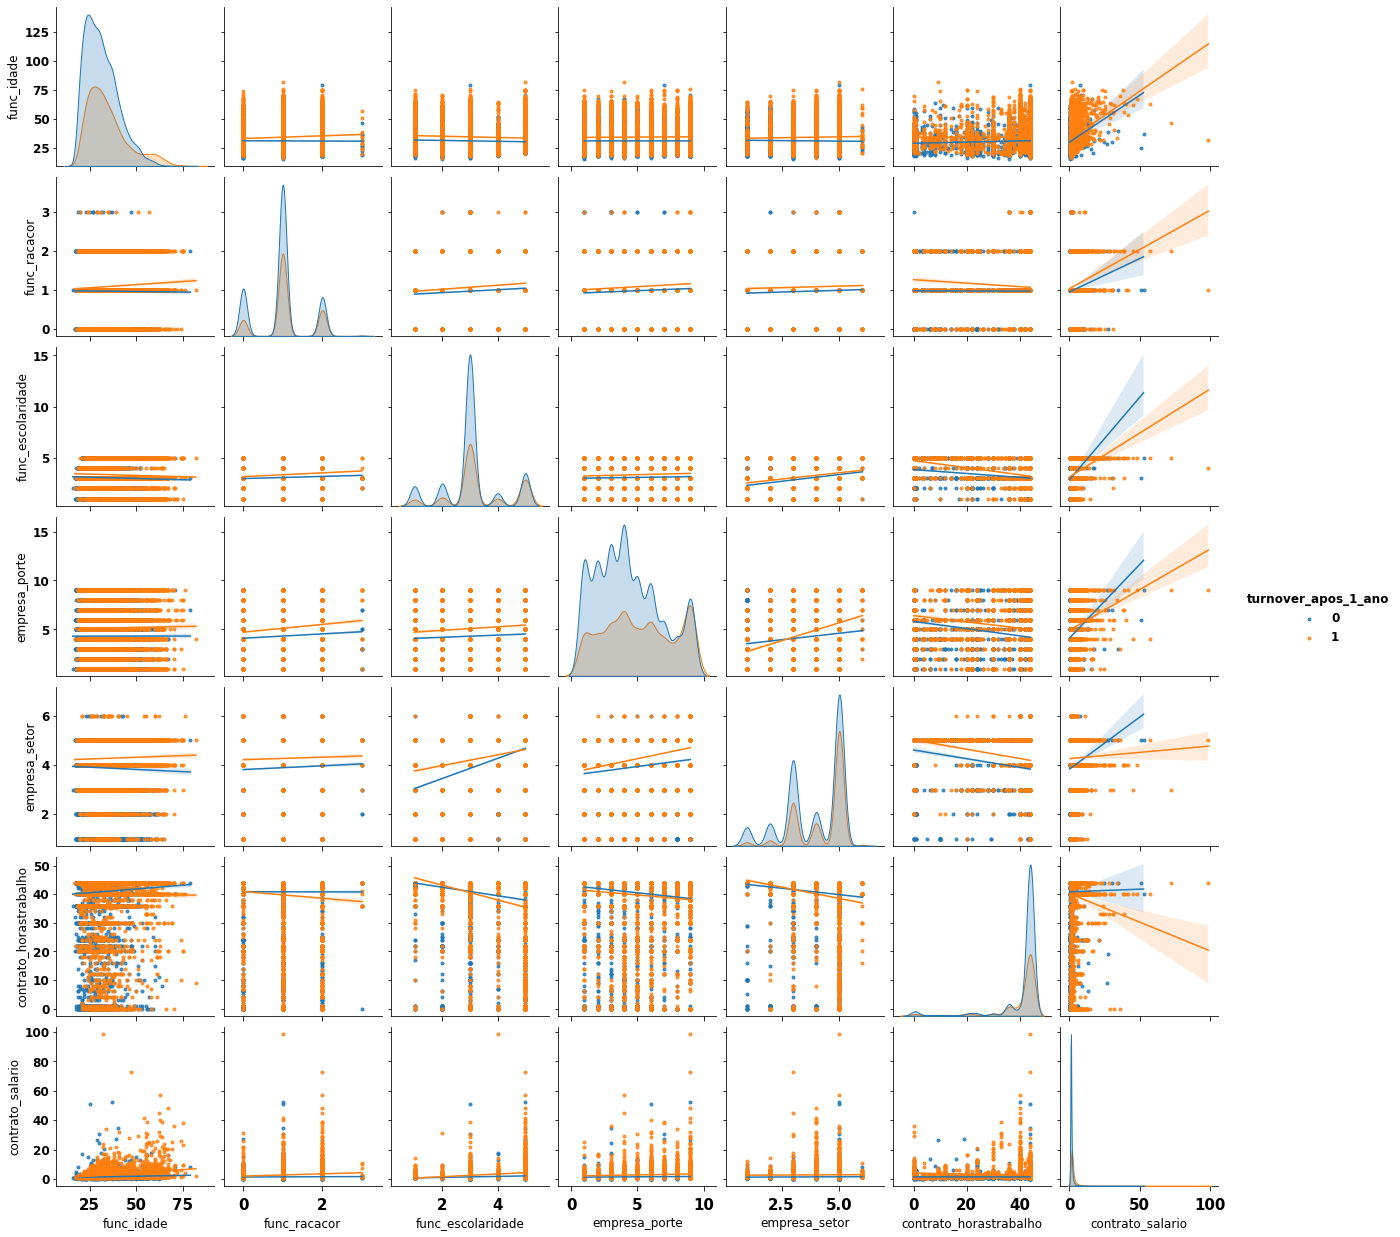

In [147]:
sns.pairplot(df_train.drop(columns=['func_sexo', 'func_deficiencia', 'func_uf'], axis=1),
             kind = 'reg',
             hue = 'turnover_apos_1_ano',
             markers = '.',)

* From the pairplot above, it can be seen a distint distribution of the variables comparing the Churn and No Churn data, especially when looking at the age (func_idade) and company size (empresa_porte) plots. 